The link to our github repo which contains the .ipynb and other supplemental code: https://github.com/Ponyokatsu/cs598DLH-tpc-LoS/tree/main

PRESENTATION: https://drive.google.com/file/d/1fJOOZ04NRnogvkjfTt-AM5MCxTDV2tbz/view?usp=sharing

# Mount Notebook to Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

*   Background of the problem
  <!-- * what type of problem: disease/readmission/mortality prediction,  feature engineeing, data processing, etc
  * what is the importance/meaning of solving the problem
  * what is the difficulty of the problem
  * the state of the art methods and effectiveness. -->
  * Intensive Care Units (ICU) are critical areas within hospitals that require intensive management due to the high cost and limited availability of resources such as beds and specialized staff.
  * The management of hospital beds, particularly in the ICU, is a critical challenge due to budget constraints and increasing patient demand.
  * Efficient resource allocation in the ICU is crucial because it involves life-support services for critically ill patients.
  * Predicting the length of stay (LoS) of patients in the ICU is vital to optimize these resources.
  * However, this prediction task is complex due to the high variability among patients and the dynamic nature of clinical environments.
  * Furthermore, the task is compounded by the logistical difficulties associated with managing high-demand and limited-capacity environments.
  * The prediction of patient outcomes like disease progression, readmission, mortality, and length of stay has seen increasing application of machine learning models leveraging Electronic Health Records (EHR).
  * These models, including state-of-the-art approaches like Long Short-Term Memory (LSTM) networks and Transformers, aim to harness the temporal dynamics and rich patient data available in EHRs.
  * Despite their advancements, these methods face significant challenges, such as handling irregularly sampled data, dealing with missing values, and adapting to the skewness in data distributions.
  * The limitations of current methodologies underscore the need for innovative approaches that can improve accuracy and reliability in LoS predictions, thus facilitating better ICU bed management and enhancing patient care quality.

  <!-- * State-of-the-art methods for LoS prediction primarily include machine learning models that utilize Electronic Health Records (EHR), such as Long Short-Term Memory (LSTM) networks and Transformer models.
  * These methods focus on overcoming challenges related to the irregularity and missingness of EHR data, yet they struggle with issues like data skewness and the necessity for frequent updates based on new incoming data. -->

*   Paper explanation
  <!-- * what did the paper propose
  * what is the innovations of the method
  * how well the proposed method work (in its own metrics)
  * what is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem). -->
  <!-- * The paper introduced a novel deep learning model named Temporal Pointwise Convolution (TPC), designed to enhance the prediction of ICU stay lengths by addressing specific challenges inherent in EHR data. TPC integrates temporal convolution to handle dependencies across time and pointwise convolution to extract high-level feature interactions.
  * The innovation in TPC lies in its dual approach, combining temporal and pointwise convolutions. This design allows it to effectively handle the skewness and irregular sampling inherent in EHR data, providing a more robust framework for feature extraction compared to existing methods.
  * The proposed TPC model demonstrates substantial improvements in prediction accuracy over traditional models like LSTM and Transformer. It achieved a mean absolute deviation in LoS predictions significantly lower than these benchmarks, illustrating its effectiveness in real-world settings.
  * The TPC model contributes significantly to the ICU resource management field by providing a more accurate and reliable method for predicting patient LoS. By improving prediction accuracy, the model aids in better resource allocation and operational planning in hospitals, addressing the critical need outlined in the paper's background. This advancement is particularly important given the increasing pressure on ICU resources and the potential impact of accurate predictions on patient outcomes and hospital efficiency. -->
  * The study introduces a novel machine learning model termed Temporal Pointwise Convolution (TPC), specifically designed to address the unique challenges posed by ICU stay data. This model combines the strengths of temporal convolutional layers, which process time-series data to capture temporal dependencies, and pointwise convolutional layers, which analyze and integrate features at each time step independently. This hybrid approach is crafted to enhance the model's ability to interpret complex, irregular, and sparse datasets typically found in ICU EHRs.
  * The TPC model's primary innovation lies in its unique architecture that effectively integrates temporal and pointwise convolutions. This design allows the model to handle the prevalent skewness and irregularities in ICU data more robustly than traditional models. By processing temporal and feature-based information simultaneously, TPC can extract more nuanced patterns and interactions that are crucial for accurate prediction.
  * Empirical results demonstrate that the TPC model significantly outperforms traditional predictive models such as LSTMs and Transformers on several key metrics. For instance, the model shows improvements in mean absolute deviation of LoS predictions, highlighting its practical effectiveness in a real-world clinical setting. The success of the TPC model in these evaluations illustrates its potential to enhance decision-making processes in ICU management.
  * The development and validation of the TPC model represent a significant advancement in the field of health informatics, particularly in the predictive modeling of ICU patient LoS. By offering a more accurate and reliable method for predicting how long patients will stay in the ICU, this model contributes to better resource allocation, potentially leading to cost reductions and improved patient outcomes. The research provides a critical tool for healthcare providers, helping them to optimize ICU operations amid increasing patient demands and finite resources. This contribution is not only a technical achievement but also a practical solution to a pressing healthcare challenge.



## LICENSE

Code has been derived and modified from the authors' github: https://github.com/EmmaRocheteau/TPC-LoS-prediction/tree/master

LICENSE:
MIT License

Copyright (c) 2020 Emma Rocheteau

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

All models were trained locally, and data was pre-processed locally as well. Models were loaded in from a local runtime running Python 3.6. Other library requirements are listed in the Github: https://github.com/Ponyokatsu/cs598DLH-tpc-LoS/tree/main

# Scope of Reproducibility:

We encountered numerous package dependency issues because most of the code on the original GitHub repo is compatible with Python 3.6, while the Python version available in Colab is 3.10.6. Therefore, we used a local runtime where we have Python 3.6 and the corresponding dependencies set up. Consequently, we spent a lot of time resolving these package issues and securing the necessary computing resources to run the preprocessing required to prepare the eICU and MIMIC datasets for use with the models discussed later.

List hypotheses from the paper we have test and the corresponding experiments we have run:


1.   Hypothesis 1: The TPC model will exhibit superior performance in predicting ICU patients' remaining LoS compared to traditional models, including LSTMs and Transformers, by effectively handling EHR data's inherent challenges.
2.   Hypothesis 2: Incorporating mortality prediction as an auxiliary task will further enhance the TPC model's accuracy in LoS predictions, leveraging the interrelated nature of mortality risk and extended hospital stays.



# Methodology

In [ ]:
# import  packages you need
import numpy as np
from google.colab import drive


# Environment

*   Python Version: Python 3.6
*   List of Dependencies/packages needed and their version:
  * absl-py==1.4.0
  * aiohttp==3.8.6
  * aiosignal==1.2.0
  * appdirs==1.4.4
  * APScheduler==3.6.3
  * argon2-cffi==21.3.0
  * argon2-cffi-bindings==21.2.0
  * async-generator==1.10
  * async-timeout==4.0.2
  * asynctest==0.13.0
  * attrs==22.2.0
  * backcall==0.2.0
  * backports.zoneinfo==0.2.1
  * bleach==4.1.0
  * cachetools==4.2.2
  * captum==0.2.0
  * certifi==2024.2.2
  * cffi==1.15.1
  * charset-normalizer==2.0.12
  * click==8.0.4
  * colorama==0.4.5
  * colorlover==0.3.0
  * cycler==0.11.0
  * dataclasses==0.8
  * decorator==4.4.2
  * defusedxml==0.7.1
  * dill==0.3.4
  * entrypoints==0.4
  * Flask==2.0.3
  * frozenlist==1.2.0
  * google-auth==2.22.0
  * google-auth-oauthlib==0.4.6
  * graphviz==0.19.1
  * grpcio==1.48.2
  * idna==3.7
  * idna-ssl==1.1.0
  * imageio==2.15.0
  * importlib-metadata==4.8.3
  * importlib-resources==5.4.0
  * ipykernel==5.5.6
  * ipython==7.16.3
  * ipython-genutils==0.2.0
  * itsdangerous==2.0.1
  * jedi==0.17.2
  * Jinja2==3.0.3
  * joblib==1.1.1
  * jsonpatch==1.32
  * jsonpointer==2.3
  * jsonschema==3.2.0
  * jupyter-client==7.1.2
  * jupyter-core==4.9.2
  * jupyterlab-pygments==0.1.2
  * kiwisolver==1.1.0
  * llvmlite==0.36.0
  * Markdown==3.3.7
  * MarkupSafe==2.0.1
  * matplotlib==3.2.2
  * mistune==0.8.4
  * multidict==5.2.0
  * multiprocess==0.70.12.2
  * nbclient==0.5.9
  * nbconvert==6.0.7
  * nbformat==5.1.3
  * nest-asyncio==1.6.0
  * networkx==2.5.1
  * notebook==6.4.10
  * numba==0.53.1
  * numpy==1.18.1
  * oauthlib==3.2.2
  * packaging==21.3
  * pandas==0.24.2
  * pandocfilters==1.5.1
  * parso==0.7.1
  * pathos==0.2.8
  * pickleshare==0.7.5
  * Pillow==8.4.0
  * plotly==5.18.0
  * portalocker==2.7.0
  * pox==0.3.0
  * ppft==1.6.6.4
  * prometheus-client==0.17.1
  * prompt-toolkit==3.0.36
  * protobuf==3.19.6
  * pyasn1==0.5.1
  * pyasn1-modules==0.3.0
  * pycparser==2.21
  * pyee==7.0.4
  * Pygments==2.14.0
  * pynndescent==0.5.12
  * pyparsing==3.1.2
  * pyppeteer==0.2.2
  * pyrsistent==0.18.0
  * python-dateutil==2.9.0.post0
  * python-telegram-bot==13.12
  * pytz==2024.1
  * pytz-deprecation-shim==0.1.0.post0
  * pywin32==305
  * pywinpty==1.1.6
  * pyzmq==25.1.2
  * requests==2.27.1
  * requests-oauthlib==2.0.0
  * rsa==4.9
  * scikit-learn==0.20.2
  * scipy==1.4.1
  * seaborn==0.11.2
  * Send2Trash==1.8.3
  * shap==0.35.0
  * six==1.16.0
  * slackclient==2.9.4
  * tb-nightly==1.14.0a20190523
  * tenacity==8.2.2
  * tensorboard==2.10.1
  * tensorboard-data-server==0.6.1
  * tensorboard-plugin-wit==1.8.1
  * terminado==0.12.1
  * testpath==0.6.0
  * threadpoolctl==3.1.0
  * torch==1.10.2+cu102
  * torchvision==0.11.3
  * tornado==6.1
  * tqdm==4.64.1
  * traitlets==4.3.3
  * trixi==0.1.2.2
  * typing_extensions==4.1.1
  * tzdata==2024.1
  * tzlocal==4.2
  * umap-learn==0.4.6
  * urllib3==1.26.18
  * visdom==0.2.4
  * wcwidth==0.2.13
  * webencodings==0.5.1
  * websocket-client==1.3.1
  * websockets==8.1
  * Werkzeug==2.0.3
  * yarl==1.7.2
  * zipp==3.6.0

  Though this is the exact list of required packages used to run the models in this project, it will still likely throw an error because of the packages "torch" and "torchvision".

  To prevent this error, first run the following command to install "torch" and "torchvision":
  * pip install torch==1.10.2+cu102 -f https://download.pytorch.org/whl/torch_stable.html
  * pip install torchvision==0.11.3 -f https://download.pytorch.org/whl/torch_stable.html

  After the above command is run, copy and install the list of packages.


#Data

##Data download instructions
* Source of the data
  * The data used in this study were collected from two extensive critical care databases: the eICU Collaborative Research Database and the MIMIC-IV Database. These databases contain detailed Electronic Health Records (EHR) from ICU patients, capturing a wide variety of clinical data points. Both of these datasets are obtained from the Physionet website after completing the required training. [License.](https://physionet.org/content/mimiciv/view-license/0.4/)

    * eICU Collaborative Research Database: This is a multi-center database gathered from over 200 hospitals across the United States, available via PhysioNet. [Link.](https://physionet.org/content/eicu-crd/2.0/)
    * MIMIC-IV Database: This database is a de-identified, publicly accessible dataset derived from Beth Israel Deaconess Medical Center and contains comprehensive data related to ICU stays. [Link.](https://physionet.org/content/mimiciv/0.4/)

* To dowload the dataset, follow the steps listed down below:


1.   Review dataset information: https://physionet.org/content/mimiciv/0.4/ , https://physionet.org/content/eicu-crd/2.0/
2.   Create initial credentialed user on the Physionet website: https://physionet.org/settings/credentialing/
3. Complete required training (Data or Specimens Only Research): https://physionet.org/about/citi-course/
4. Submit the training COMPLETION REPORT (NOT CERTIFICATE): https://physionet.org/settings/training/
5. Submit a final credentialing application: You will receive an email after you submitted your training completion report.
6. Sign the data use agreement for the dataset.
7. Download dataset.

##Data description with helful charts and visualization
<!-- Data includes raw data (MIMIC III tables), descriptive statistics (our homework questions), and data processing (feature engineering).
  * Source of the data: where the data is collected from; if data is synthetic or self-generated, explain how. If possible, please provide a link to the raw datasets.
  * Statistics: include basic descriptive statistics of the dataset like size, cross validation split, label distribution, etc.
  * Data process: how do you munipulate the data, e.g., change the class labels, split the dataset to train/valid/test, refining the dataset.
  * Illustration: printing results, plotting figures for illustration.
  * You can upload your raw dataset to Google Drive and mount this Colab to the same directory. If your raw dataset is too large, you can upload the processed dataset and have a code to load the processed dataset. -->
* Statistics
  * eICU: The dataset includes 200,859 patient unit encounters for 139,367 unique patients admitted between 2014 and 2015.
  * MIMIC-IV: The dataset consists of 69,619 ICU stays from 50,048 patients admitted between 2008 and 2019.
  * Data was divided such that 70% was used for training, 15% for validation, and 15% for testing, ensuring no patient overlap between these sets.
  * Both datasets include labels for length of stay and in-hospital mortality, with the specifics of these distributions tailored to reflect the critical conditions and care requirements in ICUs.
* Data process

  * Data fields with high levels of missingness were either imputed or forward-filled based on the last known value to maintain the integrity of temporal patterns.
  * To refine the data, we selected a subset of features that demonstrated significant variability and relevance to the ICU length of stay, based on preliminary analysis and expert clinical knowledge.
  * Only features present in at least a certain percentage of patient stays were included. Variables from lab results, vital signs, and nurse charting inputs were among those analyzed.
  * Continuous variables were normalized to have zero mean and unit variance to aid model convergence and performance.

* Descriptive statistics using Illustrations
  * In the code cell below we analyse the training MIMIC-IV and eICU datasetS used by the author.
  * We first visualize the proportion of Male and Female patients in the training dataset.
  * The number of people belonging to all ethnicities is presented as a pie chart.
  * Finally we also present the number of people from each region in the eICU Training dataset.

* NOTE: Since all the visualization is performed on the processed data, running the below cells will not directly give the results. Due to the data being protected, the reader has to generate the visualizations themself. The output is given below.

DATA LICENSE:
The PhysioNet Credentialed Health Data License
Version 1.5.0

Copyright (c) 2024 MIT Laboratory for Computational Physiology

The MIT Laboratory for Computational Physiology (MIT-LCP) wishes to make data available for research and educational purposes to qualified requestors, but only if the data are used and protected in accordance with the terms and conditions stated in this License.

It is hereby agreed between the data requestor, hereinafter referred to as the "LICENSEE", and MIT-LCP, that:

    The LICENSEE will not attempt to identify any individual or institution referenced in PhysioNet restricted data.
    The LICENSEE will exercise all reasonable and prudent care to avoid disclosure of the identity of any individual or institution referenced in PhysioNet restricted data in any publication or other communication.
    The LICENSEE will not share access to PhysioNet restricted data with anyone else.
    The LICENSEE will exercise all reasonable and prudent care to maintain the physical and electronic security of PhysioNet restricted data.
    If the LICENSEE finds information within PhysioNet restricted data that he or she believes might permit identification of any individual or institution, the LICENSEE will report the location of this information promptly by email to PHI-report@physionet.org, citing the location of the specific information in question.
    The LICENSEE will use the data for the sole purpose of lawful use in scientific research and no other.
    The LICENSEE will be responsible for ensuring that he or she maintains up to date certification in human research subject protection and HIPAA regulations.
    The LICENSEE agrees to contribute code associated with publications arising from this data to a repository that is open to the research community.
    This agreement may be terminated by either party at any time, but the LICENSEE's obligations with respect to PhysioNet data shall continue after termination.  

THE DATA ARE PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE DATA OR THE USE OR OTHER DEALINGS IN THE DATA.

<!-- ##Helpful charts and visualizations of the data
Following cells consists of visualizations that helped us get a better understanding of the data. We have visualized the number of Male and Females in the dataset, the distribution of different ethnicities, and the number of people from each region. -->

In [ ]:
# VISUALIZATION FOR THE NUMBER OF MALE VS FEMALE IN THE TRAINING DATASET
import matplotlib.pyplot as plt
import pandas as pd

flat_train = pd.read_csv('flat.csv')

# Count the occurrences of each gender value in the dataset
gender_counts = flat_train['gender'].value_counts()

# Create a bar chart to visualize the number of males vs females
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Number of Males vs. Females in the Training Dataset')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

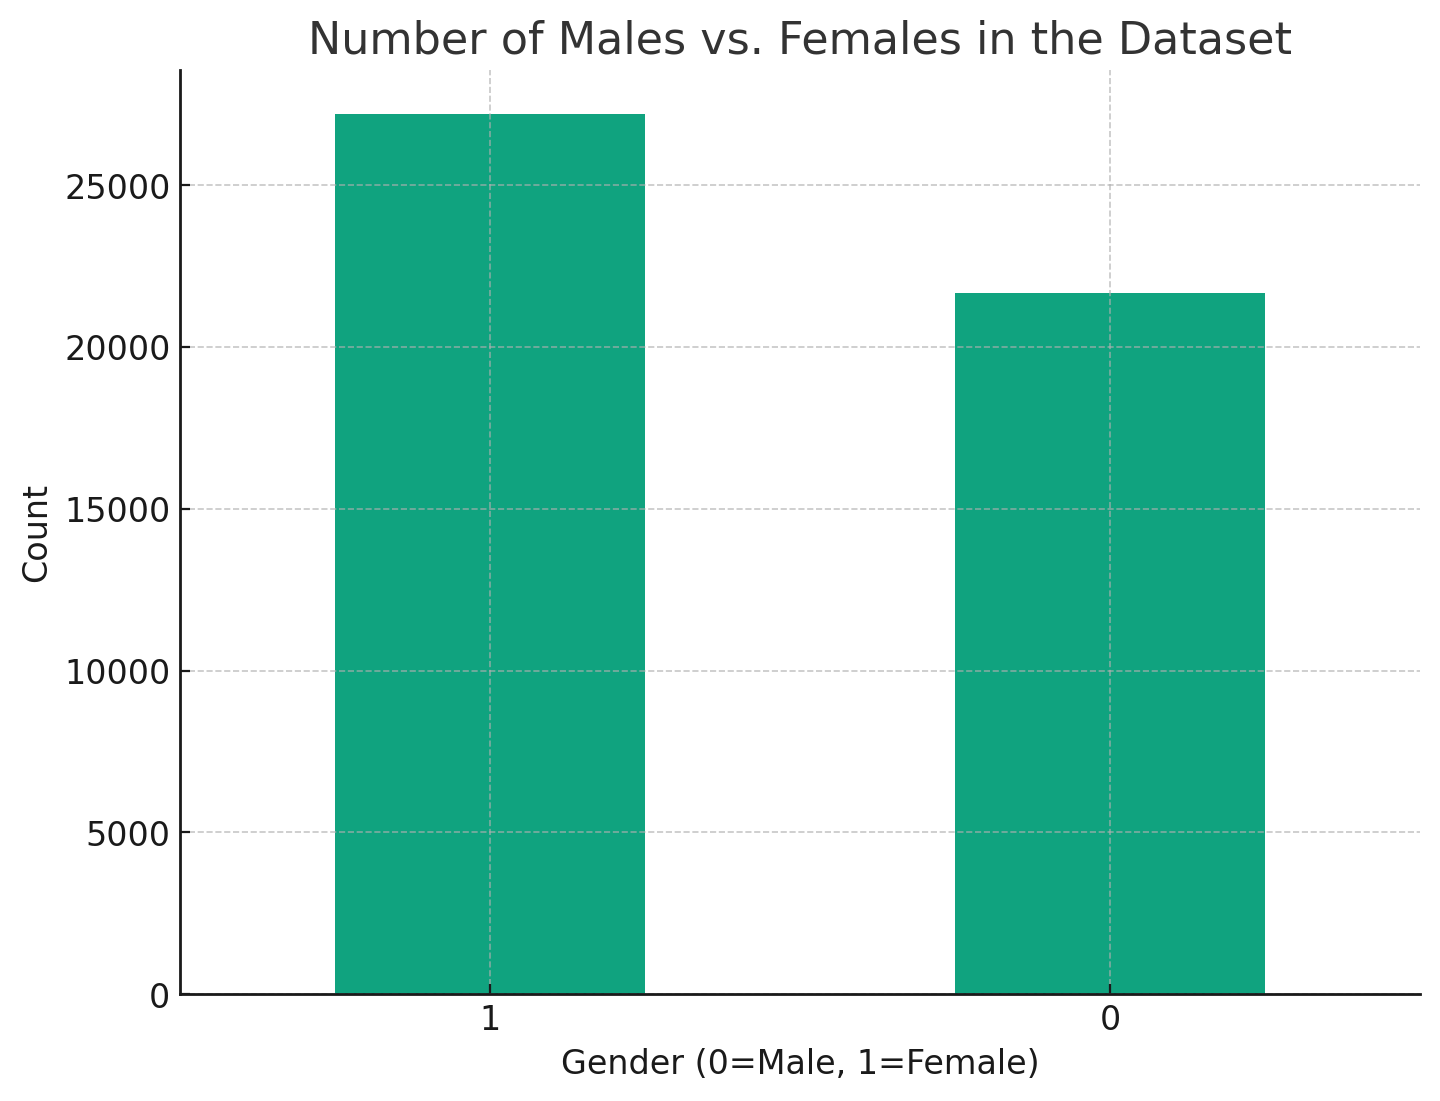

In [ ]:
# # dir and function to load raw data
# raw_data_dir = '/content/gdrive/My Drive/Colab Notebooks/<path-to-raw-data>'

# def load_raw_data(raw_data_dir):
#   # implement this function to load raw data to dataframe/numpy array/tensor
#   return None

# raw_data = load_raw_data(raw_data_dir)

# # calculate statistics
# def calculate_stats(raw_data):
#   # implement this function to calculate the statistics
#   # it is encouraged to print out the results
#   return None

# # process raw data
# def process_data(raw_data):
#     # implement this function to process the data as you need
#   return None

# processed_data = process_data(raw_data)

# ''' you can load the processed data directly
# processed_data_dir = '/content/gdrive/My Drive/Colab Notebooks/<path-to-raw-data>'
# def load_processed_data(raw_data_dir):
#   pass

# '''

# VISUALIZATION FOR DIFFERENT ETHNICITIES IN THE TRAINING DATA

# Columns for ethnicities in the DataFrame, assuming they are formatted like 'ethnicity_<group>'
ethnicity_columns = [col for col in df.columns if 'ethnicity_' in col]

# Calculate the sum for each ethnicity column to get the count of individuals belonging to each group
ethnicity_counts = df[ethnicity_columns].sum()

# Display the counts
print(ethnicity_counts)

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ethnicities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


* ethnicity_ASIAN                      1438
* ethnicity_BLACK/AFRICAN AMERICAN     5399
* ethnicity_HISPANIC/LATINO            1906
* ethnicity_OTHER                      2188
* ethnicity_UNKNOWN                    4166
* ethnicity_WHITE                     33049
* ethnicity_misc                        702

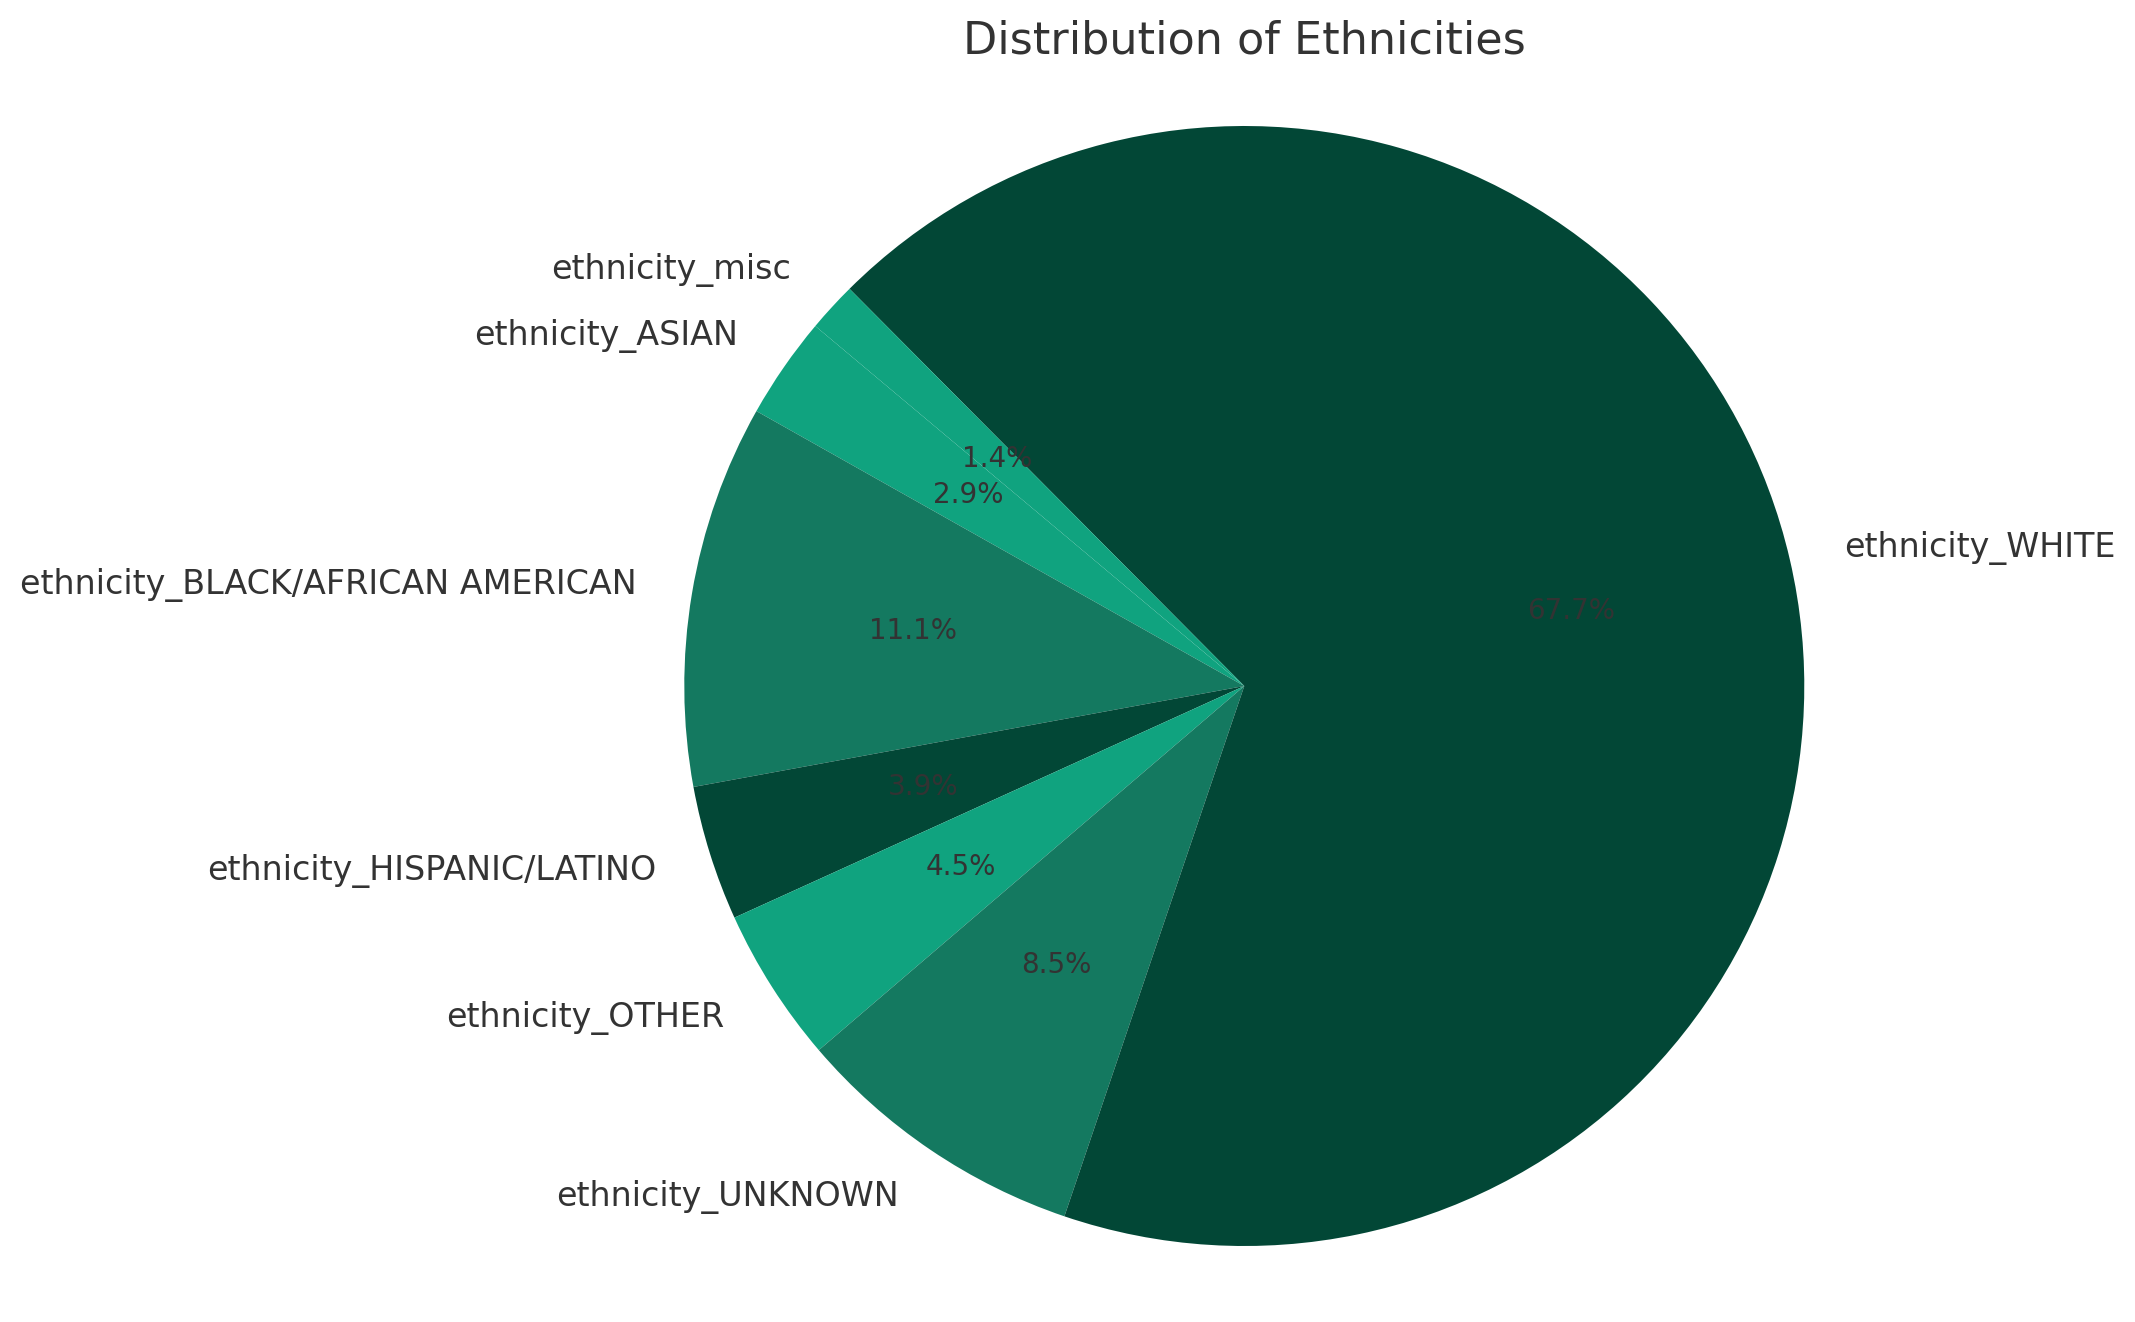

In [ ]:
# Count the number of people from each region in the eICU Training dataset. Presented as a barchart
region_counts = data[['region_Midwest', 'region_Northeast', 'region_South', 'region_West']].sum()
print(region_counts)

# Visualization of the counts
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.title('Number of People from Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotates the x-axis labels for better readability
plt.show()

* Midwest: 38,267
* Northeast: 7,377
* South: 34,442
* West: 18,164

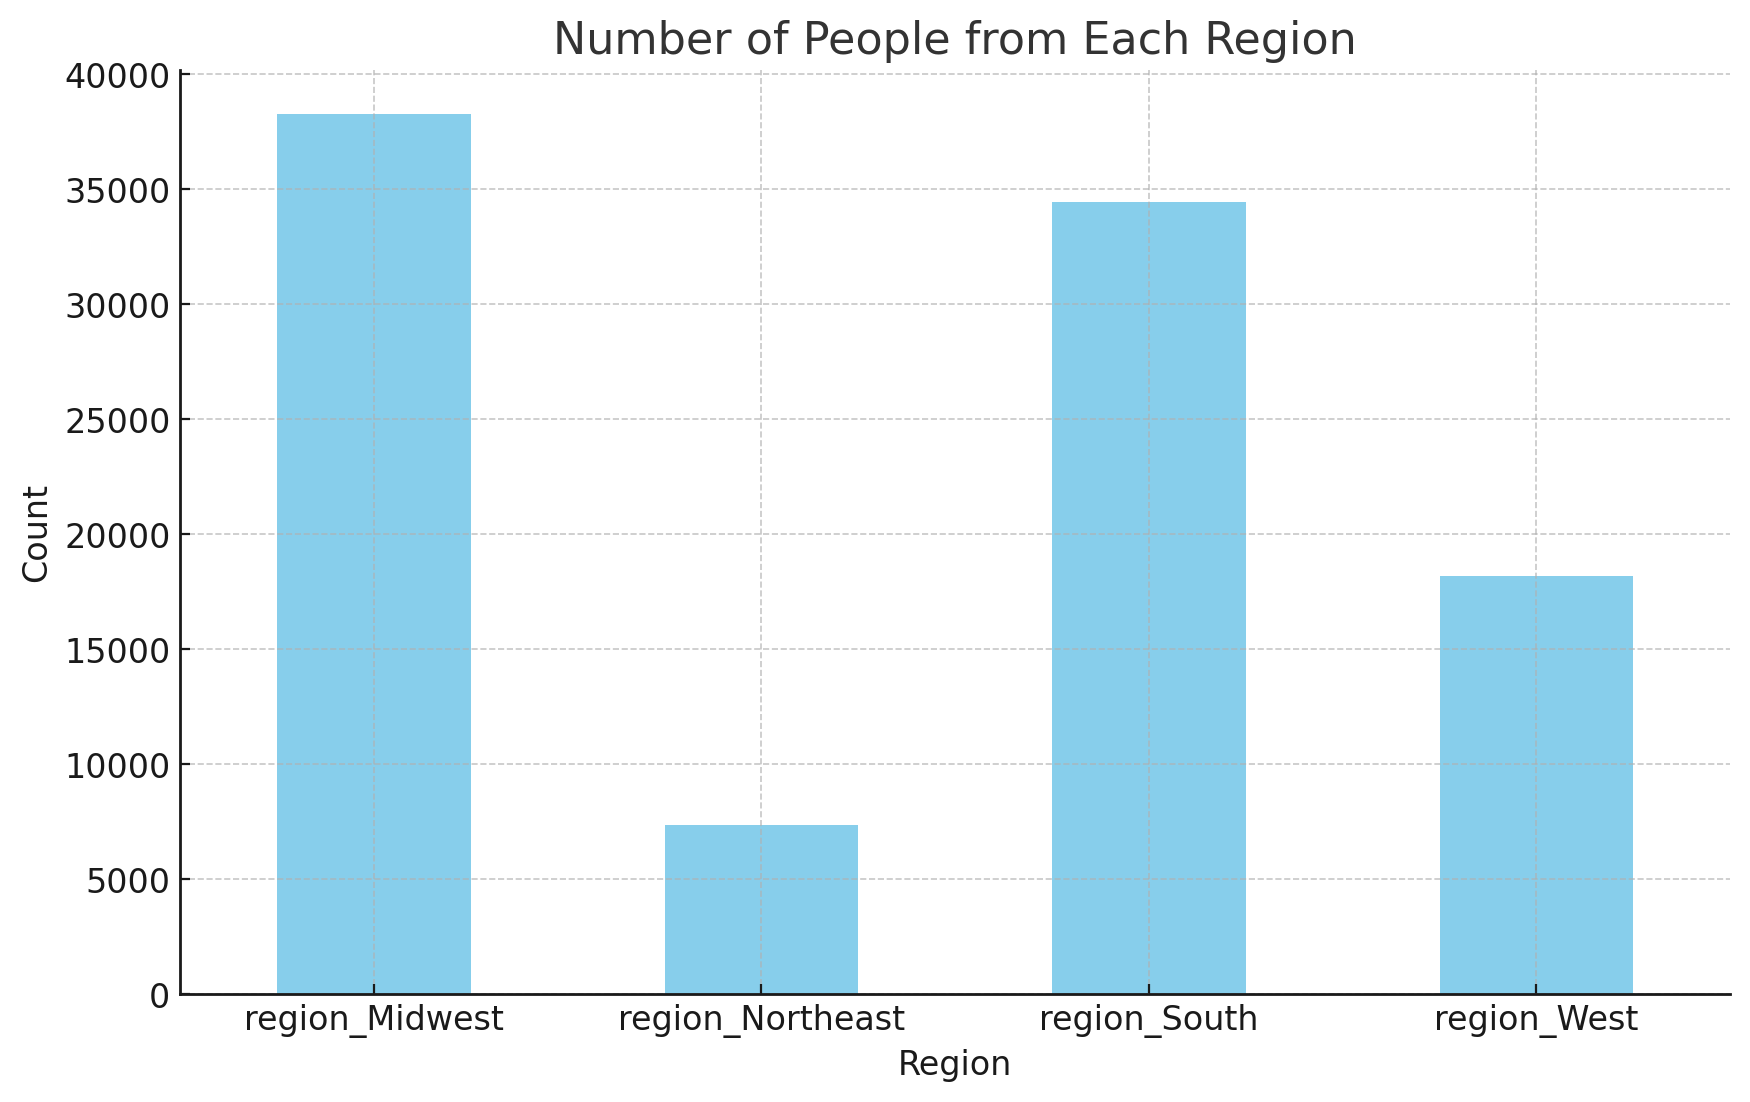


## Data Pre-Processing Instructions (code + command)

For the eICU to be compatible with our models and to be used in the right way, we need to first pre-process it. The complete code from loading the eICU data into our PostGreSQL tables and then further processing them into csv files is available at the following location:
[eICU preprocessing](https://github.com/Ponyokatsu/cs598DLH-tpc-LoS/tree/main/Tpc-LoS-Prediction/eICU_preprocessing).
Below is a summary of these instructions



### eICU

1. **Setup eICU Database**:
   - Ensure you have the eICU database set up, which can be found [here](https://physionet.org/content/eicu-crd/2.0/).
   - Follow the instructions for local installation provided [here](https://eicu-crd.mit.edu/tutorials/install_eicu_locally/). This will ensure correct connection configurations.

2. **Database Commands**:
   - Connect to PostgreSQL using the eICU user: `psql -U eicu`
   - Create the schema if not exists: `CREATE SCHEMA if not exists eicu_crd;`
   - Set search path: `set search_path to eicu_crd;`
   - Create and load tables, add indexes, and validate using the SQL files provided in your setup instructions.

3. **Configuration Files**:
   - Replace the `eICU_path` in `paths.json` with a convenient location on your computer.
   - Use find and replace in `eICU_preprocessing/create_all_tables.sql` to update paths accordingly.

4. **Run Commands in Terminal**:
   - Navigate to your project directory and connect to your database using:
     ```
     psql 'dbname=eicu user=eicu options=--search_path=eicu'
     ```
   - Inside the psql console, initiate table creation:
     ```
     \i eICU_preprocessing/create_all_tables.sql
     ```
   - This process might take a couple of hours. To quit the console, type `\q`.

5. **Run Pre-Processing Scripts**:
   - Execute pre-processing scripts which might need to run overnight:
     ```
     python3 -m eICU_preprocessing.run_all_preprocessing
     ```



### MIMIC-IV

Similarlt, for the MIMIC to be compatible with our models and to be used in the right way, we need to first pre-process it. The complete code from loading the eICU data into our PostGreSQL tables and then further processing them into csv files is available at the following location:
[MIMIC preprocessing](https://github.com/Ponyokatsu/cs598DLH-tpc-LoS/tree/main/Tpc-LoS-Prediction/MIMIC_preprocessing).
Below is a summary of these instructions


1. **Setup MIMIC-IV Database**:
   - Ensure you have the MIMIC-IV database set up, details found [here](https://physionet.org/content/mimiciv/0.4/).
   - Access to MIMIC-IV is recommended via BigQuery as per [these instructions](https://mimic-iv.mit.edu/docs/access/bigquery/), although local setups are detailed in various guides for Unix and Windows systems.

2. **Database Commands**:
   - For a local setup, use commands to create tables, load data, and add indexes. Ensure all paths and permissions are correctly configured.

3. **Configuration Files**:
   - Replace the `MIMIC_path` in `paths.json` with your desired local path.
   - Update `MIMIC_preprocessing/create_all_tables.sql` accordingly.

4. **Run Commands in Terminal**:
   - Connect to your MIMIC-IV database setup and execute the SQL scripts:
     ```
     psql -U mimicuser -v ON_ERROR_STOP=1 -d mimic4 --set=search_path=mimiciv
     \i MIMIC_preprocessing/create_all_tables.sql
     ```
   - This might also take a couple of hours. To exit, type `\q`.
   
5. **Run Post-Setup Scripts**:
   - After database setup, execute necessary scripts to finalize the setup, potentially running overnight.


Below cells contain a couple of snippets from this pre-processing.

In [ ]:

# from sklearn.model_selection import train_test_split
# from sklearn.utils import shuffle
# import pandas as pd
# import os
# import argparse

# # Creates a new folder at the specified path if it does not exist
# def create_folder(parent_path, folder):
#     if not parent_path.endswith("/"):
#         parent_path += "/"
#     folder_path = parent_path + folder
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)
#     return folder_path

# # Shuffles the stays DataFrame using a specified random seed
# def shuffle_stays(stays, seed=9):
#     return shuffle(stays, random_state=seed)

# # Processes a table by filtering rows based on stays and saving the result into a CSV file
# def process_table(table_name, table, stays, folder_path):
#     table = table.loc[stays].copy()
#     table.to_csv("{}/{}.csv".format(folder_path, table_name))
#     return

# # Splits the dataset into training, validation, and test sets and processes each table accordingly
# def split_train_test(path, is_test=True, seed=9, cleanup=True, MIMIC=False):
#     labels = pd.read_csv(path + "preprocessed_labels.csv")
#     labels.set_index("patient", inplace=True)
#     # we split by unique patient identifier to make sure there are no patients
#     # that cross into both the train and the test sets
#     patients = labels.uniquepid.unique()

#     train, test = train_test_split(patients, test_size=0.15, random_state=seed)
#     train, val = train_test_split(train, test_size=0.15 / 0.85, random_state=seed)

#     print("==> Loading data for splitting...")
#     if is_test:
#         timeseries = pd.read_csv(path + "preprocessed_timeseries.csv", nrows=999999)
#     else:
#         timeseries = pd.read_csv(path + "preprocessed_timeseries.csv")
#     timeseries.set_index("patient", inplace=True)
#     if not MIMIC:
#         diagnoses = pd.read_csv(path + "preprocessed_diagnoses.csv")
#         diagnoses.set_index("patient", inplace=True)
#     flat_features = pd.read_csv(path + "preprocessed_flat.csv")
#     flat_features.set_index("patient", inplace=True)

#     # delete the source files, as they won't be needed anymore
#     if is_test is False and cleanup:
#         print("==> Removing the unsorted data...")
#         os.remove(path + "preprocessed_timeseries.csv")
#         if not MIMIC:
#             os.remove(path + "preprocessed_diagnoses.csv")
#         os.remove(path + "preprocessed_labels.csv")
#         os.remove(path + "preprocessed_flat.csv")

#     for partition_name, partition in zip(["train", "val", "test"], [train, val, test]):
#         print("==> Preparing {} data...".format(partition_name))
#         stays = labels.loc[labels["uniquepid"].isin(partition)].index
#         folder_path = create_folder(path, partition_name)
#         with open(folder_path + "/stays.txt", "w") as f:
#             for stay in stays:
#                 f.write("%s\n" % stay)
#         stays = shuffle_stays(stays, seed=9)
#         if MIMIC:
#             for table_name, table in zip(
#                 ["labels", "flat", "timeseries"], [labels, flat_features, timeseries]
#             ):
#                 process_table(table_name, table, stays, folder_path)
#         else:
#             for table_name, table in zip(
#                 ["labels", "flat", "diagnoses", "timeseries"],
#                 [labels, flat_features, diagnoses, timeseries],
#             ):
#                 process_table(table_name, table, stays, folder_path)

#     return

### **Shuffling Training Data for TPC Model**

The shuffle_train function is used to shuffle the training data for the TPC model, which is crucial for ensuring that the model does not learn any unintended patterns from the order of the data.
Function Overview
Reads CSV files for labels, flat, diagnoses, and timeseries, setting the patient column as the index.
Shuffles the patient stays without a fixed seed, resulting in a different order each time the function is run.
Processes each table (labels, flat, diagnoses, timeseries) by filtering based on the shuffled stays and saving them back to CSV files in the train_path directory.
Writes the shuffled patient stays to a text file (stays.txt) within the train_path directory.
This shuffling process is part of the data preparation stage, ensuring that the training data is randomized, which helps prevent overfitting and improves the generalization of the TPC model.

In [ ]:
# def shuffle_train(train_path):
#     labels = pd.read_csv(train_path + "/labels.csv", index_col="patient")
#     flat = pd.read_csv(train_path + "/flat.csv", index_col="patient")
#     diagnoses = pd.read_csv(train_path + "/diagnoses.csv", index_col="patient")
#     timeseries = pd.read_csv(train_path + "/timeseries.csv", index_col="patient")

#     stays = labels.index.values
#     stays = shuffle_stays(stays, seed=None)  # No seed will make it completely random
#     for table_name, table in zip(
#         ["labels", "flat", "diagnoses", "timeseries"],
#         [labels, flat, diagnoses, timeseries],
#     ):
#         process_table(table_name, table, stays, train_path)

#     with open(train_path + "/stays.txt", "w") as f:
#         for stay in stays:
#             f.write("%s\n" % stay)
#     return


eICU_preprocessing.timeseries

In [ ]:
# Reconfigures the timeseries data by setting a multi-index of patient ID and time, and optionally pivots the table if a feature column is provided.
# def reconfigure_timeseries(timeseries, offset_column, feature_column=None, test=False):
#     if test:
#         timeseries = timeseries.iloc[300000:5000000]
#     timeseries.set_index(
#         ["patientunitstayid", pd.to_timedelta(timeseries[offset_column], unit="T")],
#         inplace=True,
#     )
#     timeseries.drop(columns=offset_column, inplace=True)
#     if feature_column is not None:
#         timeseries = timeseries.pivot_table(
#             columns=feature_column, index=timeseries.index
#         )
#     # convert index to multi-index with both patients and timedelta stamp
#     timeseries.index = pd.MultiIndex.from_tuples(
#         timeseries.index, names=["patient", "time"]
#     )
#     return timeseries

# # Resamples the timeseries data to hourly intervals and applies a decay function to the mask indicating the presence of measurements.
# def resample_and_mask(
#     timeseries,
#     eICU_path,
#     header,
#     mask_decay=True,
#     decay_rate=4 / 3,
#     test=False,
#     verbose=False,
#     length_limit=24 * 14,
# ):
#     if test:
#         mask_decay = False
#         verbose = True
#     if verbose:
#         print("Resampling to 1 hour intervals...")
#     # take the mean of any duplicate index entries for unstacking
#     timeseries = timeseries.groupby(level=[0, 1]).mean()

#     timeseries.reset_index(level=1, inplace=True)
#     timeseries.time = timeseries.time.dt.ceil(freq="H")
#     timeseries.set_index("time", append=True, inplace=True)
#     timeseries.reset_index(level=0, inplace=True)
#     resampled = (
#         timeseries.groupby("patient")
#         .resample("H", closed="right", label="right")
#         .mean()
#         .drop(columns="patient")
#     )
#     del timeseries

#     def apply_mask_decay(mask_bool):
#         mask = mask_bool.astype(int)
#         mask.replace({0: np.nan}, inplace=True)  # so that forward fill works
#         inv_mask_bool = ~mask_bool
#         count_non_measurements = inv_mask_bool.cumsum() - inv_mask_bool.cumsum().where(
#             mask_bool
#         ).ffill().fillna(0)
#         decay_mask = mask.ffill().fillna(0) / (
#             count_non_measurements * decay_rate
#         ).replace(0, 1)
#         return decay_mask

#     # store which values had to be imputed
#     if mask_decay:
#         if verbose:
#             print("Calculating mask decay features...")
#         mask_bool = resampled.notnull()
#         mask = mask_bool.groupby("patient").transform(apply_mask_decay)
#         del mask_bool
#     else:
#         if verbose:
#             print("Calculating binary mask features...")
#         mask = resampled.notnull()
#         mask = mask.astype(int)

#     if verbose:
#         print("Filling missing data forwards...")
#     # carry forward missing values (note they will still be 0 in the nulls table)
#     resampled = resampled.fillna(method="ffill")

#     # simplify the indexes of both tables
#     mask = mask.rename(
#         index=dict(
#             zip(
#                 mask.index.levels[1],
#                 mask.index.levels[1].days * 24 + mask.index.levels[1].seconds // 3600,
#             )
#         )
#     )
#     resampled = resampled.rename(
#         index=dict(
#             zip(
#                 resampled.index.levels[1],
#                 resampled.index.levels[1].days * 24
#                 + resampled.index.levels[1].seconds // 3600,
#             )
#         )
#     )

#     # clip to length_limit
#     if length_limit is not None:
#         within_length_limit = resampled.index.get_level_values(1) < length_limit
#         resampled = resampled.loc[within_length_limit]
#         mask = mask.loc[within_length_limit]

#     if verbose:
#         print("Filling in remaining values with zeros...")
#     resampled.fillna(0, inplace=True)

#     # rename the columns in pandas for the mask so it doesn't complain
#     mask.columns = [str(col) + "_mask" for col in mask.columns]

#     # merge the mask with the features
#     final = pd.concat([resampled, mask], axis=1)
#     final.reset_index(level=1, inplace=True)
#     final = final.loc[final.time > 0]

#     if verbose:
#         print("Saving progress...")
#     # save to csv
#     if test is False:
#         final.to_csv(eICU_path + "preprocessed_timeseries.csv", mode="a", header=header)
#     return

# # Generates chunks of patient data for processing in batches.
# def gen_patient_chunk(patients, size=1000):
#     it = iter(patients)
#     chunk = list(islice(it, size))
#     while chunk:
#         yield chunk
#         chunk = list(islice(it, size))

# # Main function to process timeseries data for the eICU dataset.
# def gen_timeseries_file_eICU(eICU_path, test=False):
#     print("==> Loading data from timeseries files...")
#     if test:
#         timeseries_lab = pd.read_csv(eICU_path + "timeserieslab.csv", nrows=500000)
#         timeseries_resp = pd.read_csv(eICU_path + "timeseriesresp.csv", nrows=500000)
#         timeseries_nurse = pd.read_csv(eICU_path + "timeseriesnurse.csv", nrows=500000)
#         timeseries_periodic = pd.read_csv(
#             eICU_path + "timeseriesperiodic.csv", nrows=500000
#         )
#         timeseries_aperiodic = pd.read_csv(
#             eICU_path + "timeseriesaperiodic.csv", nrows=500000
#         )
#     else:
#         timeseries_lab = pd.read_csv(eICU_path + "timeserieslab.csv")
#         timeseries_resp = pd.read_csv(eICU_path + "timeseriesresp.csv")
#         timeseries_nurse = pd.read_csv(eICU_path + "timeseriesnurse.csv")
#         timeseries_periodic = pd.read_csv(eICU_path + "timeseriesperiodic.csv")
#         timeseries_aperiodic = pd.read_csv(eICU_path + "timeseriesaperiodic.csv")

#     print("==> Reconfiguring lab timeseries...")
#     timeseries_lab = reconfigure_timeseries(
#         timeseries_lab,
#         offset_column="labresultoffset",
#         feature_column="labname",
#         test=test,
#     )
#     timeseries_lab.columns = timeseries_lab.columns.droplevel()

#     print("==> Reconfiguring respiratory timeseries...")
#     # get rid of % signs (found in FiO2 section) and then convert into numbers
#     timeseries_resp = timeseries_resp.replace("%", "", regex=True)
#     timeseries_resp["respchartvalue"] = pd.to_numeric(
#         timeseries_resp["respchartvalue"], errors="coerce"
#     )
#     timeseries_resp = timeseries_resp.loc[timeseries_resp["respchartvalue"].notnull()]
#     timeseries_resp = reconfigure_timeseries(
#         timeseries_resp,
#         offset_column="respchartoffset",
#         feature_column="respchartvaluelabel",
#         test=test,
#     )
#     timeseries_resp.columns = timeseries_resp.columns.droplevel()

#     print("==> Reconfiguring nurse timeseries...")
#     # remove non numeric data
#     timeseries_nurse["nursingchartvalue"] = pd.to_numeric(
#         timeseries_nurse["nursingchartvalue"], errors="coerce"
#     )
#     timeseries_nurse = timeseries_nurse.loc[
#         timeseries_nurse["nursingchartvalue"].notnull()
#     ]
#     timeseries_nurse = reconfigure_timeseries(
#         timeseries_nurse,
#         offset_column="nursingchartoffset",
#         feature_column="nursingchartcelltypevallabel",
#         test=test,
#     )
#     timeseries_nurse.columns = timeseries_nurse.columns.droplevel()

#     print("==> Reconfiguring aperiodic timeseries...")
#     timeseries_aperiodic = reconfigure_timeseries(
#         timeseries_aperiodic, offset_column="observationoffset", test=test
#     )

#     print("==> Reconfiguring periodic timeseries...")
#     timeseries_periodic = reconfigure_timeseries(
#         timeseries_periodic, offset_column="observationoffset", test=test
#     )

#     patients = timeseries_periodic.index.unique(level=0)

#     size = 4000
#     gen_chunks = gen_patient_chunk(patients, size=size)
#     i = size
#     header = True  # for the first chunk include the header in the csv file

#     print("==> Starting main processing loop...")

#     for patient_chunk in gen_chunks:
#         merged = timeseries_lab.loc[patient_chunk].append(
#             timeseries_resp.loc[patient_chunk], sort=False
#         )
#         merged = merged.append(timeseries_nurse.loc[patient_chunk], sort=False)
#         merged = merged.append(timeseries_periodic.loc[patient_chunk], sort=False)
#         merged = merged.append(timeseries_aperiodic.loc[patient_chunk], sort=True)

#         if i == size:  # fixed from first run
#             # all if not all are not normally distributed
#             quantiles = merged.quantile([0.05, 0.95])
#             maxs = quantiles.loc[0.95]
#             mins = quantiles.loc[0.05]

#         merged = 2 * (merged - mins) / (maxs - mins) - 1

#         # we then need to make sure that ridiculous outliers are clipped to something sensible
#         merged.clip(
#             lower=-4, upper=4, inplace=True
#         )  # room for +- 3 on each side, as variables are scaled roughly between 0 and 1

#         resample_and_mask(
#             merged,
#             eICU_path,
#             header,
#             mask_decay=True,
#             decay_rate=4 / 3,
#             test=test,
#             verbose=False,
#         )
#         print("==> Processed " + str(i) + " patients...")
#         i += size
#         header = False

#     return

# # Adds time of day features to the processed timeseries data.
# def add_time_of_day(processed_timeseries, flat_features):
#     print("==> Adding time of day features...")
#     processed_timeseries = processed_timeseries.join(
#         flat_features[["hour"]], how="inner", on="patient"
#     )
#     processed_timeseries["hour"] = (
#         processed_timeseries["time"] + processed_timeseries["hour"]
#     )
#     hour_list = np.linspace(0, 1, 24)  # make sure it's still scaled well
#     processed_timeseries["hour"] = processed_timeseries["hour"].apply(
#         lambda x: hour_list[x % 24 - 24]
#     )
#     return processed_timeseries

# # Further processes the timeseries data by adding time of day features and saving the final dataframe.
# def further_processing(eICU_path, test=False):
#     if test:
#         processed_timeseries = pd.read_csv(
#             eICU_path + "preprocessed_timeseries.csv", nrows=999999
#         )
#     else:
#         processed_timeseries = pd.read_csv(eICU_path + "preprocessed_timeseries.csv")
#     processed_timeseries.rename(columns={"Unnamed: 1": "time"}, inplace=True)
#     processed_timeseries.set_index("patient", inplace=True)
#     flat_features = pd.read_csv(eICU_path + "flat_features.csv")
#     flat_features.rename(columns={"patientunitstayid": "patient"}, inplace=True)
#     processed_timeseries.sort_values(["patient", "time"], inplace=True)
#     flat_features.set_index("patient", inplace=True)

#     processed_timeseries = add_time_of_day(processed_timeseries, flat_features)

#     if test is False:
#         print("==> Saving finalised preprocessed timeseries...")
#         # this will replace old one that was updated earlier in the script
#         processed_timeseries.to_csv(eICU_path + "preprocessed_timeseries.csv")

#     return

# # The main function that orchestrates the processing of timeseries data for the eICU dataset.
# def timeseries_main_eICU(eICU_path, test=False):
#     # make sure the preprocessed_timeseries.csv file is not there because the first section of this script appends to it
#     if test is False:
#         print("==> Removing the preprocessed_timeseries.csv file if it exists...")
#         try:
#             os.remove(eICU_path + "preprocessed_timeseries.csv")
#         except FileNotFoundError:
#             pass
#     gen_timeseries_file_eICU(eICU_path, test)
#     further_processing(eICU_path, test)
#     return


MIMIC_preprocessing.timeseries

In [ ]:
# # Processes MIMIC timeseries lab data, reconfigures it, and merges it with other timeseries data after cleaning and normalizing.
# def gen_timeseries_file_MIMIC(MIMIC_path, test=False):
#     print("==> Loading data from timeseries files...")
#     if test:
#         timeseries_lab = pd.read_csv(MIMIC_path + "timeserieslab.csv", nrows=500000)
#         timeseries = pd.read_csv(MIMIC_path + "timeseries.csv", nrows=500000)
#     else:
#         timeseries_lab = pd.read_csv(MIMIC_path + "timeserieslab.csv")
#         timeseries = pd.read_csv(MIMIC_path + "timeseries.csv")

#     print("==> Reconfiguring lab timeseries...")
#     timeseries_lab = reconfigure_timeseries(
#         timeseries_lab,
#         offset_column="labresultoffset",
#         feature_column="labname",
#         test=test,
#     )
#     timeseries_lab.columns = timeseries_lab.columns.droplevel()

#     print("==> Reconfiguring other timeseries...")
#     timeseries = reconfigure_timeseries(
#         timeseries,
#         offset_column="chartoffset",
#         feature_column="chartvaluelabel",
#         test=test,
#     )
#     timeseries.columns = timeseries.columns.droplevel()

#     # note that in MIMIC the timeseries are a lot messier so there are a lot of variables present that are not useful
#     # drop duplicate columns which appear in chartevents
#     print(
#         "==> Dropping the following columns because they have duplicates in labevents:"
#     )
#     cols = []
#     for col in timeseries.columns:
#         if col in timeseries_lab.columns or col in timeseries_lab.columns + " (serum)":
#             cols.append(col)
#     # plus some others which don't quite match up based on strings
#     cols += [
#         "WBC",
#         "HCO3 (serum)",
#         "Lactic Acid",
#         "PH (Arterial)",
#         "Arterial O2 pressure",
#         "Arterial CO2 Pressure",
#         "Arterial Base Excess",
#         "TCO2 (calc) Arterial",
#         "Ionized Calcium",
#         "BUN",
#         "Calcium non-ionized",
#         "Anion gap",
#     ]
#     for col in cols:
#         print("\t" + col)
#     timeseries.drop(columns=cols, inplace=True)

#     # just take a single Braden score, the individual variables will be deleted
#     timeseries["Braden Score"] = timeseries[
#         [
#             "Braden Activity",
#             "Braden Friction/Shear",
#             "Braden Mobility",
#             "Braden Moisture",
#             "Braden Nutrition",
#             "Braden Sensory Perception",
#         ]
#     ].sum(axis=1)
#     timeseries["Braden Score"].replace(
#         0, np.nan, inplace=True
#     )  # this is where it hasn't been measured

#     # finally remove some binary and less useful variables from the original set
#     print("==> Also removing some binary and less useful variables:")
#     other = [
#         "18 Gauge Dressing Occlusive",
#         "18 Gauge placed in outside facility",
#         "18 Gauge placed in the field",
#         "20 Gauge Dressing Occlusive",
#         "20 Gauge placed in outside facility",
#         "20 Gauge placed in the field",
#         "Alarms On",
#         "Ambulatory aid",
#         "CAM-ICU MS Change",
#         "Eye Care",
#         "High risk (>51) interventions",
#         "History of falling (within 3 mnths)",
#         "IV/Saline lock",
#         "Mental status",
#         "Parameters Checked",
#         "ST Segment Monitoring On",
#         "Secondary diagnosis",
#         "Acuity Workload Question 1",
#         "Acuity Workload Question 2",
#         "Arterial Line Dressing Occlusive",
#         "Arterial Line Zero/Calibrate",
#         "Arterial Line placed in outside facility",
#         "Back Care",
#         "Cough/Deep Breath",
#         "Cuff Pressure",
#         "Gait/Transferring",
#         "Glucose (whole blood)",
#         "Goal Richmond-RAS Scale",
#         "Inspiratory Ratio",
#         "Inspiratory Time",
#         "Impaired Skin Odor #1",
#         "Braden Activity",
#         "Braden Friction/Shear",
#         "Braden Mobility",
#         "Braden Moisture",
#         "Braden Nutrition",
#         "Braden Sensory Perception",
#         "Multi Lumen placed in outside facility",
#         "O2 Saturation Pulseoxymetry Alarm - High",
#         "Orientation",
#         "Orientation to Person",
#         "Orientation to Place",
#         "Orientation to Time",
#         "Potassium (whole blood)",
#         "Skin Care",
#         "SpO2 Desat Limit",
#         "Subglottal Suctioning",
#         "Ventilator Tank #1",
#         "Ventilator Tank #2",
#         "Ventilator Type",
#     ]
#     for col in other:
#         print("\t" + col)
#     timeseries.drop(columns=other, inplace=True)

#     #''' Code for deciding which variables to keep - nice with a breakpoint in the indicated position'''
#     # import matplotlib.pyplot as plt
#     # for col in timeseries.columns:
#     #    plt.hist(timeseries[timeseries[col].notnull()][col])
#     #    plt.show()
#     #    print(col)
#     #    break_point_here = None

#     patients = timeseries.index.unique(level=0)

#     size = 4000
#     gen_chunks = gen_patient_chunk(patients, size=size)
#     i = size
#     header = True  # for the first chunk include the header in the csv file

#     print("==> Starting main processing loop...")

#     for patient_chunk in gen_chunks:
#         merged = timeseries_lab.loc[patient_chunk].append(
#             timeseries.loc[patient_chunk], sort=False
#         )

#         if i == size:  # fixed from first run
#             # all if not all are not normally distributed
#             quantiles = merged.quantile([0.05, 0.95])
#             maxs = quantiles.loc[0.95]
#             mins = quantiles.loc[0.05]

#         merged = 2 * (merged - mins) / (maxs - mins) - 1

#         # we then need to make sure that ridiculous outliers are clipped to something sensible
#         merged.clip(
#             lower=-4, upper=4, inplace=True
#         )  # room for +- 3 on each side, as variables are scaled roughly between 0 and 1

#         resample_and_mask(
#             merged,
#             MIMIC_path,
#             header,
#             mask_decay=True,
#             decay_rate=4 / 3,
#             test=test,
#             verbose=False,
#         )
#         print("==> Processed " + str(i) + " patients...")
#         i += size
#         header = False

#     return

# # Orchestrates the processing of MIMIC timeseries data, including cleaning, normalization, and merging of lab and other timeseries data.
# def timeseries_main(MIMIC_path, test=False):
#     # make sure the preprocessed_timeseries.csv file is not there because the first section of this script appends to it
#     if test is False:
#         print("==> Removing the preprocessed_timeseries.csv file if it exists...")
#         try:
#             os.remove(MIMIC_path + "preprocessed_timeseries.csv")
#         except FileNotFoundError:
#             pass
#     gen_timeseries_file_MIMIC(MIMIC_path, test)
#     further_processing(MIMIC_path, test)
#     return

MIMIC_preprocessing.flat_and_labels

In [ ]:
# # import pandas as pd


# def preprocess_flat(flat):
#     # make naming consistent with the other tables
#     flat.rename(columns={"patientunitstayid": "patient"}, inplace=True)
#     flat.set_index("patient", inplace=True)

#     flat["gender"].replace({"M": 1, "F": 0}, inplace=True)

#     cat_features = ["ethnicity", "first_careunit", "admission_location", "insurance"]
#     # get rid of any really uncommon values
#     for f in cat_features:
#         too_rare = [
#             value for value, count in flat[f].value_counts().iteritems() if count < 1000
#         ]
#         flat.loc[flat[f].isin(too_rare), f] = "misc"

#     # convert the categorical features to one-hot
#     flat = pd.get_dummies(flat, columns=cat_features)

#     # note that the features imported from the time series have already been normalised
#     # standardisation is for features that are probably normally distributed
#     features_for_standardisation = "height"
#     means = flat[features_for_standardisation].mean(axis=0)
#     stds = flat[features_for_standardisation].std(axis=0)
#     flat[features_for_standardisation] = (
#         flat[features_for_standardisation] - means
#     ) / stds

#     # probably not normally distributed
#     features_for_min_max = ["weight", "age", "hour", "eyes", "motor", "verbal"]

#     def scale_min_max(flat):
#         quantiles = flat.quantile([0.05, 0.95])
#         maxs = quantiles.loc[0.95]
#         mins = quantiles.loc[0.05]
#         return 2 * (flat - mins) / (maxs - mins) - 1

#     flat[features_for_min_max] = flat[features_for_min_max].apply(scale_min_max)

#     # we then need to make sure that ridiculous outliers are clipped to something sensible
#     flat[features_for_standardisation] = flat[features_for_standardisation].clip(
#         lower=-4, upper=4
#     )  # room for +- 3 on each side of the normal range, as variables are scaled roughly between -1 and 1
#     flat[features_for_min_max] = flat[features_for_min_max].clip(lower=-4, upper=4)

#     # fill in the NaNs
#     # these are mainly found in height
#     # so we create another variable to tell the model when this has been imputed
#     flat["nullheight"] = flat["height"].isnull().astype(int)
#     flat["weight"].fillna(0, inplace=True)  # null in only 83 patients
#     flat["height"].fillna(0, inplace=True)  # null in 38217 patients
#     flat["eyes"].fillna(0, inplace=True)  # null in 192 patients
#     flat["motor"].fillna(0, inplace=True)  # null in 270 patients
#     flat["verbal"].fillna(0, inplace=True)  # null in 6240 patients

#     return flat


# def preprocess_labels(labels):
#     # make naming consistent with the other tables
#     labels.rename(columns={"patientunitstayid": "patient"}, inplace=True)
#     labels.set_index("patient", inplace=True)

#     return labels


# def flat_and_labels_main(MIMIC_path):
#     print("==> Loading data from labels and flat features files...")
#     flat = pd.read_csv(MIMIC_path + "flat_features.csv")
#     flat = preprocess_flat(flat)
#     flat.sort_index(inplace=True)
#     labels = pd.read_csv(MIMIC_path + "labels.csv")
#     labels = preprocess_labels(labels)
#     labels.sort_index(inplace=True)

#     # filter out any patients that don't have timeseries
#     try:
#         with open(MIMIC_path + "stays.txt", "r") as f:
#             ts_patients = [int(patient.rstrip()) for patient in f.readlines()]
#     except FileNotFoundError:
#         ts_patients = pd.read_csv(MIMIC_path + "preprocessed_timeseries.csv")
#         ts_patients = [x for x in ts_patients.patient.unique()]
#         with open(MIMIC_path + "stays.txt", "w") as f:
#             for patient in ts_patients:
#                 f.write("%s\n" % patient)
#     flat = flat.loc[ts_patients].copy()
#     labels = labels.loc[ts_patients].copy()

#     print("==> Saving finalised preprocessed labels and flat features...")
#     flat.to_csv(MIMIC_path + "preprocessed_flat.csv")
#     labels.to_csv(MIMIC_path + "preprocessed_labels.csv")
#     return


# # if __name__ == "__main__":
# #     from MIMIC_preprocessing.run_all_preprocessing import MIMIC_path

# #     flat_and_labels_main(MIMIC_path)


Below are the snippets of SQL code that is used to load the eICU or MIMIC data into our SQL tables.

In [ ]:
# %%sql

# ## create_tables.sql:
# '''
# SET search_path TO mimiciv;

# DROP TABLE IF EXISTS ADMISSIONS CASCADE;
# CREATE TABLE ADMISSIONS
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	ADMITTIME TIMESTAMP(0) NOT NULL,
# 	DISCHTIME TIMESTAMP(0) NOT NULL,
# 	DEATHTIME TIMESTAMP(0),
# 	ADMISSION_TYPE VARCHAR(50) NOT NULL,
# 	ADMISSION_LOCATION VARCHAR(50), -- There is NULL in this version
# 	DISCHARGE_LOCATION VARCHAR(50), -- There is NULL in this version
# 	INSURANCE VARCHAR(255) NOT NULL,
# 	LANGUAGE VARCHAR(10),
# 	MARITAL_STATUS VARCHAR(50),
# 	ETHNICITY VARCHAR(200) NOT NULL,
# 	EDREGTIME TIMESTAMP(0),
# 	EDOUTTIME TIMESTAMP(0),
# 	HOSPITAL_EXPIRE_FLAG SMALLINT,
# 	CONSTRAINT adm_hadm_pk PRIMARY KEY (HADM_ID),
# 	CONSTRAINT adm_hadm_unique UNIQUE (HADM_ID)

# );



# DROP TABLE IF EXISTS PATIENTS CASCADE;
# CREATE TABLE PATIENTS
# (
# 	SUBJECT_ID INT NOT NULL,
# 	GENDER VARCHAR(5) NOT NULL,
# 	ANCHOR_AGE INT NOT NULL,
# 	ANCHOR_YEAR INT NOT NULL,
# 	ANCHOR_YEAR_GROUP VARCHAR(12) NOT NULL,
# 	DOD VARCHAR(1), -- This is a NaN column

# 	CONSTRAINT pat_subid_unique UNIQUE (SUBJECT_ID),
# 	CONSTRAINT pat_subid_pk PRIMARY KEY (SUBJECT_ID)
# ) ;



# DROP TABLE IF EXISTS TRANSFERS CASCADE;
# CREATE TABLE TRANSFERS
# (
# 	-- There is no stay_id in this table
# 	-- The subject_id and transfer_id are able to serve as PK on check
# 	-- Some careunit exceeds the length of 20 in mimic iv
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT,
# 	TRANSFER_ID INT NOT NULL,
# 	EVENTTYPE VARCHAR(20) NOT NULL,
# 	CAREUNIT VARCHAR(50),
# 	INTIME TIMESTAMP(0),
# 	OUTTIME TIMESTAMP(0),
# 	CONSTRAINT transfers_subid_transid_pk PRIMARY KEY (SUBJECT_ID,TRANSFER_ID)

# ) ;

# DROP TABLE IF EXISTS D_ITEMS CASCADE;
# CREATE TABLE D_ITEMS
# (
# 	ITEMID INT NOT NULL,
# 	LABEL VARCHAR(200) NOT NULL,
# 	ABBREVIATION VARCHAR(100) NOT NULL,
# 	LINKSTO VARCHAR(50) NOT NULL,
# 	CATEGORY VARCHAR(100) NOT NULL,
# 	UNITNAME VARCHAR(100),
# 	PARAM_TYPE VARCHAR(30) NOT NULL,
# 	LOWNORMALVALUE DOUBLE PRECISION,
# 	HIGHNORMALVALUE DOUBLE PRECISION,
# 	CONSTRAINT ditems_itemid_unique UNIQUE (ITEMID),
# 	CONSTRAINT ditems_itemid_pk PRIMARY KEY (ITEMID)
# ) ;

# DROP TABLE IF EXISTS DATETIMEEVENTS CASCADE;
# CREATE TABLE DATETIMEEVENTS
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT,
# 	STAY_ID INT,
# 	CHARTTIME TIMESTAMP(0) NOT NULL,
# 	STORETIME TIMESTAMP(0) NOT NULL,
# 	ITEMID INT NOT NULL,
# 	VALUE TIMESTAMP(0) NOT NULL,
# 	VALUEUOM VARCHAR(50) NOT NULL,
# 	WARNING SMALLINT NOT NULL
# ) ;

# DROP TABLE IF EXISTS ICUSTAYS CASCADE;
# CREATE TABLE ICUSTAYS
# (
# 	-- Maximum length of CAREUNIT exceeds 20 in mimic iv
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	STAY_ID INT NOT NULL,
# 	FIRST_CAREUNIT VARCHAR(50) NOT NULL,
# 	LAST_CAREUNIT VARCHAR(50) NOT NULL,
# 	INTIME TIMESTAMP(0) NOT NULL,
# 	OUTTIME TIMESTAMP(0),
# 	LOS DOUBLE PRECISION,
# 	CONSTRAINT icustay_stayid_unique UNIQUE (STAY_ID),
# 	CONSTRAINT icustay_stayid_unique PRIMARY KEY (STAY_ID)
# ) ;


# DROP TABLE IF EXISTS INPUTEVENTS CASCADE;
# CREATE TABLE INPUTEVENTS
# (
# 	-- Actually No ROW_ID
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	STAY_ID INT NOT NULL,
# 	STARTTIME TIMESTAMP(0) NOT NULL,
# 	ENDTIME TIMESTAMP(0) NOT NULL,
# 	STORETIME TIMESTAMP(0) NOT NULL,
# 	ITEMID INT NOT NULL,
# 	AMOUNT DOUBLE PRECISION NOT NULL,
# 	AMOUNTUOM VARCHAR(30) NOT NULL,
# 	RATE DOUBLE PRECISION,
# 	RATEUOM VARCHAR(30),
# 	ORDERID INT NOT NULL,
# 	LINKORDERID INT NOT NULL,
# 	ORDERCATEGORYNAME VARCHAR(100) NOT NULL,
# 	SECONDARYORDERCATEGORYNAME VARCHAR(100),
# 	ORDERCOMPONENTTYPEDESCRIPTION VARCHAR(200) NOT NULL,
# 	ORDERCATEGORYDESCRIPTION VARCHAR(50) NOT NULL,
# 	PATIENTWEIGHT DOUBLE PRECISION NOT NULL,
# 	TOTALAMOUNT DOUBLE PRECISION,
# 	TOTALAMOUNTUOM VARCHAR(50),
# 	ISOPENBAG SMALLINT NOT NULL,
# 	CONTINUEINNEXTDEPT SMALLINT NOT NULL,
# 	CANCELREASON SMALLINT NOT NULL,
# 	STATUSDESCRIPTION VARCHAR(30) NOT NULL,
# 	ORIGINALAMOUNT DOUBLE PRECISION NOT NULL,
# 	ORIGINALRATE DOUBLE PRECISION NOT NULL
# ) ;


# DROP TABLE IF EXISTS OUTPUTEVENTS CASCADE;
# CREATE TABLE OUTPUTEVENTS
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	STAY_ID INT NOT NULL,
# 	CHARTTIME TIMESTAMP(0) NOT NULL,
# 	STORETIME TIMESTAMP(0) NOT NULL,
# 	ITEMID INT NOT NULL,
# 	VALUE DOUBLE PRECISION NOT NULL,
# 	VALUEUOM VARCHAR(30) NOT NULL
# ) ;


# DROP TABLE IF EXISTS PROCEDUREEVENTS CASCADE;
# CREATE TABLE PROCEDUREEVENTS
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	STAY_ID INT NOT NULL,
# 	STARTTIME TIMESTAMP(0) NOT NULL,
# 	ENDTIME TIMESTAMP(0) NOT NULL,
# 	STORETIME TIMESTAMP(0) NOT NULL,
# 	ITEMID INT NOT NULL,
# 	VALUE DOUBLE PRECISION NOT NULL,
# 	VALUEUOM VARCHAR(30) NOT NULL,
# 	LOCATION VARCHAR(30),
# 	LOCATIONCATEGORY VARCHAR(30),
# 	ORDERID INT NOT NULL,
# 	LINKORDERID INT NOT NULL,
# 	ORDERCATEGORYNAME VARCHAR(100) NOT NULL,
# 	SECONDARYORDERCATEGORYNAME VARCHAR(100),
# 	ORDERCATEGORYDESCRIPTION VARCHAR(50) NOT NULL,
# 	PATIENTWEIGHT DOUBLE PRECISION NOT NULL,
# 	TOTALAMOUNT DOUBLE PRECISION,
# 	TOTALAMOUNTUOM VARCHAR(50),
# 	ISOPENBAG SMALLINT NOT NULL,
# 	CONTINUEINNEXTDEPT SMALLINT NOT NULL,
# 	CANCELREASON SMALLINT NOT NULL,
# 	STATUSDESCRIPTION VARCHAR(30) NOT NULL,
# 	COMMENTS_DATE TIMESTAMP(0),
# 	ORIGINALAMOUNT DOUBLE PRECISION NOT NULL,
# 	ORIGINALRATE DOUBLE PRECISION NOT NULL
# ) ;



# DROP TABLE IF EXISTS D_HCPCS CASCADE;
# CREATE TABLE D_HCPCS
# (
# 	CODE VARCHAR(5) NOT NULL,
# 	CATEGORY SMALLINT,
# 	LONG_DESCRIPTION TEXT,
# 	SHORT_DESCRIPTION VARCHAR(180) NOT NULL,
# 	CONSTRAINT d_hcpcs_code_unique UNIQUE (CODE),
# 	CONSTRAINT d_hcpcs_code_pk PRIMARY KEY (CODE)

# ) ;

# DROP TABLE IF EXISTS D_ICD_DIAGNOSES CASCADE;
# CREATE TABLE D_ICD_DIAGNOSES
# (
# 	ICD_CODE VARCHAR(10) NOT NULL,
# 	ICD_VERSION INT NOT NULL,
# 	LONG_TITLE VARCHAR(300) NOT NULL,
# 	CONSTRAINT d_icd_diagonses_icd_code_version_pk PRIMARY KEY (ICD_CODE,ICD_VERSION)

# ) ;

# DROP TABLE IF EXISTS D_ICD_PROCEDURES CASCADE;
# CREATE TABLE D_ICD_PROCEDURES
# (
# 	ICD_CODE VARCHAR(10) NOT NULL,
# 	ICD_VERSION INT NOT NULL,
# 	LONG_TITLE VARCHAR(300) NOT NULL,
# 	CONSTRAINT d_icd_procedures_icd_code_pk PRIMARY KEY (ICD_CODE)

# ) ;

# DROP TABLE IF EXISTS D_LABITEMS CASCADE;
# CREATE TABLE D_LABITEMS
# (
# 	ITEMID INT NOT NULL,
# 	LABEL VARCHAR(50),
# 	FLUID VARCHAR(50) NOT NULL,
# 	CATEGORY VARCHAR(50) NOT NULL,
# 	LOINC_CODE VARCHAR(50),
# 	CONSTRAINT d_labitems_itemid_pk PRIMARY KEY (ITEMID)

# ) ;

# DROP TABLE IF EXISTS DIAGNOSES_ICD CASCADE;
# CREATE TABLE DIAGNOSES_ICD
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	SEQ_NUM INT NOT NULL,
# 	ICD_CODE VARCHAR(7) NOT NULL,
# 	ICD_VERSION INT NOT NULL
# ) ;

# DROP TABLE IF EXISTS DRGCODES CASCADE;
# CREATE TABLE DRGCODES
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	DRG_TYPE VARCHAR(4) NOT NULL,
# 	DRG_CODE VARCHAR(10) NOT NULL,
# 	DESCRIPTION VARCHAR(195) ,
# 	DRG_SEVERITY SMALLINT,
# 	DRG_MORTALITY SMALLINT
# ) ;

# DROP TABLE IF EXISTS EMAR CASCADE;
# CREATE TABLE EMAR
# (
# 	-- There is NULL in HADM_ID
# 	-- The official description ignores pharmacy_id
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT ,
# 	EMAR_ID VARCHAR(100) NOT NULL,
# 	EMAR_SEQ INT NOT NULL,
# 	POE_ID VARCHAR(25) NOT NULL,
# 	PHARMACY_ID INT ,
# 	CHARTTIME TIMESTAMP(0) NOT NULL,
# 	MEDICATION TEXT ,
# 	EVENT_TXT TEXT ,
# 	SCHEDULETIME TIMESTAMP(0) ,
# 	STORETIME TIMESTAMP(0) NOT NULL,
# 	CONSTRAINT emar_emar_id_pk PRIMARY KEY (EMAR_ID)
# ) ;


# DROP TABLE IF EXISTS EMAR_DETAIL CASCADE;
# CREATE TABLE EMAR_DETAIL
# (
# 	SUBJECT_ID INT NOT NULL,
# 	EMAR_ID VARCHAR(25) NOT NULL,
# 	EMAR_SEQ INT NOT NULL,
# 	PARENT_FIELD_ORDINAL DOUBLE PRECISION ,
# 	ADMINISTRATION_TYPE VARCHAR(50) ,
# 	PHARMACY_ID INT ,
# 	BARCODE_TYPE VARCHAR(4) ,
# 	REASON_FOR_NO_BARCODE TEXT ,
# 	COMPLETE_DOSE_NOT_GIVEN  VARCHAR(5),
# 	DOSE_DUE VARCHAR(55) ,
# 	DOSE_DUE_UNIT VARCHAR(30) ,
# 	DOSE_GIVEN VARCHAR(155) ,
# 	DOSE_GIVEN_UNIT VARCHAR(30) ,
# 	WILL_REMAINDER_OF_DOSE_BE_GIVEN VARCHAR(5),
# 	PRODUCT_AMOUNT_GIVEN VARCHAR(30) ,
# 	PRODUCT_UNIT VARCHAR(30) ,
# 	PRODUCT_CODE VARCHAR(30) ,
# 	PRODUCT_DESCRIPTION VARCHAR(200) ,
# 	PRODUCT_DESCRIPTION_OTHER VARCHAR(100),
# 	PRIOR_INFUSION_RATE VARCHAR(25),
# 	INFUSION_RATE VARCHAR(25) ,
# 	INFUSION_RATE_ADJUSTMENT VARCHAR(40) ,
# 	INFUSION_RATE_ADJUSTMENT_AMOUNT VARCHAR(30) ,
# 	INFUSION_RATE_UNIT VARCHAR(30) ,
# 	ROUTE VARCHAR(10) ,
# 	INFUSION_COMPLETE VARCHAR(10) ,
# 	COMPLETION_INTERVAL VARCHAR(30) ,
# 	NEW_IV_BAG_HUNG VARCHAR(5) ,
# 	CONTINUED_INFUSION_IN_OTHER_LOCATION VARCHAR(5) ,
# 	RESTART_INTERVAL VARCHAR(30) ,
# 	SIDE VARCHAR(10) ,
# 	SITE VARCHAR(250) ,
# 	NON_FORMULARY_VISUAL_VERIFICATION VARCHAR(5)
# );

# DROP TABLE IF EXISTS HCPCSEVENTS CASCADE;
# CREATE TABLE HCPCSEVENTS
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	HCPCS_CD VARCHAR(5) NOT NULL,
# 	SEQ_NUM INT NOT NULL,
# 	SHORT_DESCRIPTION VARCHAR(170) NOT NULL
# 	-- longest is 165
# ) ;

# -- labevents



# DROP TABLE IF EXISTS MICROBIOLOGYEVENTS CASCADE;
# CREATE TABLE MICROBIOLOGYEVENTS
# (
# 	-- the official description is inconsistent with data
# 	-- The comments column actually only carries nan or space
# 	MICROEVENT_ID INT NOT NULL,
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT ,
# 	MICRO_SPECIMEN_ID INT NOT NULL,
# 	CHARTDATE TIMESTAMP(0) NOT NULL,
# 	CHARTTIME TIMESTAMP(0) ,
# 	SPEC_ITEMID INT NOT NULL,
# 	SPEC_TYPE_DESC VARCHAR(100) NOT NULL,
# 	TEST_SEQ INT NOT NULL,
# 	STOREDATE TIMESTAMP(0) ,
# 	STORETIME TIMESTAMP(0) ,
# 	TEST_ITEMID INT NOT NULL,
# 	TEST_NAME VARCHAR(100) NOT NULL,
# 	ORG_ITEMID INT ,
# 	ORG_NAME VARCHAR(100) ,
# 	ISOLATE_NUM SMALLINT ,
# 	QUANTITY VARCHAR(50) ,
# 	AB_ITEMID INT ,
# 	AB_NAME VARCHAR(30) ,
# 	DILUTION_TEXT VARCHAR(10) ,
# 	DILUTION_COMPARISON VARCHAR(20) ,
# 	DILUTION_VALUE DOUBLE PRECISION ,
# 	INTERPRETATION VARCHAR(5) ,
# 	COMMENTS VARCHAR(5),
# 	CONSTRAINT mbe_microevent_id_pk PRIMARY KEY (MICROEVENT_ID)
# ) ;


# DROP TABLE IF EXISTS PHARMACY CASCADE;
# CREATE TABLE PHARMACY
# (

# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	PHARMACY_ID INT NOT NULL,
# 	POE_ID VARCHAR(25) ,
# 	STARTTIME TIMESTAMP(0) ,
# 	STOPTIME TIMESTAMP(0) ,
# 	MEDICATION VARCHAR(100) ,
# 	PROC_TYPE VARCHAR(50) NOT NULL,
# 	STATUS VARCHAR(50) NOT NULL,
# 	ENTERTIME TIMESTAMP(0) NOT NULL,
# 	VERIFIEDTIME TIMESTAMP(0) ,
# 	ROUTE VARCHAR(30),
# 	FREQUENCY VARCHAR(30) ,
# 	DISP_SCHED VARCHAR(100) ,
# 	INFUSION_TYPE VARCHAR(15) ,
# 	SLIDING_SCALE VARCHAR(5) ,
# 	LOCKOUT_INTERVAL VARCHAR(50) ,
# 	BASAL_RATE  DOUBLE PRECISION,
# 	ONE_HR_MAX  VARCHAR(30),
# 	-- has some dirty data that can't be format to double precision
# 	DOSES_PER_24_HRS DOUBLE PRECISION ,
# 	DURATION DOUBLE PRECISION,
# 	DURATION_INTERVAL VARCHAR(50) ,
# 	EXPIRATION_VALUE INT ,
# 	EXPIRATION_UNIT VARCHAR(50) ,
# 	EXPIRATIONDATE TIMESTAMP(0) ,
# 	DISPENSATION VARCHAR(50) ,
# 	FILL_QUANTITY VARCHAR(30),
# 	CONSTRAINT pharmacy_pharmacy_pk PRIMARY KEY (PHARMACY_ID)
# ) ;

# DROP TABLE IF EXISTS POE CASCADE;
# CREATE TABLE POE
# (
# 	POE_ID VARCHAR(25) NOT NULL,
# 	POE_SEQ INT NOT NULL,
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	ORDERTIME TIMESTAMP(0) NOT NULL,
# 	ORDER_TYPE VARCHAR(25) NOT NULL,
# 	ORDER_SUBTYPE VARCHAR(50) ,
# 	TRANSACTION_TYPE VARCHAR(15) NOT NULL,
# 	DISCONTINUE_OF_POE_ID VARCHAR(25) ,
# 	DISCONTINUED_BY_POE_ID VARCHAR(25) ,
# 	ORDER_STATUS VARCHAR(15) ,
# 	CONSTRAINT poe_poe_id_pk PRIMARY KEY (POE_ID)
# ) ;


# DROP TABLE IF EXISTS POE_DETAIL CASCADE;
# CREATE TABLE POE_DETAIL
# (
# 	-- length of field name should be a typo, correct it to 25
# 	-- Maximum length of field_value is 55
# 	POE_ID VARCHAR(25) NOT NULL,
# 	POE_SEQ INT NOT NULL,
# 	SUBJECT_ID INT NOT NULL,
# 	FIELD_NAME VARCHAR(25) NOT NULL,
# 	FIELD_VALUE VARCHAR(60) NOT NULL
# ) ;

# DROP TABLE IF EXISTS PRESCRIPTIONS CASCADE;
# CREATE TABLE PRESCRIPTIONS
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	PHARMACY_ID INT NOT NULL,
# 	STARTTIME TIMESTAMP(0) ,
# 	STOPTIME TIMESTAMP(0) ,
# 	DRUG_TYPE VARCHAR(10) NOT NULL,
# 	DRUG VARCHAR(100) ,
# 	GSN VARCHAR(250) , -- exceeds 10
# 	NDC VARCHAR(20) ,
# 	PROD_STRENGTH VARCHAR(120) ,
# 	FORM_RX  VARCHAR(10),
# 	DOSE_VAL_RX VARCHAR(50) ,
# 	DOSE_UNIT_RX VARCHAR(50) ,
# 	FORM_VAL_DISP VARCHAR(30) ,
# 	FORM_UNIT_DISP VARCHAR(30) ,
# 	DOSES_PER_24_HRS DOUBLE PRECISION ,
# 	ROUTE VARCHAR(30)

# ) ;

# DROP TABLE IF EXISTS PROCEDURES_ICD CASCADE;
# CREATE TABLE PROCEDURES_ICD
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	SEQ_NUM INT NOT NULL,
# 	ICD_CODE VARCHAR(7) NOT NULL,
# 	ICD_VERSION INT NOT NULL

# ) ;

# DROP TABLE IF EXISTS SERVICES CASCADE;
# CREATE TABLE SERVICES
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	TRANSFERTIME TIMESTAMP(0) NOT NULL,
# 	PREV_SERVICE VARCHAR(20) ,
# 	CURR_SERVICE VARCHAR(20) NOT NULL
# ) ;


# DROP TABLE IF EXISTS LABEVENTS CASCADE;
# CREATE TABLE LABEVENTS
# (
# 	LABEVENT_ID INT NOT NULL,
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT ,
# 	SPECIMEN_ID INT NOT NULL,
# 	ITEMID INT NOT NULL,
# 	CHARTTIME TIMESTAMP NOT NULL,
# 	STORETIME TIMESTAMP ,
# 	VALUE VARCHAR(200) ,
# 	VALUENUM DOUBLE PRECISION ,
# 	VALUEUOM VARCHAR(20) ,
# 	REF_RANGE_LOWER DOUBLE PRECISION ,
# 	REF_RANGE_UPPER  DOUBLE PRECISION,
# 	FLAG VARCHAR(10) ,
# 	PRIORITY VARCHAR(7) ,
# 	COMMENTS VARCHAR(620) ,
# 	CONSTRAINT labevents_labeventid_pk PRIMARY KEY (LABEVENT_ID)
# ) ;


# CREATE TABLE labevents_1 ( CHECK ( labevent_id >= 0 AND labevent_id < 12500000 )) INHERITS (labevents);
# CREATE TABLE labevents_2 ( CHECK ( labevent_id >= 12500000 AND labevent_id < 25000000 )) INHERITS (labevents);
# CREATE TABLE labevents_3 ( CHECK ( labevent_id >= 25000000 AND labevent_id < 37500000 )) INHERITS (labevents);
# CREATE TABLE labevents_4 ( CHECK ( labevent_id >= 37500000 AND labevent_id < 50000000 )) INHERITS (labevents);
# CREATE TABLE labevents_5 ( CHECK ( labevent_id >= 50000000 AND labevent_id < 62500000 )) INHERITS (labevents);
# CREATE TABLE labevents_6 ( CHECK ( labevent_id >= 62500000 AND labevent_id < 75000000 )) INHERITS (labevents);
# CREATE TABLE labevents_7 ( CHECK ( labevent_id >= 75000000 AND labevent_id < 87500000 )) INHERITS (labevents);
# CREATE TABLE labevents_8 ( CHECK ( labevent_id >= 87500000 AND labevent_id < 100000000 )) INHERITS (labevents);
# CREATE TABLE labevents_9 ( CHECK ( labevent_id >= 100000000 AND labevent_id < 112500000 )) INHERITS (labevents);
# CREATE TABLE labevents_10 ( CHECK ( labevent_id >= 112500000 AND labevent_id < 125000000 )) INHERITS (labevents);



# CREATE OR REPLACE FUNCTION labevents_insert_trigger()
# RETURNS TRIGGER AS $$
# BEGIN
# IF ( NEW.labevent_id >= 0 AND NEW.labevent_id < 12500000 ) THEN INSERT INTO labevents_1 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 12500000 AND NEW.labevent_id < 25000000 ) THEN INSERT INTO labevents_2 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 25000000 AND NEW.labevent_id < 37500000 ) THEN INSERT INTO labevents_3 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 37500000 AND NEW.labevent_id < 50000000 ) THEN INSERT INTO labevents_4 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 50000000 AND NEW.labevent_id < 62500000 ) THEN INSERT INTO labevents_5 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 62500000 AND NEW.labevent_id < 75000000 ) THEN INSERT INTO labevents_6 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 75000000 AND NEW.labevent_id < 87500000 ) THEN INSERT INTO labevents_7 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 87500000 AND NEW.labevent_id < 100000000 ) THEN INSERT INTO labevents_8 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 100000000 AND NEW.labevent_id < 112500000 ) THEN INSERT INTO labevents_9 VALUES (NEW.*);
# ELSIF ( NEW.labevent_id >= 112500000 AND NEW.labevent_id < 125000000 ) THEN INSERT INTO labevents_10 VALUES (NEW.*);
# ELSE
# 	INSERT INTO labevents_null VALUES (NEW.*);
# END IF;
# RETURN NULL;
# END;
# $$
# LANGUAGE plpgsql;

# CREATE TRIGGER insert_labevents_trigger
#     BEFORE INSERT ON labevents
#     FOR EACH ROW EXECUTE PROCEDURE labevents_insert_trigger();

# DROP TABLE IF EXISTS CHARTEVENTS CASCADE;
# CREATE TABLE CHARTEVENTS
# (
# 	SUBJECT_ID INT NOT NULL,
# 	HADM_ID INT NOT NULL,
# 	STAY_ID INT NOT NULL,
# 	CHARTTIME TIMESTAMP(0) NOT NULL,
# 	STORETIME TIMESTAMP(0) ,
# 	ITEMID INT NOT NULL,
# 	VALUE VARCHAR(160) ,
# 	VALUENUM DOUBLE PRECISION,
# 	VALUEUOM VARCHAR(20),
# 	WARNING SMALLINT NOT NULL
# ) ;


# CREATE TABLE chartevents_1 ( CHECK ( itemid >= 220000 AND itemid < 221000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_2 ( CHECK ( itemid >= 221000 AND itemid < 222000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_3 ( CHECK ( itemid >= 222000 AND itemid < 223000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_4 ( CHECK ( itemid >= 223000 AND itemid < 224000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_5 ( CHECK ( itemid >= 224000 AND itemid < 225000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_6 ( CHECK ( itemid >= 225000 AND itemid < 226000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_7 ( CHECK ( itemid >= 226000 AND itemid < 227000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_8 ( CHECK ( itemid >= 227000 AND itemid < 228000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_9 ( CHECK ( itemid >= 228000 AND itemid < 229000 )) INHERITS (chartevents);
# CREATE TABLE chartevents_10 ( CHECK ( itemid >= 229000 AND itemid < 230000 )) INHERITS (chartevents);


# CREATE OR REPLACE FUNCTION chartevents_insert_trigger()
# RETURNS TRIGGER AS $$
# BEGIN
# IF ( NEW.itemid >= 220000 AND NEW.itemid < 221000 ) THEN INSERT INTO chartevents_1 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 221000 AND NEW.itemid < 222000 ) THEN INSERT INTO chartevents_2 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 222000 AND NEW.itemid < 223000 ) THEN INSERT INTO chartevents_3 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 223000 AND NEW.itemid < 224000 ) THEN INSERT INTO chartevents_4 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 224000 AND NEW.itemid < 225000 ) THEN INSERT INTO chartevents_5 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 225000 AND NEW.itemid < 226000 ) THEN INSERT INTO chartevents_6 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 226000 AND NEW.itemid < 227000 ) THEN INSERT INTO chartevents_7 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 227000 AND NEW.itemid < 228000 ) THEN INSERT INTO chartevents_8 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 228000 AND NEW.itemid < 229000 ) THEN INSERT INTO chartevents_9 VALUES (NEW.*);
# ELSIF ( NEW.itemid >= 229000 AND NEW.itemid < 230000 ) THEN INSERT INTO chartevents_10 VALUES (NEW.*);
# ELSE
# 	INSERT INTO chartevents_null VALUES (NEW.*);
# END IF;
# RETURN NULL;
# END;
# $$
# LANGUAGE plpgsql;

# CREATE TRIGGER insert_chartevents_trigger
#     BEFORE INSERT ON chartevents
#     FOR EACH ROW EXECUTE PROCEDURE chartevents_insert_trigger();
# '''

In [ ]:
# %%sql

# ## load_data.sql:
# '''
# SET search_path TO mimiciv;

# \cd '/your/base/di/core' -- change /your/base/dir to your mimic-iv base_dir

# \copy ADMISSIONS FROM 'admissions.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy PATIENTS FROM 'patients.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy TRANSFERS FROM 'transfers.csv' DELIMITER ',' CSV HEADER NULL ''

# \cd '/your/base/di/icu' -- change /your/base/dir to your mimic-iv base_dir

# \copy D_ITEMS FROM 'd_items.csv' DELIMITER ',' CSV HEADER NULL ''

# COPY CHARTEVENTS FROM '/your/base/di/icu/chartevents.csv' DELIMITER ',' CSV HEADER NULL '';

# \copy DATETIMEEVENTS FROM 'datetimeevents.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy ICUSTAYS FROM 'icustays.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy INPUTEVENTS FROM 'inputevents.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy OUTPUTEVENTS FROM 'outputevents.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy PROCEDUREEVENTS FROM 'procedureevents.csv' DELIMITER ',' CSV HEADER NULL ''

# \cd '/your/base/di/hosp' -- change /your/base/dir to your mimic-iv base_dir

# \copy D_HCPCS FROM 'd_hcpcs.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy D_ICD_DIAGNOSES FROM 'd_icd_diagnoses.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy D_ICD_PROCEDURES FROM 'd_icd_procedures.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy D_LABITEMS FROM 'd_labitems.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy DIAGNOSES_ICD FROM 'diagnoses_icd.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy DRGCODES FROM 'drgcodes.csv' DELIMITER ',' CSV HEADER NULL ''

# COPY EMAR FROM '/your/base/di/hosp/emar.csv' DELIMITER ',' CSV HEADER NULL '' ENCODING 'UTF8';

# \copy EMAR_DETAIL FROM 'emar_detail.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy HCPCSEVENTS FROM 'hcpcsevents.csv' DELIMITER ',' CSV HEADER NULL ''

# COPY LABEVENTS FROM 'labevents.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy MICROBIOLOGYEVENTS FROM 'microbiologyevents.csv' DELIMITER ',' CSV HEADER NULL ''

# COPY PHARMACY FROM '/your/base/di/hosp/pharmacy.csv' DELIMITER ',' CSV HEADER NULL '' ENCODING 'UTF8';

# \copy POE FROM 'poe.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy POE_DETAIL FROM 'poe_detail.csv' DELIMITER ',' CSV HEADER NULL ''

# COPY PRESCRIPTIONS FROM '/your/base/di/hosp/prescriptions.csv' DELIMITER ',' CSV HEADER NULL '' ENCODING 'UTF8';

# \copy PROCEDURES_ICD FROM 'procedures_icd.csv' DELIMITER ',' CSV HEADER NULL ''

# \copy SERVICES FROM 'services.csv' DELIMITER ',' CSV HEADER NULL ''

# '''



MIMIC Preprocessing

In [ ]:
# import os
# import json

# ## Run below code
# print("==> Removing the stays.txt file if it exists...")
# try:
#     os.remove(MIMIC_path + "stays.txt")
# except FileNotFoundError:
#     pass
# timeseries_main(MIMIC_path, test=False)
# flat_and_labels_main(MIMIC_path)
# split_train_test(MIMIC_path, is_test=False, MIMIC=True)


The above code will create the following directory structure:
   
```bash
MIMIC_data
├── test
│   ├── flat.csv
│   ├── labels.csv
│   ├── stays.txt
│   └── timeseries.csv
├── train
│   ├── flat.csv
│   ├── labels.csv
│   ├── stays.txt
│   └── timeseries.csv
├── val
│   ├── flat.csv
│   ├── labels.csv
│   ├── stays.txt
│   └── timeseries.csv
├── flat_features.csv
├── labels.csv
├── timeseries.csv
└── timeserieslab.csv
```

**eICU run_all_preprocessing**

In [ ]:
# def add_codes(splits, codes_dict, words_dict, count):
#     codes = list()
#     levels = len(splits)  # the max number of levels is 6
#     if levels >= 1:
#         try:
#             codes.append(codes_dict[splits[0]][0])
#             codes_dict[splits[0]][2] += 1
#         except KeyError:
#             codes_dict[splits[0]] = [count, {}, 0]
#             codes.append(count)
#             words_dict[count] = splits[0]
#             count += 1
#     if levels >= 2:
#         try:
#             codes.append(codes_dict[splits[0]][1][splits[1]][0])
#             codes_dict[splits[0]][1][splits[1]][2] += 1
#         except KeyError:
#             codes_dict[splits[0]][1][splits[1]] = [count, {}, 0]
#             codes.append(count)
#             words_dict[count] = splits[0] + "|" + splits[1]
#             count += 1
#     if levels >= 3:
#         try:
#             codes.append(codes_dict[splits[0]][1][splits[1]][1][splits[2]][0])
#             codes_dict[splits[0]][1][splits[1]][1][splits[2]][2] += 1
#         except KeyError:
#             codes_dict[splits[0]][1][splits[1]][1][splits[2]] = [count, {}, 0]
#             codes.append(count)
#             words_dict[count] = splits[0] + "|" + splits[1] + "|" + splits[2]
#             count += 1
#     if levels >= 4:
#         try:
#             codes.append(
#                 codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]][0]
#             )
#             codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]][2] += 1
#         except KeyError:
#             codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]] = [
#                 count,
#                 {},
#                 0,
#             ]
#             codes.append(count)
#             words_dict[count] = (
#                 splits[0] + "|" + splits[1] + "|" + splits[2] + "|" + splits[3]
#             )
#             count += 1
#     if levels >= 5:
#         try:
#             codes.append(
#                 codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]][1][
#                     splits[4]
#                 ][0]
#             )
#             codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]][1][
#                 splits[4]
#             ][2] += 1
#         except KeyError:
#             codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]][1][
#                 splits[4]
#             ] = [count, {}, 0]
#             codes.append(count)
#             words_dict[count] = (
#                 splits[0]
#                 + "|"
#                 + splits[1]
#                 + "|"
#                 + splits[2]
#                 + "|"
#                 + splits[3]
#                 + "|"
#                 + splits[4]
#             )
#             count += 1
#     if levels is 6:
#         try:
#             codes.append(
#                 codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]][1][
#                     splits[4]
#                 ][1][splits[5]][0]
#             )
#             codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]][1][
#                 splits[4]
#             ][1][splits[5]][2] += 1
#         except KeyError:
#             codes_dict[splits[0]][1][splits[1]][1][splits[2]][1][splits[3]][1][
#                 splits[4]
#             ][1][splits[5]] = [count, {}, 0]
#             codes.append(count)
#             words_dict[count] = (
#                 splits[0]
#                 + "|"
#                 + splits[1]
#                 + "|"
#                 + splits[2]
#                 + "|"
#                 + splits[3]
#                 + "|"
#                 + splits[4]
#                 + "|"
#                 + splits[5]
#             )
#             count += 1
#     return codes, count


# def get_mapping_dict(unique_diagnoses):
#     # a lot of the notes strings look the same, so we will not propagate beyond Organ Systems for this:
#     main_diagnoses = [
#         a
#         for a in unique_diagnoses
#         if not (a.startswith("notes") or a.startswith("admission"))
#     ]
#     adm_diagnoses = [a for a in unique_diagnoses if a.startswith("admission diagnosis")]
#     pasthistory_organsystems = [
#         a
#         for a in unique_diagnoses
#         if a.startswith("notes/Progress Notes/Past History/Organ Systems/")
#     ]
#     pasthistory_comments = [
#         a
#         for a in unique_diagnoses
#         if a.startswith("notes/Progress Notes/Past History/Past History Obtain Options")
#     ]

#     # sort into alphabetical order to keep the codes roughly together numerically.
#     main_diagnoses.sort()
#     adm_diagnoses.sort()
#     pasthistory_organsystems.sort()
#     pasthistory_comments.sort()

#     mapping_dict = {}
#     codes_dict = {}
#     words_dict = {}
#     count = 0

#     for diagnosis in main_diagnoses:
#         splits = diagnosis.split("|")
#         codes, count = add_codes(splits, codes_dict, words_dict, count)
#         # add all codes relevant to the diagnosisstring
#         mapping_dict[diagnosis] = codes

#     for diagnosis in adm_diagnoses:
#         # take out the things that are common to all of these because it creates unnecessary levels
#         shortened = diagnosis.replace("admission diagnosis|", "")
#         shortened = shortened.replace("All Diagnosis|", "")
#         shortened = shortened.replace("Additional APACHE  Information|", "")
#         splits = shortened.split("|")
#         codes, count = add_codes(splits, codes_dict, words_dict, count)
#         mapping_dict[diagnosis] = codes

#     for diagnosis in pasthistory_organsystems:
#         # take out the things that are common to all of these because it creates unnecessary levels
#         shortened = diagnosis.replace(
#             "notes/Progress Notes/Past History/Organ Systems/", ""
#         )
#         splits = shortened.split("/")  # note different split to main_diagnoses
#         codes, count = add_codes(splits, codes_dict, words_dict, count)
#         # add all codes relevant to the diagnosisstring
#         mapping_dict[diagnosis] = codes

#     for diagnosis in pasthistory_comments:
#         # take out the things that are common to all of these because it creates unnecessary levels
#         shortened = diagnosis.replace(
#             "notes/Progress Notes/Past History/Past History Obtain Options/", ""
#         )
#         splits = shortened.split("/")  # note different split to main_diagnoses
#         codes, count = add_codes(splits, codes_dict, words_dict, count)
#         # add all codes relevant to the diagnosisstring
#         mapping_dict[diagnosis] = codes

#     return codes_dict, mapping_dict, count, words_dict


# # get rid of anything that is a parent to only one child (index 2 is 1)
# def find_pointless_codes(diag_dict):
#     pointless_codes = []
#     for key, value in diag_dict.items():
#         # if there is only one child, then the branch is linear and can be condensed
#         if value[2] is 1:
#             pointless_codes.append(value[0])
#         # get rid of repeat copies where the parent and child are the same title
#         for next_key, next_value in value[1].items():
#             if key.lower() == next_key.lower():
#                 pointless_codes.append(next_value[0])
#         pointless_codes += find_pointless_codes(value[1])
#     return pointless_codes


# # get rid of any codes that have a frequency of less than cut_off
# def find_rare_codes(cut_off, sparse_df):
#     prevalence = sparse_df.sum(
#         axis=0
#     )  # see if you can stop it making pointless extra classes
#     rare_codes = prevalence.loc[prevalence <= cut_off].index
#     return list(rare_codes)


# def add_apache_diag(sparse_df, eICU_path, cut_off):
#     print("==> Adding admission diagnoses from flat_features.csv...")
#     flat = pd.read_csv(eICU_path + "flat_features.csv")
#     adm_diag = flat[["patientunitstayid", "apacheadmissiondx"]]
#     adm_diag.set_index("patientunitstayid", inplace=True)
#     adm_diag = pd.get_dummies(adm_diag, columns=["apacheadmissiondx"])
#     rare_adm_diag = find_rare_codes(cut_off, adm_diag)
#     # it could be worth doing some further grouping on the rare_adm_diagnoses before we throw them away
#     # the first word is a good approximation
#     groupby_dict = {}
#     for diag in adm_diag.columns:
#         if diag in rare_adm_diag:
#             groupby_dict[diag] = (
#                 "groupedapacheadmissiondx_"
#                 + diag.split(" ", 1)[0].split("/", 1)[0].split(",", 1)[0][18:]
#             )
#         else:
#             groupby_dict[diag] = diag
#     adm_diag = adm_diag.groupby(groupby_dict, axis=1).sum()
#     rare_adm_diag = find_rare_codes(cut_off, adm_diag)
#     adm_diag.drop(columns=rare_adm_diag, inplace=True)
#     all_diag = sparse_df.join(adm_diag, how="outer", on="patientunitstayid")
#     return all_diag


# def diagnoses_main(eICU_path, cut_off_prevalence):
#     print("==> Loading data diagnoses.csv...")
#     diagnoses = pd.read_csv(eICU_path + "diagnoses.csv")
#     diagnoses.set_index("patientunitstayid", inplace=True)

#     unique_diagnoses = diagnoses.diagnosisstring.unique()
#     codes_dict, mapping_dict, count, words_dict = get_mapping_dict(unique_diagnoses)

#     patients = diagnoses.index.unique()
#     index_to_patients = dict(enumerate(patients))
#     patients_to_index = {v: k for k, v in index_to_patients.items()}

#     # reconfiguring the diagnosis data into a dictionary
#     diagnoses = (
#         diagnoses.groupby("patientunitstayid")
#         .apply(lambda diag: diag.to_dict(orient="list")["diagnosisstring"])
#         .to_dict()
#     )
#     diagnoses = {
#         patient: [code for diag in list_diag for code in mapping_dict[diag]]
#         for (patient, list_diag) in diagnoses.items()
#     }

#     num_patients = len(patients)
#     sparse_diagnoses = np.zeros(shape=(num_patients, count))
#     for patient, codes in diagnoses.items():
#         sparse_diagnoses[patients_to_index[patient], codes] = (
#             1  # N.B. it doesn't matter that codes contains repeats here
#         )

#     pointless_codes = find_pointless_codes(codes_dict)

#     sparse_df = pd.DataFrame(sparse_diagnoses, index=patients, columns=range(count))
#     cut_off = round(cut_off_prevalence * num_patients)
#     rare_codes = find_rare_codes(cut_off, sparse_df)
#     sparse_df.drop(columns=rare_codes + pointless_codes, inplace=True)
#     sparse_df.rename(columns=words_dict, inplace=True)
#     # sparse_df = add_apache_diag(sparse_df, eICU_path, cut_off)
#     print(
#         "==> Keeping "
#         + str(sparse_df.shape[1])
#         + " diagnoses which have a prevalence of more than "
#         + str(cut_off_prevalence * 100)
#         + "%..."
#     )

#     # filter out any patients that don't have timeseries
#     try:
#         with open(eICU_path + "stays.txt", "r") as f:
#             ts_patients = [int(patient.rstrip()) for patient in f.readlines()]
#     except FileNotFoundError:
#         ts_patients = pd.read_csv(eICU_path + "preprocessed_timeseries.csv")
#         ts_patients = [x for x in ts_patients.patient.unique()]
#         with open(eICU_path + "stays.txt", "w") as f:
#             for patient in ts_patients:
#                 f.write("%s\n" % patient)
#     sparse_df = sparse_df.loc[ts_patients]

#     # make naming consistent with the other tables
#     sparse_df.rename_axis("patient", inplace=True)
#     sparse_df.sort_index(inplace=True)
#     sparse_df.fillna(0, inplace=True)  # make sure all values are filled in

#     print("==> Saving finalised preprocessed diagnoses...")
#     sparse_df.to_csv(eICU_path + "preprocessed_diagnoses.csv")

#     return


In [ ]:
# import os
# import json

# if __name__ == "__main__":
#     # Run below code
#     print("==> Removing the stays.txt file if it exists...")
#     try:
#         os.remove(eICU_path + "stays.txt")
#     except FileNotFoundError:
#         pass
#     cut_off_prevalence = 0.01  # this would be 1%
#     timeseries_main(eICU_path, test=False)
#     diagnoses_main(eICU_path, cut_off_prevalence)
#     flat_and_labels_main(eICU_path)
#     split_train_test(eICU_path, is_test=False)


The above will create the following directory structure:

```bash
eICU_data
├── test
│   ├── diagnoses.csv
│   ├── flat.csv
│   ├── labels.csv
│   ├── stays.txt
│   └── timeseries.csv
├── train
│   ├── diagnoses.csv
│   ├── flat.csv
│   ├── labels.csv
│   ├── stays.txt
│   └── timeseries.csv
├── val
│   ├── diagnoses.csv
│   ├── flat.csv
│   ├── labels.csv
│   ├── stays.txt
│   └── timeseries.csv
├── diagnoses.csv
├── flat_features.csv
├── labels.csv
├── timeseriesaperiodic.csv
├── timeserieslab.csv
├── timeseriesnurse.csv
├── timeseriesperiodic.csv
└── timeseriesresp.csv
```

#Model

* Citation to the original paper:
  * Emma Rocheteau, Pietro Liò, and Stephanie Hyland. 2021. Temporal pointwise convolutional networks for length of stay prediction in the intensive care unit. In Proceedings of the Conference on Health, Inference, and Learning (CHIL '21). Association for Computing Machinery, New York, NY, USA, 58–68 https://doi.org/10.1145/3450439.3451860
  * Link to arXiv: https://arxiv.org/pdf/2007.09483.pdf
  * Link to ACM: https://dl.acm.org/doi/10.1145/3450439.3451860


* Link to the original paper’s repo: https://github.com/EmmaRocheteau/TPC-LoS-prediction




The model includes the model definitation which usually is a class, model training, and other necessary parts.
  * Model architecture: layer number/size/type, activation function, etc
  * Training objectives: loss function, optimizer, weight of each loss term, etc
  * Others: whether the model is pretrained, Monte Carlo simulation for uncertainty analysis, etc
  * The code of model should have classes of the model, functions of model training, model validation, etc.
  * If your model training is done outside of this notebook, please upload the trained model here and develop a function to load and test it.

##TempPointConv Model Description

The **TempPointConv** model is designed for tasks like predicting hospital Length of Stay (LoS) or mortality. It processes time-series data along with other patient information to make predictions.

**Loss Functions**

* **Mean Squared Logarithmic Error (MSLE) Loss**: This loss function is suitable for predicting counts or quantities. It penalizes underestimates more than overestimates by taking the logarithm of predictions and targets, computing the MSE, and then averaging it.

* **Mean Squared Error (MSE) Loss:** A common loss function for regression tasks, calculating the average squared difference between predicted and actual values.

Both functions use a mask to handle missing data and can either sum or average losses based on sequence lengths.

**Batch Normalization**
Custom batch normalization classes, **MyBatchNorm** and **MyBatchNorm1d**, normalize layer activations per batch. They address an issue with `model.eval()` by setting momentum to zero during validation.

**TempPointConv Model Architecture**
* Initialization: Configurations such as layer count, dropout rates, kernel sizes, and feature counts are set up.
* Forward Pass: Processes time-series data, diagnoses, and flat features, using ReLU activation and dropout. It concatenates various data types for final LoS and mortality predictions.
* Temporal and Pointwise Components: The temp_pointwise_no_skip_old method processes temporal and pointwise data separately, with padding, ReLU activation, and dropout.
* Loss Calculation: The loss method computes the loss for mortality, LoS, or multitasking (both). It selects the appropriate loss function and uses a weighting factor alpha for task balancing.


## Transformer Model

The Transformer model uses self-attention mechanisms to process sequential EHR data, suitable for tasks like LoS prediction.

### Key Components

- **Positional Encoding:** To maintain the sequence order information.
- **Transformer Encoder:** Custom encoder layer that uses multi-head attention and feed-forward networks.
- **Dropout:** Applied after transformer layers to prevent overfitting.

### Architecture

The model first embeds input features using a convolution layer, applies positional encoding, and then processes through multiple transformer encoder layers.

### Configuration

Configurable parameters include the number of attention heads, model dimensions, feed-forward size, and dropout rates.


## LSTM Model

The LSTM model is a recurrent neural network that processes time-series EHR data for tasks like LoS prediction.

### Key Components

- **LSTM Layers:** Can be configured to be bidirectional and/or channelwise.
- **Dropout:** Applied on LSTM outputs to control overfitting.
- **Batch Normalization:** Uses MyBatchNorm1d for diagnosis encoding.

### Architecture

- Processes batches of time-series data, optionally using channelwise LSTM layers for each feature.
- Combines LSTM outputs with encoded diagnosis and flat features for final prediction.

### Configuration

Configurable parameters include the number of LSTM layers, hidden size, and whether the LSTM is bidirectional or channelwise.




---



Implementation of TPC Model

In [ ]:
# # CODE IMPORTED AND MODIFIED FROM PAPER'S GITHUB
# import torch
# import torch.nn as nn
# from torch import cat, exp
# import torch.nn.functional as F
# from torch.nn.functional import pad
# from torch.nn.modules.batchnorm import _BatchNorm


# ###============== The main defining function of the TPC model is temp_pointwise() on line 403 ==============###


# # Mean Squared Logarithmic Error (MSLE) loss
# class MSLELoss(nn.Module):
#     def __init__(self):
#         super(MSLELoss, self).__init__()
#         self.squared_error = nn.MSELoss(reduction="none")

#     def forward(self, y_hat, y, mask, seq_length, sum_losses=False):
#         # the log(predictions) corresponding to no data should be set to 0
#         log_y_hat = y_hat.log().where(mask, torch.zeros_like(y))
#         # the we set the log(labels) that correspond to no data to be 0 as well
#         log_y = y.log().where(mask, torch.zeros_like(y))
#         # where there is no data log_y_hat = log_y = 0, so the squared error will be 0 in these places
#         loss = self.squared_error(log_y_hat, log_y)
#         loss = torch.sum(loss, dim=1)
#         if not sum_losses:
#             loss = loss / seq_length.clamp(min=1)
#         return loss.mean()


# # Mean Squared Error (MSE) loss
# class MSELoss(nn.Module):
#     def __init__(self):
#         super(MSELoss, self).__init__()
#         self.squared_error = nn.MSELoss(reduction="none")

#     def forward(self, y_hat, y, mask, seq_length, sum_losses=False):
#         # the predictions corresponding to no data should be set to 0
#         y_hat = y_hat.where(mask, torch.zeros_like(y))
#         # the we set the labels that correspond to no data to be 0 as well
#         y = y.where(mask, torch.zeros_like(y))
#         # where there is no data log_y_hat = log_y = 0, so the squared error will be 0 in these places
#         loss = self.squared_error(y_hat, y)
#         loss = torch.sum(loss, dim=1)
#         if not sum_losses:
#             loss = loss / seq_length.clamp(min=1)
#         return loss.mean()


# class MyBatchNorm(_BatchNorm):
#     def __init__(
#         self,
#         num_features,
#         eps=1e-5,
#         momentum=0.1,
#         affine=True,
#         track_running_stats=True,
#     ):
#         super(MyBatchNorm, self).__init__(
#             num_features, eps, momentum, affine, track_running_stats
#         )

#     def forward(self, input):
#         self._check_input_dim(input)

#         # hack to work around model.eval() issue
#         if not self.training:
#             self.eval_momentum = (
#                 0  # set the momentum to zero when the model is validating
#             )

#         if self.momentum is None:
#             exponential_average_factor = 0.0
#         else:
#             exponential_average_factor = (
#                 self.momentum if self.training else self.eval_momentum
#             )

#         if self.track_running_stats:
#             if self.num_batches_tracked is not None:
#                 self.num_batches_tracked = self.num_batches_tracked + 1
#                 if self.momentum is None:  # use cumulative moving average
#                     exponential_average_factor = 1.0 / float(self.num_batches_tracked)
#                 else:  # use exponential moving average
#                     exponential_average_factor = (
#                         self.momentum if self.training else self.eval_momentum
#                     )

#         return F.batch_norm(
#             input,
#             self.running_mean,
#             self.running_var,
#             self.weight,
#             self.bias,
#             training=True,
#             momentum=exponential_average_factor,
#             eps=self.eps,
#         )  # set training to True so it calculates the norm of the batch


# class MyBatchNorm1d(MyBatchNorm):
#     def _check_input_dim(self, input):
#         if input.dim() != 2 and input.dim() != 3:
#             raise ValueError(
#                 "expected 2D or 3D input (got {}D input)".format(input.dim())
#             )


# class EmptyModule(nn.Module):
#     def forward(self, X):
#         return X


# class TempPointConv(nn.Module):
#     def __init__(self, config, F=None, D=None, no_flat_features=None):
#         # The timeseries data will be of dimensions B * (2F + 2) * T where:
#         #   B is the batch size
#         #   F is the number of features for convolution (N.B. we start with 2F because there are corresponding mask features)
#         #   T is the number of timepoints
#         #   The other 2 features represent the sequence number and the hour in the day

#         # The diagnoses data will be of dimensions B * D where:
#         #   D is the number of diagnoses
#         # The flat data will be of dimensions B * no_flat_features

#         super(TempPointConv, self).__init__()
#         self.task = config.task
#         self.n_layers = config.n_layers
#         self.model_type = config.model_type
#         self.share_weights = config.share_weights
#         self.diagnosis_size = config.diagnosis_size
#         self.main_dropout_rate = config.main_dropout_rate
#         self.temp_dropout_rate = config.temp_dropout_rate
#         self.kernel_size = config.kernel_size
#         self.temp_kernels = config.temp_kernels
#         self.point_sizes = config.point_sizes
#         self.batchnorm = config.batchnorm
#         self.last_linear_size = config.last_linear_size
#         self.F = F
#         self.D = D
#         self.no_flat_features = no_flat_features
#         self.no_diag = config.no_diag
#         self.no_mask = config.no_mask
#         self.no_exp = config.no_exp
#         self.no_skip_connections = config.no_skip_connections
#         self.alpha = config.alpha
#         self.momentum = 0.01 if self.batchnorm == "low_momentum" else 0.1

#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()
#         self.hardtanh = nn.Hardtanh(
#             min_val=1 / 48, max_val=100
#         )  # keep the end predictions between half an hour and 100 days
#         self.msle_loss = MSLELoss()
#         self.mse_loss = MSELoss()
#         self.bce_loss = nn.BCELoss()

#         self.main_dropout = nn.Dropout(p=self.main_dropout_rate)
#         self.temp_dropout = nn.Dropout(p=self.temp_dropout_rate)

#         self.remove_none = lambda x: tuple(
#             xi for xi in x if xi is not None
#         )  # removes None items from a tuple
#         self.empty_module = EmptyModule()

#         if self.batchnorm in ["mybatchnorm", "pointonly", "temponly", "low_momentum"]:
#             self.batchnormclass = MyBatchNorm1d
#         elif self.batchnorm == "default":
#             self.batchnormclass = nn.BatchNorm1d

#         # input shape: B * D
#         # output shape: B * diagnosis_size
#         self.diagnosis_encoder = nn.Linear(
#             in_features=self.D, out_features=self.diagnosis_size
#         )

#         if self.batchnorm in ["mybatchnorm", "pointonly", "low_momentum", "default"]:
#             self.bn_diagnosis_encoder = self.batchnormclass(
#                 num_features=self.diagnosis_size, momentum=self.momentum
#             )  # input shape: B * diagnosis_size
#             self.bn_point_last_los = self.batchnormclass(
#                 num_features=self.last_linear_size, momentum=self.momentum
#             )  # input shape: (B * T) * last_linear_size
#             self.bn_point_last_mort = self.batchnormclass(
#                 num_features=self.last_linear_size, momentum=self.momentum
#             )  # input shape: (B * T) * last_linear_size
#         else:
#             self.bn_diagnosis_encoder = self.empty_module
#             self.bn_point_last_los = self.empty_module
#             self.bn_point_last_mort = self.empty_module

#         # input shape: (B * T) * last_linear_size
#         # output shape: (B * T) * 1
#         self.point_final_los = nn.Linear(
#             in_features=self.last_linear_size, out_features=1
#         )
#         self.point_final_mort = nn.Linear(
#             in_features=self.last_linear_size, out_features=1
#         )

#         if self.model_type == "tpc":
#             self.init_tpc()
#         elif self.model_type == "temp_only":
#             self.init_temp()
#         elif self.model_type == "pointwise_only":
#             self.init_pointwise()
#         else:
#             raise NotImplementedError(
#                 "Specified model type not supported; supported types include tpc, temp_only and pointwise_only"
#             )

#     def init_tpc(self):
#         # non-module layer attributes
#         self.layers = []
#         for i in range(self.n_layers):
#             dilation = (
#                 i * (self.kernel_size - 1) if i > 0 else 1
#             )  # dilation = 1 for the first layer, after that it captures all the information gathered by previous layers
#             temp_k = self.temp_kernels[i]
#             point_size = self.point_sizes[i]
#             self.update_layer_info(
#                 layer=i,
#                 temp_k=temp_k,
#                 point_size=point_size,
#                 dilation=dilation,
#                 stride=1,
#             )

#         # module layer attributes
#         self.create_temp_pointwise_layers()

#         # input shape: (B * T) * ((F + Zt) * (1 + Y) + diagnosis_size + no_flat_features)
#         # output shape: (B * T) * last_linear_size
#         input_size = (
#             (self.F + self.Zt) * (1 + self.Y)
#             + self.diagnosis_size
#             + self.no_flat_features
#         )
#         if self.no_diag:
#             input_size = input_size - self.diagnosis_size
#         if self.no_skip_connections:
#             input_size = (
#                 self.F * self.Y + self.Z + self.diagnosis_size + self.no_flat_features
#             )
#         self.point_last_los = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )
#         self.point_last_mort = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )

#         return

#     def init_temp(self):
#         # non-module layer attributes
#         self.layers = []
#         for i in range(self.n_layers):
#             dilation = (
#                 i * (self.kernel_size - 1) if i > 0 else 1
#             )  # dilation = 1 for the first layer, after that it captures all the information gathered by previous layers
#             temp_k = self.temp_kernels[i]
#             self.update_layer_info(layer=i, temp_k=temp_k, dilation=dilation, stride=1)

#         # module layer attributes
#         self.create_temp_only_layers()

#         # input shape: (B * T) * (F * (1 + Y) + diagnosis_size + no_flat_features)
#         # output shape: (B * T) * last_linear_size
#         input_size = self.F * (1 + self.Y) + self.diagnosis_size + self.no_flat_features
#         self.point_last_los = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )
#         self.point_last_mort = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )
#         return

#     def init_pointwise(self):
#         # non-module layer attributes
#         self.layers = []
#         for i in range(self.n_layers):
#             point_size = self.point_sizes[i]
#             self.update_layer_info(layer=i, point_size=point_size)

#         # module layer attributes
#         self.create_pointwise_only_layers()

#         # input shape: (B * T) * (Zt + 2F + 2 + no_flat_features + diagnosis_size)
#         # output shape: (B * T) * last_linear_size
#         if self.no_mask:
#             input_size = (
#                 self.Zt + self.F + 2 + self.no_flat_features + self.diagnosis_size
#             )
#         else:
#             input_size = (
#                 self.Zt + 2 * self.F + 2 + self.no_flat_features + self.diagnosis_size
#             )
#         self.point_last_los = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )
#         self.point_last_mort = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )

#         return

#     def update_layer_info(
#         self, layer=None, temp_k=None, point_size=None, dilation=None, stride=None
#     ):
#         self.layers.append({})
#         if point_size is not None:
#             self.layers[layer]["point_size"] = point_size
#         if temp_k is not None:
#             padding = [
#                 (self.kernel_size - 1) * dilation,
#                 0,
#             ]  # [padding_left, padding_right]
#             self.layers[layer]["temp_kernels"] = temp_k
#             self.layers[layer]["dilation"] = dilation
#             self.layers[layer]["padding"] = padding
#             self.layers[layer]["stride"] = stride

#         return

#     def create_temp_pointwise_layers(self):
#         ### Notation used for tracking the tensor shapes ###

#         # Z is the number of extra features added by the previous pointwise layer (could be 0 if this is the first layer)
#         # Zt is the cumulative number of extra features that have been added by all previous pointwise layers
#         # Zt-1 = Zt - Z (cumulative number of extra features minus the most recent pointwise layer)
#         # Y is the number of channels in the previous temporal layer (could be 0 if this is the first layer)

#         self.layer_modules = nn.ModuleDict()

#         self.Y = 0
#         self.Z = 0
#         self.Zt = 0

#         for i in range(self.n_layers):
#             temp_in_channels = (
#                 (self.F + self.Zt) * (1 + self.Y) if i > 0 else 2 * self.F
#             )  # (F + Zt) * (Y + 1)
#             temp_out_channels = (self.F + self.Zt) * self.layers[i][
#                 "temp_kernels"
#             ]  # (F + Zt) * temp_kernels
#             linear_input_dim = (
#                 (self.F + self.Zt - self.Z) * self.Y
#                 + self.Z
#                 + 2 * self.F
#                 + 2
#                 + self.no_flat_features
#             )  # (F + Zt-1) * Y + Z + 2F + 2 + no_flat_features
#             linear_output_dim = self.layers[i]["point_size"]  # point_size
#             # correct if no_mask
#             if self.no_mask:
#                 if i == 0:
#                     temp_in_channels = self.F
#                 linear_input_dim = (
#                     (self.F + self.Zt - self.Z) * self.Y
#                     + self.Z
#                     + self.F
#                     + 2
#                     + self.no_flat_features
#                 )  # (F + Zt-1) * Y + Z + F + 2 + no_flat_features

#             temp = nn.Conv1d(
#                 in_channels=temp_in_channels,  # (F + Zt) * (Y + 1)
#                 out_channels=temp_out_channels,  # (F + Zt) * Y
#                 kernel_size=self.kernel_size,
#                 stride=self.layers[i]["stride"],
#                 dilation=self.layers[i]["dilation"],
#                 groups=self.F + self.Zt,
#             )

#             point = nn.Linear(
#                 in_features=linear_input_dim, out_features=linear_output_dim
#             )

#             # correct if no_skip_connections
#             if self.no_skip_connections:
#                 temp_in_channels = self.F * self.Y if i > 0 else 2 * self.F  # F * Y
#                 temp_out_channels = (
#                     self.F * self.layers[i]["temp_kernels"]
#                 )  # F * temp_kernels
#                 # linear_input_dim = self.F * self.Y + self.Z if i > 0 else 2 * self.F + 2 + self.no_flat_features  # (F * Y) + Z
#                 linear_input_dim = (
#                     self.Z if i > 0 else 2 * self.F + 2 + self.no_flat_features
#                 )  # Z
#                 temp = nn.Conv1d(
#                     in_channels=temp_in_channels,
#                     out_channels=temp_out_channels,
#                     kernel_size=self.kernel_size,
#                     stride=self.layers[i]["stride"],
#                     dilation=self.layers[i]["dilation"],
#                     groups=self.F,
#                 )

#                 point = nn.Linear(
#                     in_features=linear_input_dim, out_features=linear_output_dim
#                 )

#             if self.batchnorm in ["default", "mybatchnorm", "low_momentum"]:
#                 bn_temp = self.batchnormclass(
#                     num_features=temp_out_channels, momentum=self.momentum
#                 )
#                 bn_point = self.batchnormclass(
#                     num_features=linear_output_dim, momentum=self.momentum
#                 )
#             elif self.batchnorm == "temponly":
#                 bn_temp = self.batchnormclass(num_features=temp_out_channels)
#                 bn_point = self.empty_module
#             elif self.batchnorm == "pointonly":
#                 bn_temp = self.empty_module
#                 bn_point = self.batchnormclass(num_features=linear_output_dim)
#             else:
#                 bn_temp = bn_point = self.empty_module  # linear module; does nothing

#             self.layer_modules[str(i)] = nn.ModuleDict(
#                 {"temp": temp, "bn_temp": bn_temp, "point": point, "bn_point": bn_point}
#             )

#             self.Y = self.layers[i]["temp_kernels"]
#             self.Z = linear_output_dim
#             self.Zt += self.Z

#         return

#     def create_temp_only_layers(self):
#         # Y is the number of channels in the previous temporal layer (could be 0 if this is the first layer)
#         self.layer_modules = nn.ModuleDict()
#         self.Y = 0

#         for i in range(self.n_layers):
#             if self.share_weights:
#                 temp_in_channels = (1 + self.Y) if i > 0 else 2  # (Y + 1)
#                 temp_out_channels = self.layers[i]["temp_kernels"]
#                 groups = 1
#             else:
#                 temp_in_channels = (
#                     self.F * (1 + self.Y) if i > 0 else 2 * self.F
#                 )  # F * (Y + 1)
#                 temp_out_channels = (
#                     self.F * self.layers[i]["temp_kernels"]
#                 )  # F * temp_kernels
#                 groups = self.F

#             temp = nn.Conv1d(
#                 in_channels=temp_in_channels,
#                 out_channels=temp_out_channels,
#                 kernel_size=self.kernel_size,
#                 stride=self.layers[i]["stride"],
#                 dilation=self.layers[i]["dilation"],
#                 groups=groups,
#             )

#             if self.batchnorm in ["default", "mybatchnorm", "low_momentum", "temponly"]:
#                 bn_temp = self.batchnormclass(
#                     num_features=temp_out_channels, momentum=self.momentum
#                 )
#             else:
#                 bn_temp = self.empty_module  # linear module; does nothing

#             self.layer_modules[str(i)] = nn.ModuleDict(
#                 {"temp": temp, "bn_temp": bn_temp}
#             )

#             self.Y = self.layers[i]["temp_kernels"]

#         return

#     def create_pointwise_only_layers(self):
#         # Zt is the cumulative number of extra features that have been added by previous pointwise layers
#         self.layer_modules = nn.ModuleDict()
#         self.Zt = 0

#         for i in range(self.n_layers):
#             linear_input_dim = (
#                 self.Zt + 2 * self.F + 2 + self.no_flat_features
#             )  # Zt + 2F + 2 + no_flat_features
#             linear_output_dim = self.layers[i]["point_size"]  # point_size

#             if self.no_mask:
#                 linear_input_dim = (
#                     self.Zt + self.F + 2 + self.no_flat_features
#                 )  # Zt + 2F + 2 + no_flat_features

#             point = nn.Linear(
#                 in_features=linear_input_dim, out_features=linear_output_dim
#             )

#             if self.batchnorm in [
#                 "default",
#                 "mybatchnorm",
#                 "low_momentum",
#                 "pointonly",
#             ]:
#                 bn_point = self.batchnormclass(
#                     num_features=linear_output_dim, momentum=self.momentum
#                 )
#             else:
#                 bn_point = self.empty_module  # linear module; does nothing

#             self.layer_modules[str(i)] = nn.ModuleDict(
#                 {"point": point, "bn_point": bn_point}
#             )

#             self.Zt += linear_output_dim

#         return

#     # This is really where the crux of TPC is defined. This function defines one TPC layer, as in Figure 3 in the paper:
#     # https://arxiv.org/pdf/2007.09483.pdf
#     def temp_pointwise(
#         self,
#         B=None,
#         T=None,
#         X=None,
#         repeat_flat=None,
#         X_orig=None,
#         temp=None,
#         bn_temp=None,
#         point=None,
#         bn_point=None,
#         temp_kernels=None,
#         point_size=None,
#         padding=None,
#         prev_temp=None,
#         prev_point=None,
#         point_skip=None,
#     ):
#         ### Notation used for tracking the tensor shapes ###

#         # Z is the number of extra features added by the previous pointwise layer (could be 0 if this is the first layer)
#         # Zt is the cumulative number of extra features that have been added by all previous pointwise layers
#         # Zt-1 = Zt - Z (cumulative number of extra features minus the most recent pointwise layer)
#         # Y is the number of channels in the previous temporal layer (could be 0 if this is the first layer)
#         # X shape: B * ((F + Zt) * (Y + 1)) * T; N.B exception in the first layer where there are also mask features, in this case it is B * 2F * T
#         # repeat_flat shape: (B * T) * no_flat_features
#         # X_orig shape: (B * T) * (2F + 2)
#         # prev_temp shape: (B * T) * ((F + Zt-1) * (Y + 1))
#         # prev_point shape: (B * T) * Z

#         Z = prev_point.shape[1] if prev_point is not None else 0

#         X_padded = pad(
#             X, padding, "constant", 0
#         )  # B * ((F + Zt) * (Y + 1)) * (T + padding)
#         X_temp = self.temp_dropout(
#             bn_temp(temp(X_padded))
#         )  # B * ((F + Zt) * temp_kernels) * T

#         X_concat = cat(
#             self.remove_none(
#                 (
#                     prev_temp,  # (B * T) * ((F + Zt-1) * Y)
#                     prev_point,  # (B * T) * Z
#                     X_orig,  # (B * T) * (2F + 2)
#                     repeat_flat,
#                 )
#             ),  # (B * T) * no_flat_features
#             dim=1,
#         )  # (B * T) * (((F + Zt-1) * Y) + Z + 2F + 2 + no_flat_features)

#         point_output = self.main_dropout(
#             bn_point(point(X_concat))
#         )  # (B * T) * point_size

#         # point_skip input: B * (F + Zt-1) * T
#         # prev_point: B * Z * T
#         # point_skip output: B * (F + Zt) * T
#         point_skip = (
#             cat((point_skip, prev_point.view(B, T, Z).permute(0, 2, 1)), dim=1)
#             if prev_point is not None
#             else point_skip
#         )

#         temp_skip = cat(
#             (
#                 point_skip.unsqueeze(2),  # B * (F + Zt) * 1 * T
#                 X_temp.view(B, point_skip.shape[1], temp_kernels, T),
#             ),  # B * (F + Zt) * temp_kernels * T
#             dim=2,
#         )  # B * (F + Zt) * (1 + temp_kernels) * T

#         X_point_rep = (
#             point_output.view(B, T, point_size, 1)
#             .permute(0, 2, 3, 1)
#             .repeat(1, 1, (1 + temp_kernels), 1)
#         )  # B * point_size * (1 + temp_kernels) * T
#         X_combined = self.relu(
#             cat((temp_skip, X_point_rep), dim=1)
#         )  # B * (F + Zt) * (1 + temp_kernels) * T
#         next_X = X_combined.reshape(
#             B, (point_skip.shape[1] + point_size) * (1 + temp_kernels), T
#         )  # B * ((F + Zt + point_size) * (1 + temp_kernels)) * T

#         temp_output = (
#             X_temp.permute(0, 2, 1)
#             .contiguous()
#             .view(B * T, point_skip.shape[1] * temp_kernels)
#         )  # (B * T) * ((F + Zt) * temp_kernels)

#         return (
#             temp_output,  # (B * T) * ((F + Zt) * temp_kernels)
#             point_output,  # (B * T) * point_size
#             next_X,  # B * ((F + Zt) * (1 + temp_kernels)) * T
#             point_skip,
#         )  # for keeping track of the point skip connections; B * (F + Zt) * T

#     def temp(
#         self,
#         B=None,
#         T=None,
#         X=None,
#         X_temp_orig=None,
#         temp=None,
#         bn_temp=None,
#         temp_kernels=None,
#         padding=None,
#     ):
#         ### Notation used for tracking the tensor shapes ###

#         # Y is the number of channels in the previous temporal layer (could be 0 if this is the first layer)
#         # X shape: B * (F * (Y + 1)) * T; N.B exception in the first layer where there are also mask features, in this case it is B * 2F * T
#         # X_temp_orig shape: B * F * T

#         X_padded = pad(X, padding, "constant", 0)  # B * (F * (Y + 1)) * (T + padding)

#         if self.share_weights:
#             _, C, padded_length = X_padded.shape
#             chans = int(C / self.F)
#             X_temp = self.temp_dropout(
#                 bn_temp(temp(X_padded.view(B * self.F, chans, padded_length)))
#             ).view(B, (self.F * temp_kernels), T)  # B * (F * temp_kernels) * T
#         else:
#             X_temp = self.temp_dropout(
#                 bn_temp(temp(X_padded))
#             )  # B * (F * temp_kernels) * T

#         temp_skip = self.relu(
#             cat(
#                 (
#                     X_temp_orig.unsqueeze(2),  # B * F * 1 * T
#                     X_temp.view(B, self.F, temp_kernels, T),
#                 ),  # B * F * temp_kernels * T
#                 dim=2,
#             )
#         )  # B * F * (1 + temp_kernels) * T

#         next_X = temp_skip.view(
#             B, (self.F * (1 + temp_kernels)), T
#         )  # B * (F * (1 + temp_kernels)) * T

#         return next_X  # B * (F * temp_kernels) * T

#     def point(
#         self,
#         B=None,
#         T=None,
#         X=None,
#         repeat_flat=None,
#         X_orig=None,
#         point=None,
#         bn_point=None,
#         point_skip=None,
#     ):
#         ### Notation used for tracking the tensor shapes ###

#         # Z is the number of extra features added by the previous pointwise layer (could be 0 if this is the first layer)
#         # Zt is the cumulative number of extra features that have been added by all previous pointwise layers
#         # Zt-1 = Zt - Z (cumulative number of extra features minus the most recent pointwise layer)
#         # X shape: B * (F + Zt) * T; N.B exception in the first layer where there are also mask features, in this case it is B * 2F * T
#         # repeat_flat shape: (B * T) * no_flat_features
#         # X_orig shape: (B * T) * (2F + 2)
#         # prev_point shape: (B * T) * Z

#         X_combined = cat((X, repeat_flat), dim=1)

#         X_point = self.main_dropout(bn_point(point(X_combined)))  # (B * T) * point_size

#         # point_skip input: B * Zt-1 * T
#         # prev_point: B * Z * T
#         # point_skip output: B * Zt * T
#         point_skip = cat(
#             self.remove_none((point_skip, X_point.view(B, T, -1).permute(0, 2, 1))),
#             dim=1,
#         )

#         # point_skip: B * Zt * T
#         # X_orig: (B * T) * (2F + 2)
#         # repeat_flat: (B * T) * no_flat_features
#         # next_X: (B * T) * (Zt + 2F + 2 + no_flat_features)
#         next_X = self.relu(
#             cat(
#                 (point_skip.permute(0, 2, 1).contiguous().view(B * T, -1), X_orig),
#                 dim=1,
#             )
#         )

#         return (
#             next_X,  # (B * T) * (Zt + 2F + 2 + no_flat_features)
#             point_skip,
#         )  # for keeping track of the pointwise skip connections; B * Zt * T

#     def temp_pointwise_no_skip(
#         self,
#         B=None,
#         T=None,
#         temp=None,
#         bn_temp=None,
#         point=None,
#         bn_point=None,
#         padding=None,
#         prev_temp=None,
#         prev_point=None,
#         temp_kernels=None,
#         X_orig=None,
#         repeat_flat=None,
#     ):
#         ### Temporal component ###

#         # Y is the number of channels in the previous temporal layer (could be 0 if this is the first layer)
#         # prev_temp shape: B * (F * Y) * T; N.B exception in the first layer where there are also mask features, in this case it is B * 2F * T

#         X_padded = pad(prev_temp, padding, "constant", 0)  # B * (F * Y) * (T + padding)
#         temp_output = self.relu(
#             self.temp_dropout(bn_temp(temp(X_padded)))
#         )  # B * (F * temp_kernels) * T

#         ### Pointwise component ###

#         # prev_point shape: (B * T) * ((F * Y) + Z)
#         point_output = self.relu(
#             self.main_dropout(bn_point(point(prev_point)))
#         )  # (B * T) * point_size

#         return (
#             temp_output,  # B * (F * temp_kernels) * T
#             point_output,
#         )  # (B * T) * point_size

#     def forward(self, X, diagnoses, flat, time_before_pred=5):
#         # flat is B * no_flat_features
#         # diagnoses is B * D
#         # X is B * (2F + 2) * T
#         # X_mask is B * T
#         # (the batch is padded to the longest sequence, the + 2 is the time and the hour which are not for temporal convolution)

#         # get rid of the time and hour fields - these shouldn't go through the temporal network
#         # and split into features and indicator variables
#         X_separated = torch.split(
#             X[:, 1:-1, :], self.F, dim=1
#         )  # tuple ((B * F * T), (B * F * T))

#         # prepare repeat arguments and initialise layer loop
#         B, _, T = X_separated[0].shape
#         if self.model_type in ["pointwise_only", "tpc"]:
#             repeat_flat = flat.repeat_interleave(T, dim=0)  # (B * T) * no_flat_features
#             if self.no_mask:
#                 X_orig = (
#                     cat(
#                         (
#                             X_separated[0],
#                             X[:, 0, :].unsqueeze(1),
#                             X[:, -1, :].unsqueeze(1),
#                         ),
#                         dim=1,
#                     )
#                     .permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * T, self.F + 2)
#                 )  # (B * T) * (F + 2)
#             else:
#                 X_orig = (
#                     X.permute(0, 2, 1).contiguous().view(B * T, 2 * self.F + 2)
#                 )  # (B * T) * (2F + 2)
#             repeat_args = {"repeat_flat": repeat_flat, "X_orig": X_orig, "B": B, "T": T}
#             if self.model_type == "tpc":
#                 if self.no_mask:
#                     next_X = X_separated[0]
#                 else:
#                     next_X = torch.stack(X_separated, dim=2).reshape(
#                         B, 2 * self.F, T
#                     )  # B * 2F * T
#                 point_skip = X_separated[
#                     0
#                 ]  # keeps track of skip connections generated from linear layers; B * F * T
#                 temp_output = None
#                 point_output = None
#             else:  # pointwise only
#                 next_X = X_orig
#                 point_skip = None
#         elif self.model_type == "temp_only":
#             next_X = torch.stack(X_separated, dim=2).view(
#                 B, 2 * self.F, T
#             )  # B * 2F * T
#             X_temp_orig = X_separated[0]  # skip connections for temp only model
#             repeat_args = {"X_temp_orig": X_temp_orig, "B": B, "T": T}

#         if self.no_skip_connections:
#             temp_output = next_X
#             point_output = cat(
#                 (
#                     X_orig,  # (B * T) * (2F + 2)
#                     repeat_flat,
#                 ),  # (B * T) * no_flat_features
#                 dim=1,
#             )  # (B * T) * (2F + 2 + no_flat_features)
#             self.layer1 = True

#         for i in range(self.n_layers):
#             kwargs = dict(self.layer_modules[str(i)], **repeat_args)
#             if self.model_type == "tpc":
#                 if self.no_skip_connections:
#                     temp_output, point_output = self.temp_pointwise_no_skip(
#                         prev_point=point_output,
#                         prev_temp=temp_output,
#                         temp_kernels=self.layers[i]["temp_kernels"],
#                         padding=self.layers[i]["padding"],
#                         **kwargs,
#                     )

#                 else:
#                     temp_output, point_output, next_X, point_skip = self.temp_pointwise(
#                         X=next_X,
#                         point_skip=point_skip,
#                         prev_temp=temp_output,
#                         prev_point=point_output,
#                         temp_kernels=self.layers[i]["temp_kernels"],
#                         padding=self.layers[i]["padding"],
#                         point_size=self.layers[i]["point_size"],
#                         **kwargs,
#                     )
#             elif self.model_type == "temp_only":
#                 next_X = self.temp(
#                     X=next_X,
#                     temp_kernels=self.layers[i]["temp_kernels"],
#                     padding=self.layers[i]["padding"],
#                     **kwargs,
#                 )
#             elif self.model_type == "pointwise_only":
#                 next_X, point_skip = self.point(
#                     X=next_X, point_skip=point_skip, **kwargs
#                 )

#         # tidy up
#         if self.model_type == "pointwise_only":
#             next_X = next_X.view(B, T, -1).permute(0, 2, 1)
#         elif self.no_skip_connections:
#             # combine the final layer
#             next_X = cat(
#                 (
#                     point_output,
#                     temp_output.permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * T, self.F * self.layers[-1]["temp_kernels"]),
#                 ),
#                 dim=1,
#             )
#             next_X = next_X.view(B, T, -1).permute(0, 2, 1)

#         # note that we cut off at time_before_pred hours here because the model is only valid from time_before_pred hours onwards
#         if self.no_diag:
#             combined_features = cat(
#                 (
#                     flat.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * no_flat_features
#                     next_X[:, :, time_before_pred:]
#                     .permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * (T - time_before_pred), -1),
#                 ),
#                 dim=1,
#             )  # (B * (T - time_before_pred)) * (((F + Zt) * (1 + Y)) + no_flat_features) for tpc
#         else:
#             diagnoses_enc = self.relu(
#                 self.main_dropout(
#                     self.bn_diagnosis_encoder(self.diagnosis_encoder(diagnoses))
#                 )
#             )  # B * diagnosis_size
#             combined_features = cat(
#                 (
#                     flat.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * no_flat_features
#                     diagnoses_enc.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * diagnosis_size
#                     next_X[:, :, time_before_pred:]
#                     .permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * (T - time_before_pred), -1),
#                 ),
#                 dim=1,
#             )  # (B * (T - time_before_pred)) * (((F + Zt) * (1 + Y)) + diagnosis_size + no_flat_features) for tpc

#         last_point_los = self.relu(
#             self.main_dropout(
#                 self.bn_point_last_los(self.point_last_los(combined_features))
#             )
#         )
#         last_point_mort = self.relu(
#             self.main_dropout(
#                 self.bn_point_last_mort(self.point_last_mort(combined_features))
#             )
#         )

#         if self.no_exp:
#             los_predictions = self.hardtanh(
#                 self.point_final_los(last_point_los).view(B, T - time_before_pred)
#             )  # B * (T - time_before_pred)
#         else:
#             los_predictions = self.hardtanh(
#                 exp(self.point_final_los(last_point_los).view(B, T - time_before_pred))
#             )  # B * (T - time_before_pred)
#         mort_predictions = self.sigmoid(
#             self.point_final_mort(last_point_mort).view(B, T - time_before_pred)
#         )  # B * (T - time_before_pred)

#         return los_predictions, mort_predictions

#     def temp_pointwise_no_skip_old(
#         self,
#         B=None,
#         T=None,
#         temp=None,
#         bn_temp=None,
#         point=None,
#         bn_point=None,
#         padding=None,
#         prev_temp=None,
#         prev_point=None,
#         temp_kernels=None,
#         X_orig=None,
#         repeat_flat=None,
#     ):
#         ### Temporal component ###

#         # Y is the number of channels in the previous temporal layer (could be 0 if this is the first layer)
#         # prev_temp shape: B * (F * Y) * T; N.B exception in the first layer where there are also mask features, in this case it is B * 2F * T

#         X_padded = pad(prev_temp, padding, "constant", 0)  # B * (F * Y) * (T + padding)
#         temp_output = self.relu(
#             self.temp_dropout(bn_temp(temp(X_padded)))
#         )  # B * (F * temp_kernels) * T

#         ### Pointwise component ###

#         # prev_point shape: (B * T) * ((F * Y) + Z)

#         # if this is not layer 1:
#         if self.layer1:
#             X_concat = prev_point
#             self.layer1 = False
#         else:
#             X_concat = cat(
#                 (
#                     prev_point,
#                     prev_temp.permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * T, self.F * temp_kernels),
#                 ),
#                 dim=1,
#             )

#         point_output = self.relu(
#             self.main_dropout(bn_point(point(X_concat)))
#         )  # (B * T) * point_size

#         return (
#             temp_output,  # B * (F * temp_kernels) * T
#             point_output,
#         )  # (B * T) * point_size

#     def loss(
#         self,
#         y_hat_los,
#         y_hat_mort,
#         y_los,
#         y_mort,
#         mask,
#         seq_lengths,
#         device,
#         sum_losses,
#         loss_type,
#     ):
#         # mort loss
#         if self.task == "mortality":
#             loss = self.bce_loss(y_hat_mort, y_mort) * self.alpha
#         # los loss
#         else:
#             bool_type = (
#                 torch.cuda.BoolTensor
#                 if device == torch.device("cuda")
#                 else torch.BoolTensor
#             )
#             if loss_type == "msle":
#                 los_loss = self.msle_loss(
#                     y_hat_los, y_los, mask.type(bool_type), seq_lengths, sum_losses
#                 )
#             elif loss_type == "mse":
#                 los_loss = self.mse_loss(
#                     y_hat_los, y_los, mask.type(bool_type), seq_lengths, sum_losses
#                 )
#             if self.task == "LoS":
#                 loss = los_loss
#             # multitask loss
#             if self.task == "multitask":
#                 loss = los_loss + self.bce_loss(y_hat_mort, y_mort) * self.alpha
#         return loss




---



Implementation of Base LSTM Model

In [ ]:
# # CODE IMPORTED AND MODIFIED FROM PAPER'S GITHUB

## -------------- Model definition code for the Base LSTM Model --------------------------------- ##

# import torch.nn as nn
# from torch import exp, cat


# class BaseLSTM(nn.Module):
#     def __init__(self, config, F=None, D=None, no_flat_features=None):
#         # The timeseries data will be of dimensions B * (2F + 2) * T where:
#         #   B is the batch size
#         #   F is the number of features for convolution (N.B. we start with 2F because there are corresponding mask features)
#         #   T is the number of timepoints
#         #   The other 2 features represent the sequence number and the hour in the day

#         # The diagnoses data will be of dimensions B * D where:
#         #   D is the number of diagnoses
#         # The flat data will be of dimensions B * no_flat_features

#         super(BaseLSTM, self).__init__()
#         self.task = config.task
#         self.hidden_size = config.hidden_size
#         self.bidirectional = config.bidirectional
#         self.channelwise = config.channelwise
#         self.n_layers = config.n_layers
#         self.lstm_dropout_rate = config.lstm_dropout_rate
#         self.main_dropout_rate = config.main_dropout_rate
#         self.diagnosis_size = config.diagnosis_size
#         self.batchnorm = config.batchnorm
#         self.last_linear_size = config.last_linear_size
#         self.n_layers = config.n_layers
#         self.F = F
#         self.D = D
#         self.no_flat_features = no_flat_features
#         self.no_exp = config.no_exp
#         self.alpha = config.alpha
#         self.momentum = 0.01 if self.batchnorm == "low_momentum" else 0.1
#         self.no_diag = config.no_diag

#         self.n_units = self.hidden_size // 2 if self.bidirectional else self.hidden_size
#         self.n_dir = 2 if self.bidirectional else 1

#         # use the same initialisation as in keras
#         for m in self.modules():
#             self.init_weights(m)

#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()
#         self.hardtanh = nn.Hardtanh(
#             min_val=1 / 48, max_val=100
#         )  # keep the end predictions between half an hour and 100 days
#         self.lstm_dropout = nn.Dropout(p=self.lstm_dropout_rate)
#         self.main_dropout = nn.Dropout(p=self.main_dropout_rate)
#         self.msle_loss = MSLELoss()
#         self.mse_loss = MSELoss()
#         self.bce_loss = nn.BCELoss()

#         self.empty_module = EmptyModule()
#         self.remove_none = lambda x: tuple(xi for xi in x if xi is not None)

#         if self.channelwise is False:
#             # note if it's bidirectional, then we can't assume there's no influence from future timepoints on past ones
#             self.lstm = nn.LSTM(
#                 input_size=(2 * self.F + 2),
#                 hidden_size=self.n_units,
#                 num_layers=self.n_layers,
#                 bidirectional=self.bidirectional,
#                 dropout=self.lstm_dropout_rate,
#             )
#         elif self.channelwise:
#             self.channelwise_lstm_list = nn.ModuleList(
#                 [
#                     nn.LSTM(
#                         input_size=2,
#                         hidden_size=self.n_units,
#                         num_layers=self.n_layers,
#                         bidirectional=self.bidirectional,
#                         dropout=self.lstm_dropout_rate,
#                     )
#                     for i in range(self.F)
#                 ]
#             )

#         # input shape: B * D
#         # output shape: B * diagnosis_size
#         self.diagnosis_encoder = nn.Linear(
#             in_features=self.D, out_features=self.diagnosis_size
#         )

#         # input shape: B * diagnosis_size
#         if self.batchnorm in ["mybatchnorm", "low_momentum"]:
#             self.bn_diagnosis_encoder = MyBatchNorm1d(
#                 num_features=self.diagnosis_size, momentum=self.momentum
#             )
#         elif self.batchnorm == "default":
#             self.bn_diagnosis_encoder = nn.BatchNorm1d(num_features=self.diagnosis_size)
#         else:
#             self.bn_diagnosis_encoder = self.empty_module

#         # input shape: (B * T) * (n_units + diagnosis_size + no_flat_features)
#         # output shape: (B * T) * last_linear_size
#         channel_wise = self.F if self.channelwise else 1
#         input_size = (
#             self.n_units * channel_wise + self.diagnosis_size + self.no_flat_features
#         )
#         if self.no_diag:
#             input_size = input_size - self.diagnosis_size
#         self.point_los = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )
#         self.point_mort = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )

#         # input shape: (B * T) * last_linear_size
#         if self.batchnorm in ["mybatchnorm", "pointonly", "low_momentum"]:
#             self.bn_point_last_los = MyBatchNorm1d(
#                 num_features=self.last_linear_size, momentum=self.momentum
#             )
#             self.bn_point_last_mort = MyBatchNorm1d(
#                 num_features=self.last_linear_size, momentum=self.momentum
#             )
#         elif self.batchnorm == "default":
#             self.bn_point_last_los = nn.BatchNorm1d(num_features=self.last_linear_size)
#             self.bn_point_last_mort = nn.BatchNorm1d(num_features=self.last_linear_size)
#         else:
#             self.bn_point_last_los = self.empty_module
#             self.bn_point_last_mort = self.empty_module

#         # input shape: (B * T) * last_linear_size
#         # output shape: (B * T) * 1
#         self.point_final_los = nn.Linear(
#             in_features=self.last_linear_size, out_features=1
#         )
#         self.point_final_mort = nn.Linear(
#             in_features=self.last_linear_size, out_features=1
#         )

#         return

#     def init_weights(self, m):
#         if isinstance(m, nn.LSTM):
#             nn.init.xavier_uniform_(m.weight_ih_l0)
#             nn.init.orthogonal_(m.weight_hh_l0)
#             for names in m._all_weights:
#                 for name in filter(lambda n: "bias" in n, names):
#                     bias = getattr(m, name)
#                     n = bias.size(0)
#                     start, end = n // 4, n // 2
#                     bias.data[start:end].fill_(1.0)
#         return

#     def init_hidden(self, B, device):
#         h0 = torch.zeros(self.n_layers * self.n_dir, B, self.n_units).to(device)
#         c0 = torch.zeros(self.n_layers * self.n_dir, B, self.n_units).to(device)
#         return (h0, c0)

#     def forward(self, X, diagnoses, flat, time_before_pred=5):
#         # flat is B * no_flat_features
#         # diagnoses is B * D
#         # X is B * (2F + 2) * T
#         # X_mask is B * T
#         # (the batch is padded to the longest sequence)

#         B, _, T = X.shape

#         if self.channelwise is False:
#             # the lstm expects (seq_len, batch, input_size)
#             # N.B. the default hidden state is zeros so we don't need to specify it
#             lstm_output, hidden = self.lstm(X.permute(2, 0, 1))  # T * B * hidden_size

#         elif self.channelwise is True:
#             # take time and hour fields as they are not useful when processed on their own (they go up linearly. They were also taken out for temporal convolution so the comparison is fair)
#             X_separated = torch.split(
#                 X[:, 1:-1, :], self.F, dim=1
#             )  # tuple ((B * F * T), (B * F * T))
#             X_rearranged = torch.stack(X_separated, dim=2)  # B * F * 2 * T
#             lstm_output = None
#             for i in range(self.F):
#                 X_lstm, hidden = self.channelwise_lstm_list[i](
#                     X_rearranged[:, i, :, :].permute(2, 0, 1)
#                 )
#                 lstm_output = cat(self.remove_none((lstm_output, X_lstm)), dim=2)

#         X_final = self.relu(self.lstm_dropout(lstm_output.permute(1, 2, 0)))

#         # note that we cut off at time_before_pred hours here because the model is only valid from time_before_pred hours onwards
#         if self.no_diag:
#             combined_features = cat(
#                 (
#                     flat.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * no_flat_features
#                     X_final[:, :, time_before_pred:]
#                     .permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * (T - time_before_pred), -1),
#                 ),
#                 dim=1,
#             )
#         else:
#             diagnoses_enc = self.relu(
#                 self.main_dropout(
#                     self.bn_diagnosis_encoder(self.diagnosis_encoder(diagnoses))
#                 )
#             )  # B * diagnosis_size
#             combined_features = cat(
#                 (
#                     flat.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * no_flat_features
#                     diagnoses_enc.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * diagnosis_size
#                     X_final[:, :, time_before_pred:]
#                     .permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * (T - time_before_pred), -1),
#                 ),
#                 dim=1,
#             )

#         last_point_los = self.relu(
#             self.main_dropout(self.bn_point_last_los(self.point_los(combined_features)))
#         )
#         last_point_mort = self.relu(
#             self.main_dropout(
#                 self.bn_point_last_mort(self.point_mort(combined_features))
#             )
#         )

#         if self.no_exp:
#             los_predictions = self.hardtanh(
#                 self.point_final_los(last_point_los).view(B, T - time_before_pred)
#             )  # B * (T - time_before_pred)
#         else:
#             los_predictions = self.hardtanh(
#                 exp(self.point_final_los(last_point_los).view(B, T - time_before_pred))
#             )  # B * (T - time_before_pred)
#         mort_predictions = self.sigmoid(
#             self.point_final_mort(last_point_mort).view(B, T - time_before_pred)
#         )  # B * (T - time_before_pred)

#         return los_predictions, mort_predictions

#     def loss(
#         self,
#         y_hat_los,
#         y_hat_mort,
#         y_los,
#         y_mort,
#         mask,
#         seq_lengths,
#         device,
#         sum_losses,
#         loss_type,
#     ):
#         # mort loss
#         if self.task == "mortality":
#             loss = self.bce_loss(y_hat_mort, y_mort) * self.alpha
#         # los loss
#         else:
#             bool_type = (
#                 torch.cuda.BoolTensor
#                 if device == torch.device("cuda")
#                 else torch.BoolTensor
#             )
#             if loss_type == "msle":
#                 los_loss = self.msle_loss(
#                     y_hat_los, y_los, mask.type(bool_type), seq_lengths, sum_losses
#                 )
#             elif loss_type == "mse":
#                 los_loss = self.mse_loss(
#                     y_hat_los, y_los, mask.type(bool_type), seq_lengths, sum_losses
#                 )
#             if self.task == "LoS":
#                 loss = los_loss
#             # multitask loss
#             if self.task == "multitask":
#                 loss = los_loss + self.bce_loss(y_hat_mort, y_mort) * self.alpha
#         return loss


Implementation of Transformer Model

In [ ]:
# import math
# import torch.nn as nn

# # PositionalEncoding adapted from https://pytorch.org/tutorials/beginner/transformer_tutorial.html. I made the following
# # changes:
# # Took out the dropout
# # Changed the dimensions/shape of pe
# # We are using the positional encodings suggested by Vaswani et al. as the Attend and Diagnose authors do not specify in
# # detail how they do their positional encodings.
# class PositionalEncoding(nn.Module):
#     def __init__(self, d_model, max_len=14 * 24):
#         super(PositionalEncoding, self).__init__()

#         pe = torch.zeros(max_len, d_model)
#         position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
#         div_term = torch.exp(
#             torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model)
#         )
#         pe[:, 0::2] = torch.sin(position * div_term)
#         pe[:, 1::2] = torch.cos(position * div_term)
#         pe = pe.unsqueeze(0).permute(
#             0, 2, 1
#         )  # changed from max_len * d_model to 1 * d_model * max_len
#         self.register_buffer("pe", pe)

#     def forward(self, X):
#         # X is B * d_model * T
#         # self.pe[:, :, :X.size(2)] is 1 * d_model * T but is broadcast to B when added
#         X = X + self.pe[:, :, : X.size(2)]  # B * d_model * T
#         return X  # B * d_model * T


# class TransformerEncoder(nn.Module):
#     def __init__(
#         self,
#         input_size=None,
#         d_model=None,
#         num_layers=None,
#         num_heads=None,
#         feedforward_size=None,
#         dropout=None,
#         pe=None,
#         device=None,
#     ):
#         super(TransformerEncoder, self).__init__()

#         self.device = device
#         self.d_model = d_model
#         self.pe = pe  # boolean variable indicating whether or not the positional encoding should be applied
#         self.input_embedding = nn.Conv1d(
#             in_channels=input_size, out_channels=d_model, kernel_size=1
#         )  # B * C * T
#         self.pos_encoder = PositionalEncoding(d_model)
#         self.trans_encoder_layer = nn.TransformerEncoderLayer(
#             d_model=d_model,
#             nhead=num_heads,
#             dim_feedforward=feedforward_size,
#             dropout=dropout,
#             activation="relu",
#         )
#         self.transformer_encoder = nn.TransformerEncoder(
#             encoder_layer=self.trans_encoder_layer, num_layers=num_layers
#         )

#     def _causal_mask(self, size=None):
#         mask = (torch.triu(torch.ones(size, size).to(self.device)) == 1).transpose(0, 1)
#         mask = (
#             mask.float()
#             .masked_fill(mask == 0, float("-inf"))
#             .masked_fill(mask == 1, float(0.0))
#         )
#         return mask  # T * T

#     def forward(self, X, T):
#         # X is B * (2F + 2) * T

#         # multiplication by root(d_model) as described in Vaswani et al. 2017 section 3.4
#         X = self.input_embedding(X) * math.sqrt(self.d_model)  # B * d_model * T
#         if self.pe:  # apply the positional encoding
#             X = self.pos_encoder(X)  # B * d_model * T
#         X = self.transformer_encoder(
#             src=X.permute(2, 0, 1), mask=self._causal_mask(size=T)
#         )  # T * B * d_model
#         return X.permute(1, 2, 0)  # B * d_model * T


# class Transformer(nn.Module):
#     def __init__(self, config, F=None, D=None, no_flat_features=None, device=None):
#         # The timeseries data will be of dimensions B * (2F + 2) * T where:
#         #   B is the batch size
#         #   F is the number of features for convolution (N.B. we start with 2F because there are corresponding mask features)
#         #   T is the number of timepoints
#         #   The other 2 features represent the sequence number and the hour in the day

#         # The diagnoses data will be of dimensions B * D where:
#         #   D is the number of diagnoses
#         # The flat data will be of dimensions B * no_flat_features

#         super(Transformer, self).__init__()
#         self.task = config.task
#         self.d_model = config.d_model
#         self.n_layers = config.n_layers
#         self.n_heads = config.n_heads
#         self.feedforward_size = config.feedforward_size
#         self.trans_dropout_rate = config.trans_dropout_rate
#         self.positional_encoding = config.positional_encoding
#         self.main_dropout_rate = config.main_dropout_rate
#         self.diagnosis_size = config.diagnosis_size
#         self.batchnorm = config.batchnorm
#         self.last_linear_size = config.last_linear_size
#         self.n_layers = config.n_layers
#         self.F = F
#         self.D = D
#         self.no_flat_features = no_flat_features
#         self.no_exp = config.no_exp
#         self.alpha = config.alpha
#         self.momentum = 0.01 if self.batchnorm == "low_momentum" else 0.1
#         self.no_diag = config.no_diag

#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()
#         self.hardtanh = nn.Hardtanh(
#             min_val=1 / 48, max_val=100
#         )  # keep the end predictions between half an hour and 100 days
#         self.trans_dropout = nn.Dropout(p=self.trans_dropout_rate)
#         self.main_dropout = nn.Dropout(p=self.main_dropout_rate)
#         self.msle_loss = MSLELoss()
#         self.mse_loss = MSELoss()
#         self.bce_loss = nn.BCELoss()

#         self.empty_module = EmptyModule()
#         self.remove_none = lambda x: tuple(xi for xi in x if xi is not None)

#         self.transformer = TransformerEncoder(
#             input_size=(2 * self.F + 2),
#             d_model=self.d_model,
#             num_layers=self.n_layers,
#             num_heads=self.n_heads,
#             feedforward_size=self.feedforward_size,
#             dropout=self.trans_dropout_rate,
#             pe=self.positional_encoding,
#             device=device,
#         )

#         # input shape: B * D
#         # output shape: B * diagnosis_size
#         self.diagnosis_encoder = nn.Linear(
#             in_features=self.D, out_features=self.diagnosis_size
#         )

#         # input shape: B * diagnosis_size
#         if self.batchnorm in ["mybatchnorm", "low_momentum"]:
#             self.bn_diagnosis_encoder = MyBatchNorm1d(
#                 num_features=self.diagnosis_size, momentum=self.momentum
#             )
#         elif self.batchnorm == "default":
#             self.bn_diagnosis_encoder = nn.BatchNorm1d(num_features=self.diagnosis_size)
#         else:
#             self.bn_diagnosis_encoder = self.empty_module

#         # input shape: (B * T) * (d_model + diagnosis_size + no_flat_features)
#         # output shape: (B * T) * last_linear_size
#         input_size = self.d_model + self.diagnosis_size + self.no_flat_features
#         if self.no_diag:
#             input_size = input_size - self.diagnosis_size
#         self.point_los = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )
#         self.point_mort = nn.Linear(
#             in_features=input_size, out_features=self.last_linear_size
#         )

#         # input shape: (B * T) * last_linear_size
#         if self.batchnorm in ["mybatchnorm", "pointonly", "low_momentum"]:
#             self.bn_point_last_los = MyBatchNorm1d(
#                 num_features=self.last_linear_size, momentum=self.momentum
#             )
#             self.bn_point_last_mort = MyBatchNorm1d(
#                 num_features=self.last_linear_size, momentum=self.momentum
#             )
#         elif self.batchnorm == "default":
#             self.bn_point_last_los = nn.BatchNorm1d(num_features=self.last_linear_size)
#             self.bn_point_last_mort = nn.BatchNorm1d(num_features=self.last_linear_size)
#         else:
#             self.bn_point_last_los = self.empty_module
#             self.bn_point_last_mort = self.empty_module

#         # input shape: (B * T) * last_linear_size
#         # output shape: (B * T) * 1
#         self.point_final_los = nn.Linear(
#             in_features=self.last_linear_size, out_features=1
#         )
#         self.point_final_mort = nn.Linear(
#             in_features=self.last_linear_size, out_features=1
#         )

#         return

#     def forward(self, X, diagnoses, flat, time_before_pred=5):
#         # flat is B * no_flat_features
#         # diagnoses is B * D
#         # X is B * (2F + 2) * T
#         # X_mask is B * T
#         # (the batch is padded to the longest sequence)

#         B, _, T = X.shape  # B * (2F + 2) * T

#         trans_output = self.transformer(X, T)  # B * d_model * T

#         X_final = self.relu(self.trans_dropout(trans_output))  # B * d_model * T

#         # note that we cut off at time_before_pred hours here because the model is only valid from time_before_pred hours onwards
#         if self.no_diag:
#             combined_features = cat(
#                 (
#                     flat.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * no_flat_features
#                     X_final[:, :, time_before_pred:]
#                     .permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * (T - time_before_pred), -1),
#                 ),
#                 dim=1,
#             )
#         else:
#             diagnoses_enc = self.relu(
#                 self.main_dropout(
#                     self.bn_diagnosis_encoder(self.diagnosis_encoder(diagnoses))
#                 )
#             )  # B * diagnosis_size
#             combined_features = cat(
#                 (
#                     flat.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * no_flat_features
#                     diagnoses_enc.repeat_interleave(
#                         T - time_before_pred, dim=0
#                     ),  # (B * (T - time_before_pred)) * diagnosis_size
#                     X_final[:, :, time_before_pred:]
#                     .permute(0, 2, 1)
#                     .contiguous()
#                     .view(B * (T - time_before_pred), -1),
#                 ),
#                 dim=1,
#             )

#         last_point_los = self.relu(
#             self.main_dropout(self.bn_point_last_los(self.point_los(combined_features)))
#         )
#         last_point_mort = self.relu(
#             self.main_dropout(
#                 self.bn_point_last_mort(self.point_mort(combined_features))
#             )
#         )

#         if self.no_exp:
#             los_predictions = self.hardtanh(
#                 self.point_final_los(last_point_los).view(B, T - time_before_pred)
#             )  # B * (T - time_before_pred)
#         else:
#             los_predictions = self.hardtanh(
#                 exp(self.point_final_los(last_point_los).view(B, T - time_before_pred))
#             )  # B * (T - time_before_pred)
#         mort_predictions = self.sigmoid(
#             self.point_final_mort(last_point_mort).view(B, T - time_before_pred)
#         )  # B * (T - time_before_pred)

#         return los_predictions, mort_predictions

#     def loss(
#         self,
#         y_hat_los,
#         y_hat_mort,
#         y_los,
#         y_mort,
#         mask,
#         seq_lengths,
#         device,
#         sum_losses,
#         loss_type,
#     ):
#         # mort loss
#         if self.task == "mortality":
#             loss = self.bce_loss(y_hat_mort, y_mort) * self.alpha
#         # los loss
#         else:
#             bool_type = (
#                 torch.cuda.BoolTensor
#                 if device == torch.device("cuda")
#                 else torch.BoolTensor
#             )
#             if loss_type == "msle":
#                 los_loss = self.msle_loss(
#                     y_hat_los, y_los, mask.type(bool_type), seq_lengths, sum_losses
#                 )
#             elif loss_type == "mse":
#                 los_loss = self.mse_loss(
#                     y_hat_los, y_los, mask.type(bool_type), seq_lengths, sum_losses
#                 )
#             if self.task == "LoS":
#                 loss = los_loss
#             # multitask loss
#             if self.task == "multitask":
#                 loss = los_loss + self.bce_loss(y_hat_mort, y_mort) * self.alpha
#         return loss


### ExperimentTemplate Code:

The `ExperimentTemplate` class is a structured framework designed to manage and execute machine learning experiments, particularly for training, validating, and testing models using PyTorch. This template is tailored for handling tasks such as predicting hospital Length of Stay (LoS) and mortality, potentially in a multitask setting. Here's a detailed breakdown of its components and functionalities:

#### Key Components and Functionalities

#### Initialization and Setup

- **Device Configuration:** The template checks if CUDA is available (i.e., if a GPU is available and not disabled in the configuration) and sets the appropriate device (GPU or CPU) for tensor computations.
- **Data Readers:** Depending on the dataset specified in the configuration (MIMIC or eICU), it initializes data readers for training, validation, and testing datasets. These readers handle data loading and preprocessing tailored to the specific needs of each dataset.
- **Model and Optimizer:** It initializes placeholders for the model and optimizer, which will be defined in subclasses or during the experiment setup phase.

#### Training Process

- **Batch Processing:** The training method processes data in batches. If enabled, it shuffles training data at the beginning of each epoch to ensure diversity in mini-batch samples throughout training epochs.
- **Loss Computation and Backpropagation:** For each batch, the model's predictions for LoS and mortality (if applicable) are computed. The loss is calculated using a custom loss function that may incorporate different components depending on the task (e.g., MSE for LoS and binary cross-entropy for mortality). The gradients are then propagated back through the network, and the optimizer updates the model parameters.
- **Metrics Calculation:** After processing all batches, metrics such as Mean Absolute Deviation (MAD), Mean Squared Error (MSE), and others are calculated and logged for monitoring the training process.

#### Validation and Testing

- **Evaluation:** Similar to training, but without backpropagation or parameter updates. It's used to evaluate the model's performance on unseen data, ensuring that the model generalizes well beyond the training dataset.
- **Metrics Logging:** For both validation and testing phases, performance metrics are calculated and logged. This can include regression metrics for LoS and classification metrics for mortality.

#### Utility Functions

- **Data Padding Removal:** A utility function to remove padding from sequences, ensuring that only valid time steps contribute to loss and metric calculations.
- **Custom Logging:** Extensions to the logging mechanism to support different data formats, such as saving outputs directly to CSV files.

#### Experiment Management

- **Checkpointing:** The template includes mechanisms to save and load model checkpoints, allowing experiments to be paused and resumed. This is crucial for long-running experiments, especially when computational resources might be interrupted.
- **Result Reporting:** At the end of testing, results are compiled and written to a CSV file, providing a permanent record of the experiment's outcomes.

### Usage

The `ExperimentTemplate` is designed to be a base class. Specific experiments inherit from this template and override or extend its methods to accommodate particular models, datasets, or experimental procedures. This structured approach ensures that all experiments maintain a consistent methodology, facilitating easier debugging, replication of results, and modifications for new tasks.

In practice:

1. Define a new experiment class inheriting from `ExperimentTemplate`.
2. Override the `setup_template` method to initialize model-specific components.
3. Optionally override the `train`, `validate`, and `test` methods to customize the training loop or evaluation procedures.

This template serves as a foundational tool in our machine learning workflow, ensuring that experiments are conducted systematically and that results are reproducible and well-documented.


In [ ]:
## from trixi.experiment.pytorchexperiment import PytorchExperiment

# # view the results by running: python3 -m trixi.browser --port 8080 BASEDIR


# def save_to_csv(PyTorchExperimentLogger, data, path, header=None):
#     """
#     Saves a numpy array to csv in the experiment save dir

#     Args:
#         data: The array to be stored as a save file
#         path: sub path in the save folder (or simply filename)
#     """

#     folder_path = create_folder(PyTorchExperimentLogger.save_dir, os.path.dirname(path))
#     file_path = folder_path + "/" + os.path.basename(path)
#     if not file_path.endswith(".csv"):
#         file_path += ".csv"
#     np.savetxt(file_path, data, delimiter=",", header=header, comments="")
#     return


# def remove_padding(y, mask, device):
#     """
#     Filters out padding from tensor of predictions or labels

#     Args:
#         y: tensor of los predictions or labels
#         mask (bool_type): tensor showing which values are padding (0) and which are data (1)
#     """
#     # note it's fine to call .cpu() on a tensor already on the cpu
#     y = (
#         y.where(mask, torch.tensor(float("nan")).to(device=device))
#         .flatten()
#         .detach()
#         .cpu()
#         .numpy()
#     )
#     y = y[~np.isnan(y)]
#     return y


# class ExperimentTemplate(PytorchExperiment):
#     def setup_template(self):
#         self.elog.print("Config:")
#         self.elog.print(self.config)
#         if not self.config.disable_cuda and torch.cuda.is_available():
#             self.device = torch.device("cuda")
#         else:
#             self.device = torch.device("cpu")
#         # set bool type for where statements
#         self.bool_type = (
#             torch.cuda.BoolTensor
#             if self.device == torch.device("cuda")
#             else torch.BoolTensor
#         )
#         # get datareader
#         if self.config.dataset == "MIMIC":
#             self.datareader = MIMICReader
#             self.data_path = MIMIC_path
#         else:
#             self.datareader = eICUReader
#             self.data_path = eICU_path
#         self.train_datareader = self.datareader(
#             self.data_path + "train",
#             device=self.device,
#             labs_only=self.config.labs_only,
#             no_labs=self.config.no_labs,
#         )
#         self.val_datareader = self.datareader(
#             self.data_path + "val",
#             device=self.device,
#             labs_only=self.config.labs_only,
#             no_labs=self.config.no_labs,
#         )
#         self.test_datareader = self.datareader(
#             self.data_path + "test",
#             device=self.device,
#             labs_only=self.config.labs_only,
#             no_labs=self.config.no_labs,
#         )
#         self.no_train_batches = (
#             len(self.train_datareader.patients) / self.config.batch_size
#         )
#         self.checkpoint_counter = 0

#         self.model = None
#         self.optimiser = None

#         # add a new function to elog (will save to csv, rather than as a numpy array like elog.save_numpy_data)
#         self.elog.save_to_csv = lambda data, filepath, header: save_to_csv(
#             self.elog, data, filepath, header
#         )
#         self.remove_padding = lambda y, mask: remove_padding(
#             y, mask, device=self.device
#         )
#         self.elog.print("Experiment set up.")

#         return

#     def train(self, epoch, mort_pred_time=24):
#         self.model.train()
#         if epoch > 0 and self.config.shuffle_train:
#             shuffle_train(
#                 self.config.eICU_path + "train"
#             )  # shuffle the order of the training data to make the batches different, this takes a bit of time
#         train_batches = self.train_datareader.batch_gen(
#             batch_size=self.config.batch_size
#         )
#         train_loss = []
#         train_y_hat_los = np.array([])
#         train_y_los = np.array([])
#         train_y_hat_mort = np.array([])
#         train_y_mort = np.array([])

#         for batch_idx, batch in enumerate(train_batches):
#             if batch_idx > (
#                 self.no_train_batches // (100 / self.config.percentage_data)
#             ):
#                 break

#             # unpack batch
#             if self.config.dataset == "MIMIC":
#                 padded, mask, flat, los_labels, mort_labels, seq_lengths = batch
#                 diagnoses = None
#             else:
#                 padded, mask, diagnoses, flat, los_labels, mort_labels, seq_lengths = (
#                     batch
#                 )

#             self.optimiser.zero_grad()
#             y_hat_los, y_hat_mort = self.model(padded, diagnoses, flat)
#             loss = self.model.loss(
#                 y_hat_los,
#                 y_hat_mort,
#                 los_labels,
#                 mort_labels,
#                 mask,
#                 seq_lengths,
#                 self.device,
#                 self.config.sum_losses,
#                 self.config.loss,
#             )
#             loss.backward()
#             self.optimiser.step()
#             train_loss.append(loss.item())

#             if self.config.task in ("LoS", "multitask"):
#                 train_y_hat_los = np.append(
#                     train_y_hat_los,
#                     self.remove_padding(y_hat_los, mask.type(self.bool_type)),
#                 )
#                 train_y_los = np.append(
#                     train_y_los,
#                     self.remove_padding(los_labels, mask.type(self.bool_type)),
#                 )
#             if (
#                 self.config.task in ("mortality", "multitask")
#                 and mort_labels.shape[1] >= mort_pred_time
#             ):
#                 train_y_hat_mort = np.append(
#                     train_y_hat_mort,
#                     self.remove_padding(
#                         y_hat_mort[:, mort_pred_time],
#                         mask.type(self.bool_type)[:, mort_pred_time],
#                     ),
#                 )
#                 train_y_mort = np.append(
#                     train_y_mort,
#                     self.remove_padding(
#                         mort_labels[:, mort_pred_time],
#                         mask.type(self.bool_type)[:, mort_pred_time],
#                     ),
#                 )

#             if (
#                 self.config.intermediate_reporting
#                 and batch_idx % self.config.log_interval == 0
#                 and batch_idx != 0
#             ):
#                 mean_loss_report = (
#                     sum(train_loss[(batch_idx - self.config.log_interval) : -1])
#                     / self.config.log_interval
#                 )
#                 self.add_result(
#                     value=mean_loss_report,
#                     name="Intermediate_Train_Loss",
#                     counter=epoch + batch_idx / self.no_train_batches,
#                 )  # check this
#                 self.elog.print(
#                     "Epoch: {} [{:5d}/{:5d} samples] | train loss: {:3.4f}".format(
#                         epoch,
#                         batch_idx * self.config.batch_size,
#                         batch_idx * self.no_train_batches,
#                         mean_loss_report,
#                     )
#                 )
#                 self.checkpoint_counter += 1

#         if not self.config.intermediate_reporting and self.config.mode == "train":
#             print("Train Metrics:")
#             mean_train_loss = sum(train_loss) / len(train_loss)
#             if self.config.task in ("LoS", "multitask"):
#                 los_metrics_list = print_metrics_regression(
#                     train_y_los, train_y_hat_los, elog=self.elog
#                 )  # order: mad, mse, mape, msle, r2, kappa
#                 for metric_name, metric in zip(
#                     ["mad", "mse", "mape", "msle", "r2", "kappa"], los_metrics_list
#                 ):
#                     self.add_result(
#                         value=metric, name="train_" + metric_name, counter=epoch
#                     )
#             if self.config.task in ("mortality", "multitask"):
#                 mort_metrics_list = print_metrics_mortality(
#                     train_y_mort, train_y_hat_mort, elog=self.elog
#                 )
#                 for metric_name, metric in zip(
#                     [
#                         "acc",
#                         "prec0",
#                         "prec1",
#                         "rec0",
#                         "rec1",
#                         "auroc",
#                         "auprc",
#                         "f1macro",
#                     ],
#                     mort_metrics_list,
#                 ):
#                     self.add_result(
#                         value=metric, name="train_" + metric_name, counter=epoch
#                     )
#             self.elog.print(
#                 "Epoch: {} | Train Loss: {:3.4f}".format(epoch, mean_train_loss)
#             )

#         if self.config.mode == "test":
#             print("Done epoch {}".format(epoch))

#         if epoch == self.n_epochs - 1:
#             if self.config.mode == "train":
#                 self.save_checkpoint(name="checkpoint", n_iter=epoch)
#             if self.config.save_results_csv:
#                 if self.config.task in ("LoS", "multitask"):
#                     self.elog.save_to_csv(
#                         np.vstack((train_y_hat_los, train_y_los)).transpose(),
#                         "train_predictions_los/epoch{}.csv".format(epoch),
#                         header="los_predictions, label",
#                     )
#                 if self.config.task in ("mortality", "multitask"):
#                     self.elog.save_to_csv(
#                         np.vstack((train_y_hat_mort, train_y_mort)).transpose(),
#                         "train_predictions_mort/epoch{}.csv".format(epoch),
#                         header="mort_predictions, label",
#                     )

#         return

#     def validate(self, epoch, mort_pred_time=24):
#         if self.config.mode == "train":
#             self.model.eval()
#             val_batches = self.val_datareader.batch_gen(
#                 batch_size=self.config.batch_size_test
#             )
#             val_loss = []
#             val_y_hat_los = np.array([])
#             val_y_los = np.array([])
#             val_y_hat_mort = np.array([])
#             val_y_mort = np.array([])

#             for batch in val_batches:
#                 # unpack batch
#                 if self.config.dataset == "MIMIC":
#                     padded, mask, flat, los_labels, mort_labels, seq_lengths = batch
#                     diagnoses = None
#                 else:
#                     (
#                         padded,
#                         mask,
#                         diagnoses,
#                         flat,
#                         los_labels,
#                         mort_labels,
#                         seq_lengths,
#                     ) = batch

#                 y_hat_los, y_hat_mort = self.model(padded, diagnoses, flat)
#                 loss = self.model.loss(
#                     y_hat_los,
#                     y_hat_mort,
#                     los_labels,
#                     mort_labels,
#                     mask,
#                     seq_lengths,
#                     self.device,
#                     self.config.sum_losses,
#                     self.config.loss,
#                 )
#                 val_loss.append(
#                     loss.item()
#                 )  # can't add the model.loss directly because it causes a memory leak

#                 if self.config.task in ("LoS", "multitask"):
#                     val_y_hat_los = np.append(
#                         val_y_hat_los,
#                         self.remove_padding(y_hat_los, mask.type(self.bool_type)),
#                     )
#                     val_y_los = np.append(
#                         val_y_los,
#                         self.remove_padding(los_labels, mask.type(self.bool_type)),
#                     )
#                 if (
#                     self.config.task in ("mortality", "multitask")
#                     and mort_labels.shape[1] >= mort_pred_time
#                 ):
#                     val_y_hat_mort = np.append(
#                         val_y_hat_mort,
#                         self.remove_padding(
#                             y_hat_mort[:, mort_pred_time],
#                             mask.type(self.bool_type)[:, mort_pred_time],
#                         ),
#                     )
#                     val_y_mort = np.append(
#                         val_y_mort,
#                         self.remove_padding(
#                             mort_labels[:, mort_pred_time],
#                             mask.type(self.bool_type)[:, mort_pred_time],
#                         ),
#                     )

#             print("Validation Metrics:")
#             mean_val_loss = sum(val_loss) / len(val_loss)
#             if self.config.task in ("LoS", "multitask"):
#                 los_metrics_list = print_metrics_regression(
#                     val_y_los, val_y_hat_los, elog=self.elog
#                 )  # order: mad, mse, mape, msle, r2, kappa
#                 for metric_name, metric in zip(
#                     ["mad", "mse", "mape", "msle", "r2", "kappa"], los_metrics_list
#                 ):
#                     self.add_result(
#                         value=metric, name="val_" + metric_name, counter=epoch
#                     )
#             if self.config.task in ("mortality", "multitask"):
#                 mort_metrics_list = print_metrics_mortality(
#                     val_y_mort, val_y_hat_mort, elog=self.elog
#                 )
#                 for metric_name, metric in zip(
#                     [
#                         "acc",
#                         "prec0",
#                         "prec1",
#                         "rec0",
#                         "rec1",
#                         "auroc",
#                         "auprc",
#                         "f1macro",
#                     ],
#                     mort_metrics_list,
#                 ):
#                     self.add_result(
#                         value=metric, name="val_" + metric_name, counter=epoch
#                     )
#             self.elog.print(
#                 "Epoch: {} | Validation Loss: {:3.4f}".format(epoch, mean_val_loss)
#             )

#         elif self.config.mode == "test" and epoch == self.n_epochs - 1:
#             self.test()

#         if epoch == self.n_epochs - 1 and self.config.save_results_csv:
#             if self.config.task in ("LoS", "multitask"):
#                 self.elog.save_to_csv(
#                     np.vstack((val_y_hat_los, val_y_los)).transpose(),
#                     "val_predictions_los/epoch{}.csv".format(epoch),
#                     header="los_predictions, label",
#                 )
#             if self.config.task in ("mortality", "multitask"):
#                 self.elog.save_to_csv(
#                     np.vstack((val_y_hat_mort, val_y_mort)).transpose(),
#                     "val_predictions_mort/epoch{}.csv".format(epoch),
#                     header="mort_predictions, label",
#                 )

#         return

#     def test(self, mort_pred_time=24):
#         self.model.eval()
#         print(self.config.batch_size_test)
#         test_batches = self.test_datareader.batch_gen(
#             batch_size=self.config.batch_size_test
#         )
#         test_loss = []
#         test_y_hat_los = np.array([])
#         test_y_los = np.array([])
#         test_y_hat_mort = np.array([])
#         test_y_mort = np.array([])

#         for batch in test_batches:
#             # Check if the batch size is 1 and skip if necessary
#             if batch[0].size(0) == 1:
#                 continue
#             # unpack batch
#             if self.config.dataset == "MIMIC":
#                 padded, mask, flat, los_labels, mort_labels, seq_lengths = batch
#                 diagnoses = None
#             else:
#                 padded, mask, diagnoses, flat, los_labels, mort_labels, seq_lengths = (
#                     batch
#                 )
#             # print(diagnoses.shape[0])
#             y_hat_los, y_hat_mort = self.model(padded, diagnoses, flat)
#             loss = self.model.loss(
#                 y_hat_los,
#                 y_hat_mort,
#                 los_labels,
#                 mort_labels,
#                 mask,
#                 seq_lengths,
#                 self.device,
#                 self.config.sum_losses,
#                 self.config.loss,
#             )
#             test_loss.append(
#                 loss.item()
#             )  # can't add the model.loss directly because it causes a memory leak

#             if self.config.task in ("LoS", "multitask"):
#                 test_y_hat_los = np.append(
#                     test_y_hat_los,
#                     self.remove_padding(y_hat_los, mask.type(self.bool_type)),
#                 )
#                 test_y_los = np.append(
#                     test_y_los,
#                     self.remove_padding(los_labels, mask.type(self.bool_type)),
#                 )
#             if (
#                 self.config.task in ("mortality", "multitask")
#                 and mort_labels.shape[1] >= mort_pred_time
#             ):
#                 test_y_hat_mort = np.append(
#                     test_y_hat_mort,
#                     self.remove_padding(
#                         y_hat_mort[:, mort_pred_time],
#                         mask.type(self.bool_type)[:, mort_pred_time],
#                     ),
#                 )
#                 test_y_mort = np.append(
#                     test_y_mort,
#                     self.remove_padding(
#                         mort_labels[:, mort_pred_time],
#                         mask.type(self.bool_type)[:, mort_pred_time],
#                     ),
#                 )

#         print("Test Metrics:")
#         mean_test_loss = sum(test_loss) / len(test_loss)

#         if self.config.task in ("LoS", "multitask"):
#             los_metrics_list = print_metrics_regression(
#                 test_y_los, test_y_hat_los, elog=self.elog
#             )  # order: mad, mse, mape, msle, r2, kappa
#             for metric_name, metric in zip(
#                 ["mad", "mse", "mape", "msle", "r2", "kappa"], los_metrics_list
#             ):
#                 self.add_result(value=metric, name="test_" + metric_name)
#         if self.config.task in ("mortality", "multitask"):
#             mort_metrics_list = print_metrics_mortality(
#                 test_y_mort, test_y_hat_mort, elog=self.elog
#             )
#             for metric_name, metric in zip(
#                 ["acc", "prec0", "prec1", "rec0", "rec1", "auroc", "auprc", "f1macro"],
#                 mort_metrics_list,
#             ):
#                 self.add_result(value=metric, name="test_" + metric_name)

#         if self.config.save_results_csv:
#             if self.config.task in ("LoS", "multitask"):
#                 self.elog.save_to_csv(
#                     np.vstack((test_y_hat_los, test_y_los)).transpose(),
#                     "val_predictions_los.csv",
#                     header="los_predictions, label",
#                 )
#             if self.config.task in ("mortality", "multitask"):
#                 self.elog.save_to_csv(
#                     np.vstack((test_y_hat_mort, test_y_mort)).transpose(),
#                     "val_predictions_mort.csv",
#                     header="mort_predictions, label",
#                 )
#         self.elog.print("Test Loss: {:3.4f}".format(mean_test_loss))

#         # write to file
#         if self.config.task == "LoS":
#             with open(self.config.base_dir + "/results.csv", "a") as f:
#                 values = self.elog.plot_logger.values
#                 mad = values["test_mad"]["test_mad"][-1][0]
#                 mse = values["test_mse"]["test_mse"][-1][0]
#                 mape = values["test_mape"]["test_mape"][-1][0]
#                 msle = values["test_msle"]["test_msle"][-1][0]
#                 r2 = values["test_r2"]["test_r2"][-1][0]
#                 kappa = values["test_kappa"]["test_kappa"][-1][0]
#                 f.write("\n{},{},{},{},{},{}".format(mad, mse, mape, msle, r2, kappa))
#         elif self.config.task == "mortality":
#             with open(self.config.base_dir + "/results.csv", "a") as f:
#                 values = self.elog.plot_logger.values
#                 acc = values["test_acc"]["test_acc"][-1][0]
#                 prec0 = values["test_prec0"]["test_prec0"][-1][0]
#                 prec1 = values["test_prec1"]["test_prec1"][-1][0]
#                 rec0 = values["test_rec0"]["test_rec0"][-1][0]
#                 rec1 = values["test_rec1"]["test_rec1"][-1][0]
#                 auroc = values["test_auroc"]["test_auroc"][-1][0]
#                 auprc = values["test_auprc"]["test_auprc"][-1][0]
#                 f1macro = values["test_f1macro"]["test_f1macro"][-1][0]
#                 f.write(
#                     "\n{},{},{},{},{},{},{},{}".format(
#                         acc, prec0, prec1, rec0, rec1, auroc, auprc, f1macro
#                     )
#                 )
#         elif self.config.task == "multitask":
#             with open(self.config.base_dir + "/results.csv", "a") as f:
#                 values = self.elog.plot_logger.values
#                 mad = values["test_mad"]["test_mad"][-1][0]
#                 mse = values["test_mse"]["test_mse"][-1][0]
#                 mape = values["test_mape"]["test_mape"][-1][0]
#                 msle = values["test_msle"]["test_msle"][-1][0]
#                 r2 = values["test_r2"]["test_r2"][-1][0]
#                 kappa = values["test_kappa"]["test_kappa"][-1][0]
#                 acc = values["test_acc"]["test_acc"][-1][0]
#                 prec0 = values["test_prec0"]["test_prec0"][-1][0]
#                 prec1 = values["test_prec1"]["test_prec1"][-1][0]
#                 rec0 = values["test_rec0"]["test_rec0"][-1][0]
#                 rec1 = values["test_rec1"]["test_rec1"][-1][0]
#                 auroc = values["test_auroc"]["test_auroc"][-1][0]
#                 auprc = values["test_auprc"]["test_auprc"][-1][0]
#                 f1macro = values["test_f1macro"]["test_f1macro"][-1][0]
#                 f.write(
#                     "\n{},{},{},{},{},{},{},{},{},{},{},{},{},{}".format(
#                         mad,
#                         mse,
#                         mape,
#                         msle,
#                         r2,
#                         kappa,
#                         acc,
#                         prec0,
#                         prec1,
#                         rec0,
#                         rec1,
#                         auroc,
#                         auprc,
#                         f1macro,
#                     )
#                 )
#         return

#     def resume(self, epoch):
#         return


### Initialize Arguments

### initialise_arguments.py

This script is designed to configure and manage the command-line arguments for different machine learning experiments, specifically tailored for models like TPC, LSTM, and Transformer. This script uses the argparse library to define and parse command-line options, facilitating flexible experimentation with different configurations. Here's a brief overview of its functionality:

#### General Setup

- **Base Configuration:** Defines general settings applicable across different models, such as dataset selection, CUDA usage, batch sizes, and task-specific settings (e.g., LoS, mortality, multitask).
- **Loss and Ablation Settings:** Configures options for loss functions and various ablation studies (e.g., using only lab data, excluding masks or diagnoses).

#### Model-Specific Arguments

- **TPC Arguments:** Adds specific settings for the Temporal Pointwise Convolutional Network, such as the number of epochs, layers, kernel size, and learning rate.
- **LSTM Arguments:** Configures LSTM-specific parameters like the number of layers, hidden size, and whether the LSTM is bidirectional.
- **Transformer Arguments:** Sets up Transformer-specific options including the number of layers, model dimension 1, number of attention heads, and dropout rate.

#### Utility Functions

- **gen_config:** Converts parsed arguments into a configuration object that can be easily accessed throughout the code.
- **Dataset-Specific Adjustments:** Automatically adjusts certain parameters based on the dataset (e.g., setting no_diag to True for the MIMIC dataset).


In [ ]:
# from trixi.util import Config
# import argparse


# # all default values stated here are the best hyperparameters in the eICU dataset, not MIMIC
# def initialise_arguments():
#     parser = argparse.ArgumentParser()

#     # general
#     parser.add_argument("--dataset", default="eICU", type=str)
#     parser.add_argument("-disable_cuda", action="store_true")
#     parser.add_argument("-intermediate_reporting", action="store_true")
#     parser.add_argument("--batch_size_test", default=32, type=int)
#     parser.add_argument("-shuffle_train", action="store_true")
#     parser.add_argument("-save_results_csv", action="store_true")
#     parser.add_argument("--percentage_data", default=100.0, type=float)
#     parser.add_argument(
#         "--task",
#         default="LoS",
#         type=str,
#         help="can be either LoS, mortality, or multitask (both)",
#     )
#     parser.add_argument(
#         "--mode",
#         default="train",
#         type=str,
#         help="can be either train, which reports intermediate "
#         "results on the training and validation sets each "
#         "epoch, or test, which just runs all the epochs and "
#         "only reports on the test set",
#     )

#     # loss
#     parser.add_argument(
#         "--loss", default="msle", type=str, help="can either be msle or mse"
#     )
#     parser.add_argument("-sum_losses", action="store_false")  # keep this as true

#     # ablations
#     parser.add_argument("-labs_only", action="store_true")
#     parser.add_argument("-no_mask", action="store_true")
#     parser.add_argument("-no_diag", action="store_true")
#     parser.add_argument("-no_labs", action="store_true")
#     parser.add_argument("-no_exp", action="store_true")

#     # shared hyper-parameters
#     parser.add_argument("--alpha", default=100, type=int)  # for multitask
#     parser.add_argument("--main_dropout_rate", default=0.45, type=float)
#     parser.add_argument("--L2_regularisation", default=0, type=float)
#     parser.add_argument("--last_linear_size", default=17, type=int)
#     parser.add_argument("--diagnosis_size", default=64, type=int)
#     parser.add_argument(
#         "--batchnorm",
#         default="mybatchnorm",
#         type=str,
#         help="can be: none, pointwiseonly, temponly, "
#         "default, mybatchnorm or low_momentum. \nfconly, convonly and low_momentum are implemented with "
#         "mybatchnorm rather than default pytorch",
#     )
#     return parser


# def gen_config(parser):
#     args = parser.parse_args('')
#     # prepare config dictionary, add all arguments from args
#     c = Config()
#     for arg in vars(args):
#         c[arg] = getattr(args, arg)
#     return c


# def initialise_tpc_arguments(mode="train", dataset="eICU", task="LoS"):
#     parser = initialise_arguments()
#     parser.add_argument("--n_epochs", default=15, type=int)
#     parser.add_argument("--batch_size", default=32, type=int)
#     parser.add_argument("--n_layers", default=9, type=int)
#     parser.add_argument("--kernel_size", default=4, type=int)
#     parser.add_argument("--no_temp_kernels", default=12, type=int)
#     parser.add_argument("--point_size", default=13, type=int)
#     parser.add_argument("--learning_rate", default=0.00226, type=float)
#     parser.add_argument("--temp_dropout_rate", default=0.05, type=float)
#     parser.add_argument("-share_weights", action="store_true")
#     parser.add_argument("-no_skip_connections", action="store_true")
#     parser.add_argument(
#         "--model_type",
#         default="tpc",
#         type=str,
#         help="can be either tpc, temp_only, or pointwise_only",
#     )
#     c = gen_config(parser)
#     c["temp_kernels"] = [c["no_temp_kernels"]] * c["n_layers"]
#     c["point_sizes"] = [c["point_size"]] * c["n_layers"]
#     c["mode"] = mode  # 'train' or 'test'
#     c["dataset"] = dataset
#     c["task"] = task
#     if c["dataset"] == "MIMIC":  # set no_diag to True if the dataset is MIMIC
#         c["no_diag"] = True
#     print("Changed no_diag", c)
#     return c


# def initialise_lstm_arguments(mode="train", dataset="eICU", task="LoS"):
#     parser = initialise_arguments()
#     parser.add_argument("--n_epochs", default=8, type=int)
#     parser.add_argument("--batch_size", default=512, type=int)
#     parser.add_argument("--n_layers", default=2, type=int)
#     parser.add_argument("--hidden_size", default=128, type=int)
#     parser.add_argument("--learning_rate", default=0.00129, type=float)
#     parser.add_argument("--lstm_dropout_rate", default=0.2, type=float)
#     parser.add_argument("-bidirectional", action="store_true")
#     parser.add_argument("-channelwise", action="store_true")
#     c = gen_config(parser)
#     c["mode"] = mode  # 'train' or 'test'
#     c["dataset"] = dataset
#     c["task"] = task
#     if c["dataset"] == "MIMIC":  # set no_diag to True if the dataset is MIMIC
#         c["no_diag"] = True
#     return c


# def initialise_transformer_arguments(mode="train", dataset="eICU", task="LoS"):
#     parser = initialise_arguments()
#     parser.add_argument("--n_epochs", default=15, type=int)
#     parser.add_argument("--batch_size", default=32, type=int)
#     parser.add_argument("--n_layers", default=6, type=int)
#     parser.add_argument("--feedforward_size", default=256, type=int)
#     parser.add_argument("--d_model", default=16, type=int)
#     parser.add_argument("--n_heads", default=2, type=int)
#     parser.add_argument("--learning_rate", default=0.00017, type=float)
#     parser.add_argument("--trans_dropout_rate", default=0, type=float)
#     parser.add_argument("-positional_encoding", action="store_true")  # default is False
#     c = gen_config(parser)
#     c["mode"] = mode  # 'train' or 'test'
#     c["dataset"] = dataset
#     c["task"] = task
#     if c["dataset"] == "MIMIC":  # set no_diag to True if the dataset is MIMIC
#         c["no_diag"] = True
#     return c

###Task: LoS

In [ ]:
# model: Temporal PointWise Convolutional Network
'''
TempPointConv(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0.020833333333333332, max_val=100)
  (msle_loss): MSLELoss(
    (squared_error): MSELoss()
  )
  (mse_loss): MSELoss(
    (squared_error): MSELoss()
  )
  (bce_loss): BCELoss()
  (main_dropout): Dropout(p=0.45, inplace=False)
  (temp_dropout): Dropout(p=0.05, inplace=False)
  (empty_module): EmptyModule()
  (diagnosis_encoder): Linear(in_features=1, out_features=64, bias=True)
  (bn_diagnosis_encoder): MyBatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_point_last_los): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_point_last_mort): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (point_final_los): Linear(in_features=17, out_features=1, bias=True)
  (point_final_mort): Linear(in_features=17, out_features=1, bias=True)
  (layer_modules): ModuleDict(
    (0): ModuleDict(
      (temp): Conv1d(202, 1212, kernel_size=(4,), stride=(1,), groups=101)
      (bn_temp): MyBatchNorm1d(1212, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=237, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ModuleDict(
      (temp): Conv1d(1482, 1368, kernel_size=(4,), stride=(1,), dilation=(3,), groups=114)
      (bn_temp): MyBatchNorm1d(1368, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=1462, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): ModuleDict(
      (temp): Conv1d(1651, 1524, kernel_size=(4,), stride=(1,), dilation=(6,), groups=127)
      (bn_temp): MyBatchNorm1d(1524, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=1618, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): ModuleDict(
      (temp): Conv1d(1820, 1680, kernel_size=(4,), stride=(1,), dilation=(9,), groups=140)
      (bn_temp): MyBatchNorm1d(1680, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=1774, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): ModuleDict(
      (temp): Conv1d(1989, 1836, kernel_size=(4,), stride=(1,), dilation=(12,), groups=153)
      (bn_temp): MyBatchNorm1d(1836, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=1930, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (5): ModuleDict(
      (temp): Conv1d(2158, 1992, kernel_size=(4,), stride=(1,), dilation=(15,), groups=166)
      (bn_temp): MyBatchNorm1d(1992, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=2086, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (6): ModuleDict(
      (temp): Conv1d(2327, 2148, kernel_size=(4,), stride=(1,), dilation=(18,), groups=179)
      (bn_temp): MyBatchNorm1d(2148, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=2242, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (7): ModuleDict(
      (temp): Conv1d(2496, 2304, kernel_size=(4,), stride=(1,), dilation=(21,), groups=192)
      (bn_temp): MyBatchNorm1d(2304, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=2398, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (8): ModuleDict(
      (temp): Conv1d(2665, 2460, kernel_size=(4,), stride=(1,), dilation=(24,), groups=205)
      (bn_temp): MyBatchNorm1d(2460, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=2554, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (point_last_los): Linear(in_features=2867, out_features=17, bias=True)
  (point_last_mort): Linear(in_features=2867, out_features=17, bias=True)
)
'''

'\nTempPointConv(\n  (relu): ReLU()\n  (sigmoid): Sigmoid()\n  (hardtanh): Hardtanh(min_val=0.020833333333333332, max_val=100)\n  (msle_loss): MSLELoss(\n    (squared_error): MSELoss()\n  )\n  (mse_loss): MSELoss(\n    (squared_error): MSELoss()\n  )\n  (bce_loss): BCELoss()\n  (main_dropout): Dropout(p=0.45, inplace=False)\n  (temp_dropout): Dropout(p=0.05, inplace=False)\n  (empty_module): EmptyModule()\n  (diagnosis_encoder): Linear(in_features=1, out_features=64, bias=True)\n  (bn_diagnosis_encoder): MyBatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n  (bn_point_last_los): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n  (bn_point_last_mort): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n  (point_final_los): Linear(in_features=17, out_features=1, bias=True)\n  (point_final_mort): Linear(in_features=17, out_features=1, bias=True)\n  (layer_modules): ModuleDict(\n    (0): ModuleDi

In [ ]:
# model: BaseLSTM
'''
ARCHITECTURE:
BaseLSTM(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0.020833333333333332, max_val=100)
  (lstm_dropout): Dropout(p=0.2, inplace=False)
  (main_dropout): Dropout(p=0.45, inplace=False)
  (msle_loss): MSLELoss(
    (squared_error): MSELoss()
  )
  (mse_loss): MSELoss(
    (squared_error): MSELoss()
  )
  (bce_loss): BCELoss()
  (empty_module): EmptyModule()
  (lstm): LSTM(204, 128, num_layers=2, dropout=0.2)
  (diagnosis_encoder): Linear(in_features=1, out_features=64, bias=True)
  (bn_diagnosis_encoder): MyBatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (point_los): Linear(in_features=161, out_features=17, bias=True)
  (point_mort): Linear(in_features=161, out_features=17, bias=True)
  (bn_point_last_los): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_point_last_mort): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (point_final_los): Linear(in_features=17, out_features=1, bias=True)
  (point_final_mort): Linear(in_features=17, out_features=1, bias=True)
)
'''
# Optimizer is Adam with learning rate  0.00129
# mean squared log error is the loss function
# model is imported from the paper's code



Model TPC LoS training graphs \
![train_kappa.png](https://drive.google.com/uc?export=view&id=1Fj2-oFExBXAiXs9xwZJ5q1-EVhuSYmep)
![train_mad.png](https://drive.google.com/uc?export=view&id=1NP6aKV59R294rfOzTsbrro8921znVmWB)
![train_mape.png](https://drive.google.com/uc?export=view&id=1H7QUo783mEjAS-CzOOuXiY7jclPWacqn)
![train_mse.png](https://drive.google.com/uc?export=view&id=1NiuMYJwVLQexCGiUwmulGjCVjLulyHqY)
![train_msle.png](https://drive.google.com/uc?export=view&id=1Yas2GF82LF9q0ucYaPy15LhaOluVyNEV)
![train_r2.png](https://drive.google.com/uc?export=view&id=1hscq3gzduSUdMdF60RmTZWf5_GaY4Hke)

Model LSTM training graphs \
![train_kappa.png](https://drive.google.com/uc?export=view&id=1Dt2AwPcW1qUBzDhcFvKio7lhyw14w4SU)
![train_mad.png](https://drive.google.com/uc?export=view&id=17mQDtHBYNA2_LOYVcrAqIgdUKwKG5_jL)
![train_mape.png](https://drive.google.com/uc?export=view&id=1z8XN64cxitMy1fH9WPK7vx7ExSFh2u9M)
![train_mse.png](https://drive.google.com/uc?export=view&id=1dk8eGDgeWaBUZeTgdzzDrgtA51ZTwQ0H)
![train_msle.png](https://drive.google.com/uc?export=view&id=1Qy4zsjVWULaVLbJtq-XX5JmKeKDB5nGK)
![train_r2.png](https://drive.google.com/uc?export=view&id=1PaU-l7GJ03w5CNX5ytCuWpv_0BH-2j1U)

In [ ]:
# model: transformer
'''
ARCHITECTURE:
Transformer(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0.020833333333333332, max_val=100)
  (trans_dropout): Dropout(p=0, inplace=False)
  (main_dropout): Dropout(p=0.45, inplace=False)
  (msle_loss): MSLELoss(
    (squared_error): MSELoss()
  )
  (mse_loss): MSELoss(
    (squared_error): MSELoss()
  )
  (bce_loss): BCELoss()
  (empty_module): EmptyModule()
  (transformer): TransformerEncoder(
    (input_embedding): Conv1d(204, 16, kernel_size=(1,), stride=(1,))
    (pos_encoder): PositionalEncoding()
    (trans_encoder_layer): TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
      )
      (linear1): Linear(in_features=16, out_features=256, bias=True)
      (dropout): Dropout(p=0, inplace=False)
      (linear2): Linear(in_features=256, out_features=16, bias=True)
      (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0, inplace=False)
      (dropout2): Dropout(p=0, inplace=False)
    )
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
          )
          (linear1): Linear(in_features=16, out_features=256, bias=True)
          (dropout): Dropout(p=0, inplace=False)
          (linear2): Linear(in_features=256, out_features=16, bias=True)
          (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0, inplace=False)
          (dropout2): Dropout(p=0, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
          )
          (linear1): Linear(in_features=16, out_features=256, bias=True)
          (dropout): Dropout(p=0, inplace=False)
          (linear2): Linear(in_features=256, out_features=16, bias=True)
          (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0, inplace=False)
          (dropout2): Dropout(p=0, inplace=False)
        )
        (2): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
          )
          (linear1): Linear(in_features=16, out_features=256, bias=True)
          (dropout): Dropout(p=0, inplace=False)
          (linear2): Linear(in_features=256, out_features=16, bias=True)
          (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0, inplace=False)
          (dropout2): Dropout(p=0, inplace=False)
        )
        (3): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
          )
          (linear1): Linear(in_features=16, out_features=256, bias=True)
          (dropout): Dropout(p=0, inplace=False)
          (linear2): Linear(in_features=256, out_features=16, bias=True)
          (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0, inplace=False)
          (dropout2): Dropout(p=0, inplace=False)
        )
        (4): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
          )
          (linear1): Linear(in_features=16, out_features=256, bias=True)
          (dropout): Dropout(p=0, inplace=False)
          (linear2): Linear(in_features=256, out_features=16, bias=True)
          (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0, inplace=False)
          (dropout2): Dropout(p=0, inplace=False)
        )
        (5): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
          )
          (linear1): Linear(in_features=16, out_features=256, bias=True)
          (dropout): Dropout(p=0, inplace=False)
          (linear2): Linear(in_features=256, out_features=16, bias=True)
          (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0, inplace=False)
          (dropout2): Dropout(p=0, inplace=False)
        )
      )
    )
  )
  (diagnosis_encoder): Linear(in_features=1, out_features=64, bias=True)
  (bn_diagnosis_encoder): MyBatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (point_los): Linear(in_features=49, out_features=17, bias=True)
  (point_mort): Linear(in_features=49, out_features=17, bias=True)
  (bn_point_last_los): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_point_last_mort): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (point_final_los): Linear(in_features=17, out_features=1, bias=True)
  (point_final_mort): Linear(in_features=17, out_features=1, bias=True)
)
'''
# Optimizer is Adam with learning rate  0.00017
# mean squared log error is the loss function
# model is imported from the paper's code


Model Transformer training graphs \
![train_kappa.png](https://drive.google.com/uc?export=view&id=1e0j_T6I2W-K67lORDri-Fuhwie_YP7Kn)
![train_mad.png](https://drive.google.com/uc?export=view&id=1ImT5DY6kRcc725JXtssC-uIOeq0Tf1vP)
![train_mape.png](https://drive.google.com/uc?export=view&id=1ocQQ-Qml3oVdMJVzMupQYUIyaWchVIdK)
![train_mse.png](https://drive.google.com/uc?export=view&id=1QsbE7zqog6wV3cEEvhfaxny4TfmbWUk4)
![train_msle.png](https://drive.google.com/uc?export=view&id=1lcgdO12XInUlaDD2FSaEHlR3momSXqqc)
![train_r2.png](https://drive.google.com/uc?export=view&id=1cxZKyo2qdvVIm7IfbQGyQafpggpRHUc0)

###Task: Multitask

In [ ]:
# model: TPC
'''
TempPointConv(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0.020833333333333332, max_val=100)
  (msle_loss): MSLELoss(
    (squared_error): MSELoss()
  )
  (mse_loss): MSELoss(
    (squared_error): MSELoss()
  )
  (bce_loss): BCELoss()
  (main_dropout): Dropout(p=0.45, inplace=False)
  (temp_dropout): Dropout(p=0.05, inplace=False)
  (empty_module): EmptyModule()
  (diagnosis_encoder): Linear(in_features=1, out_features=64, bias=True)
  (bn_diagnosis_encoder): MyBatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_point_last_los): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_point_last_mort): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (point_final_los): Linear(in_features=17, out_features=1, bias=True)
  (point_final_mort): Linear(in_features=17, out_features=1, bias=True)
  (layer_modules): ModuleDict(
    (0): ModuleDict(
      (temp): Conv1d(202, 1212, kernel_size=(4,), stride=(1,), groups=101)
      (bn_temp): MyBatchNorm1d(1212, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=237, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ModuleDict(
      (temp): Conv1d(1482, 1368, kernel_size=(4,), stride=(1,), dilation=(3,), groups=114)
      (bn_temp): MyBatchNorm1d(1368, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=1462, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): ModuleDict(
      (temp): Conv1d(1651, 1524, kernel_size=(4,), stride=(1,), dilation=(6,), groups=127)
      (bn_temp): MyBatchNorm1d(1524, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=1618, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): ModuleDict(
      (temp): Conv1d(1820, 1680, kernel_size=(4,), stride=(1,), dilation=(9,), groups=140)
      (bn_temp): MyBatchNorm1d(1680, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=1774, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): ModuleDict(
      (temp): Conv1d(1989, 1836, kernel_size=(4,), stride=(1,), dilation=(12,), groups=153)
      (bn_temp): MyBatchNorm1d(1836, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=1930, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (5): ModuleDict(
      (temp): Conv1d(2158, 1992, kernel_size=(4,), stride=(1,), dilation=(15,), groups=166)
      (bn_temp): MyBatchNorm1d(1992, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=2086, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (6): ModuleDict(
      (temp): Conv1d(2327, 2148, kernel_size=(4,), stride=(1,), dilation=(18,), groups=179)
      (bn_temp): MyBatchNorm1d(2148, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=2242, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (7): ModuleDict(
      (temp): Conv1d(2496, 2304, kernel_size=(4,), stride=(1,), dilation=(21,), groups=192)
      (bn_temp): MyBatchNorm1d(2304, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=2398, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (8): ModuleDict(
      (temp): Conv1d(2665, 2460, kernel_size=(4,), stride=(1,), dilation=(24,), groups=205)
      (bn_temp): MyBatchNorm1d(2460, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (point): Linear(in_features=2554, out_features=13, bias=True)
      (bn_point): MyBatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (point_last_los): Linear(in_features=2867, out_features=17, bias=True)
  (point_last_mort): Linear(in_features=2867, out_features=17, bias=True)
)
'''
# from eICU_preprocessing.split_train_test import create_folder
# from torch.optim import Adam
# from models.tpc_model import TempPointConv
# from models.experiment_template import ExperimentTemplate
# from models.initialise_arguments import initialise_tpc_arguments


# class TPC(ExperimentTemplate):
#     def setup(self):
#         self.setup_template()
#         self.model = TempPointConv(
#             config=self.config,
#             F=self.train_datareader.F,
#             D=self.train_datareader.D,
#             no_flat_features=self.train_datareader.no_flat_features,
#         ).to(device=self.device)
#         self.elog.print(self.model)
#         self.optimiser = Adam(
#             self.model.parameters(),
#             lr=self.config.learning_rate,
#             weight_decay=self.config.L2_regularisation,
#         )
#         return


# if __name__ == "__main__":
#     sys.argv = sys.argv[:1]
#     c = initialise_tpc_arguments(mode="train", dataset="MIMIC", task="multitask")
#     c["exp_name"] = "TPC"

#     log_folder_path = create_folder(
#         "models/experiments/{}/{}".format(c.dataset, c.task), c.exp_name
#     )

#     tpc = TPC(
#         config=c,
#         n_epochs=c.n_epochs,
#         name=c.exp_name,
#         base_dir=log_folder_path,
#         explogger_kwargs={"folder_format": "%Y-%m-%d_%H%M%S{run_number}"},
#     )
#     tpc.run()



'\nTempPointConv(\n  (relu): ReLU()\n  (sigmoid): Sigmoid()\n  (hardtanh): Hardtanh(min_val=0.020833333333333332, max_val=100)\n  (msle_loss): MSLELoss(\n    (squared_error): MSELoss()\n  )\n  (mse_loss): MSELoss(\n    (squared_error): MSELoss()\n  )\n  (bce_loss): BCELoss()\n  (main_dropout): Dropout(p=0.45, inplace=False)\n  (temp_dropout): Dropout(p=0.05, inplace=False)\n  (empty_module): EmptyModule()\n  (diagnosis_encoder): Linear(in_features=1, out_features=64, bias=True)\n  (bn_diagnosis_encoder): MyBatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n  (bn_point_last_los): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n  (bn_point_last_mort): MyBatchNorm1d(17, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n  (point_final_los): Linear(in_features=17, out_features=1, bias=True)\n  (point_final_mort): Linear(in_features=17, out_features=1, bias=True)\n  (layer_modules): ModuleDict(\n    (0): ModuleDi

Model TPC multitask training graphs \
![train_acc.png](https://drive.google.com/uc?export=view&id=1APY4c0D2zrmLefPJX4leO219RwnpeT5R)
![train_auprc.png](https://drive.google.com/uc?export=view&id=1tX2HlzFc3qcag0HMkV_PuJ3IpE0pYohd)
![train_auroc.png](https://drive.google.com/uc?export=view&id=1pWsqu4eXp-YfEY48BLlfNjH9TTrarj_k)
![train_f1macro.png](https://drive.google.com/uc?export=view&id=1gl4xMcwuQC7ATBLtR4Kzyqo47OAD_CWJ)
![train_kappa.png](https://drive.google.com/uc?export=view&id=1IXSvYknjMY9NYbMv-s3mfLqCI0ti_4oL)
![train_mad.png](https://drive.google.com/uc?export=view&id=1KyysUV7g3yv7W85JU4jMmOdh08BabFZi)
![train_mape.png](https://drive.google.com/uc?export=view&id=15YLIYsdcIIfJWJZaE_24MreXx_yb6A8c)
![train_mse.png](https://drive.google.com/uc?export=view&id=1c9YbLLck5wR1BYEHyNexSI2s7PXQWFdP)
![train_msle.png](https://drive.google.com/uc?export=view&id=1rO8nBCv7k9W76otCEXyY_RhFhAQ6BmAa)
![train_r2.png](https://drive.google.com/uc?export=view&id=1EpfHdLkeVM1z3nvVvOWVzidLrmIbc8mu)
![train_prec0.png](https://drive.google.com/uc?export=view&id=12r_I-h1deXb8ZysqP2k3U5ylvzFe6cM4)
![train_prec1.png](https://drive.google.com/uc?export=view&id=1_WBJ-HBzJp8bUYwSNrlgCCsvS3KIRv2M)
![train_rec0.png](https://drive.google.com/uc?export=view&id=1pV5Kp7lFwMtbFUMcoclmP272JnRCxf9o)
![train_rec1.png](https://drive.google.com/uc?export=view&id=1y7PN3ZuYgs7CCMK87Mb7mh0BA87g1Grv)

# Training

### Hyperparameters

#### Learning Rate:
- Common to TPC, LSTM, and Transformer models.
- Controls the rate at which the model learns from the training data.

#### Number of Layers:
- Common to TPC, LSTM, and Transformer models.
- Determines the depth of the model, affecting its ability to capture complex patterns.

#### Batch Size:
- Common to TPC, LSTM, and Transformer models.
- Influences the gradient estimation and training stability.

#### Dropout Rate:
- TPC: `temp_dropout_rate`
- LSTM: `lstm_dropout_rate`
- Transformer: `trans_dropout_rate`
- Helps prevent overfitting by randomly omitting units during training.

### Epochs:
- Common to TPC, LSTM, and Transformer models.
- Defines the number of times the learning algorithm will work through the entire training dataset.

### Unique Hyperparameters for Each Model

#### TPC:
- `kernel_size`: Affects the receptive field in convolutional layers.
- `no_temp_kernels`: Specific to the temporal convolutional layers.
- `point_size`: Specific to the pointwise convolutional layers.
- `share_weights`, `no_skip_connections`: Specific flags for model configuration.

#### LSTM:
- `hidden_size`: Size of the LSTM hidden layers.
- `bidirectional`: Indicates if the LSTM layers are bidirectional.
- `channelwise`: A specific configuration for handling input data.

#### Transformer:
- `feedforward_size`: Size of the feedforward network within the Transformer blocks.
- `d_model`: The dimensionality of the input and output for all layers.
- `n_heads`: The number of heads in the multi-head attention mechanism.
- `positional_encoding`: Indicates the use of positional encoding.

These hyperparameters are crucial for tuning the models to achieve optimal performance and are adjusted based on the specific requirements and characteristics of the dataset and task.

#### Best Hyperparameters

Below we have listed the best hyperparameters for the Temporal Pointwise Convolution (TPC) model to run on the MIMIC dataset:
  1.   Learning rate: 0.00221
  2.   Batch size: 8
  3.   kernel size: 5
  4.   Number of epochs: 10
  5.   Dropoout: 0.05


Following are the list of best hyperparameters to run the TPC model running on the eICU dataset:
  1.   Learning rate: 0.00226
  2.   Batch size: 32
  3.   kernel size: 4
  4.   Number of epochs: 15
  5.   Dropout: 0.05

### Computational requirements

The authors have not mentioned any specific hardware used to run the models. So the below listed points are not requirements but the resources that were available to us to run the experiments:

  1.   **Hardware:** All team members used their personal laptops to run the experiments. We had the following GPUs:  **Nvidia RTX 3070 8GB**,*** AMD Ryzen 7 5800H***.
  2.   **Average run time for each epoch:** 1.5 hours
  3. **GPU hrs used:** The version of Pytorch used for this project is not compatible with most modern GPUs. So, GPU was not used to run experiments.
  4. **Number of epochs for training**: 10(default) but check the "**Best Hyperparameters**" section to know about the change in the number based on the type of task(LoS, Multitask)

## Training Code

#### Task: Length of Stay Prediction

**TPC Model Training**

In [ ]:
# from eICU_preprocessing.split_train_test import create_folder
# from torch.optim import Adam
# from models.tpc_model import TempPointConv
# from models.experiment_template import ExperimentTemplate
# from models.initialise_arguments import initialise_tpc_arguments


# class TPC(ExperimentTemplate):
#     def setup(self):
#         self.setup_template()
#         self.model = TempPointConv(
#             config=self.config,
#             F=self.train_datareader.F,
#             D=self.train_datareader.D,
#             no_flat_features=self.train_datareader.no_flat_features,
#         ).to(device=self.device)
#         self.elog.print(self.model)
#         self.optimiser = Adam(
#             self.model.parameters(),
#             lr=self.config.learning_rate,
#             weight_decay=self.config.L2_regularisation,
#         )
#         return


# if __name__ == "__main__":
#     c = initialise_tpc_arguments(mode='train',dataset='MIMIC',task='LoS')
#     c["exp_name"] = "TPC"
#     # c['dataset'] = 'MIMIC'

#     log_folder_path = create_folder(
#         "models/experiments/{}/{}".format(c.dataset, c.task), c.exp_name
#     )

#     tpc = TPC(
#         config=c,
#         n_epochs=c.n_epochs,
#         name=c.exp_name,
#         base_dir=log_folder_path,
#         explogger_kwargs={"folder_format": "%Y-%m-%d_%H%M%S{run_number}"},
#     )
#     tpc.run()

**Base LSTM Model Training**

In [ ]:
# class BaselineLSTM(ExperimentTemplate):
#     def setup(self):
#         self.setup_template()
#         self.model = BaseLSTM(
#             config=self.config,
#             F=self.train_datareader.F,
#             D=self.train_datareader.D,
#             no_flat_features=self.train_datareader.no_flat_features,
#         ).to(device=self.device)
#         self.elog.print(self.model)
#         self.optimiser = Adam(
#             self.model.parameters(),
#             lr=self.config.learning_rate,
#             weight_decay=self.config.L2_regularisation,
#         )
#         return


# if __name__ == "__main__":
#     c = initialise_lstm_arguments()
#     c["exp_name"] = "LSTM"

#     log_folder_path = create_folder(
#         "models/experiments/{}/{}".format(c.dataset, c.task), c.exp_name
#     )
#     baseline_lstm = BaselineLSTM(
#         config=c,
#         n_epochs=c.n_epochs,
#         name=c.exp_name,
#         base_dir=log_folder_path,
#         explogger_kwargs={"folder_format": "%Y-%m-%d_%H%M%S{run_number}"},
#     )
#     baseline_lstm.run()

**Transformer Model Training**

In [ ]:
# Optimizer is Adam with learning rate  0.00017
# mean squared log error is the loss function
# model is imported from the paper's code
# class BaselineTransformer(ExperimentTemplate):
#     def setup(self):
#         self.setup_template()
#         self.model = Transformer(
#             config=self.config,
#             F=self.train_datareader.F,
#             D=self.train_datareader.D,
#             no_flat_features=self.train_datareader.no_flat_features,
#             device=self.device,
#         ).to(device=self.device)
#         self.elog.print(self.model)
#         self.optimiser = Adam(
#             self.model.parameters(),
#             lr=self.config.learning_rate,
#             weight_decay=self.config.L2_regularisation,
#         )
#         return


# if __name__ == "__main__":
#     c = initialise_transformer_arguments()
#     c["exp_name"] = "TransformerMSE"

#     log_folder_path = create_folder(
#         "models/experiments/{}/{}".format(c.dataset, c.task), c.exp_name
#     )
#     baseline_transformer = BaselineTransformer(
#         config=c,
#         n_epochs=c.n_epochs,
#         name=c.exp_name,
#         base_dir=log_folder_path,
#         explogger_kwargs={"folder_format": "%Y-%m-%d_%H%M%S{run_number}"},
#     )
#     baseline_transformer.run()

When you run the training/evaluation code for any of the Tasks for any of the models, the following folders and files will be created inside the `experiments` folder:

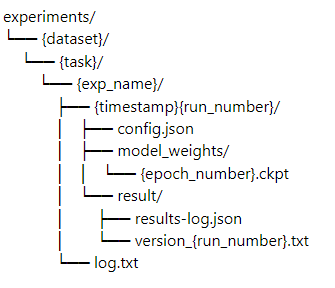

            
Here's what each part represents:

- `{dataset}`: The dataset being used (e.g., eICU).
- `{task}`: The task being performed (e.g., mortality prediction).
- `{exp_name}`: The name of the experiment, set to 'TPC' in the code.
- `{timestamp}{run_number}`: A folder named with the current timestamp and a run number.
  - `config.json`: A JSON file containing the experiment's configuration.
  - `model_weights/`: A folder to store the model weights at each epoch.
    - `{epoch_number}.ckpt`: The model weights saved at a specific epoch.
  - `result/`: A folder to store the experiment results.
    - `results-log.json`: A JSON file logging the performance metrics at each epoch.
    - `version_{run_number}.txt`: A text file with the version number of the run.
- `log.txt`: A log file for the entire experiment.

The `create_folder` function is used to create the main experiment folder structure. The `ExperimentTemplate` class handles saving the configuration, model weights, and results within the `{timestamp}{run_number}` folder.


#Evaluation

#### Metrics descriptions
In this project, we use several metrics to evaluate the performance of our models. These metrics help us to understand how well our models are performing in terms of accuracy, error rate, and other aspects of predictive modeling.

For *Length of Stay Prediction* task, we report on the following 6 metrics:

1.   **Mean Absolute Deviation (MAD):** The average absolute difference between the predicted and actual values, providing a straightforward measure of prediction error. Represents the average error in the same units as the predicted variable (days of stay). **Lower MAD is better**, indicating that the model's predictions are closer to the true values.
2.   **Mean Absolute Percentage Error (MAPE):** The average of the absolute percentage differences between predictions and actual values, which normalizes errors by the actual values. Expresses the error as a percentage of the true values. **Lower MAPE is better**, suggesting that the model's predictions are more accurate relative to the scale of the Length of Stay.
3.   **Mean Squared Error (MSE)**: Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. Heavily penalizes larger errors due to squaring the error terms. **Lower MSE is better**, as it indicates that the model makes fewer and less significant errors in prediction.
5.   **Mean Squared Log Error (MSLE):** Similar to MSE but takes the log of the predictions and actual values before calculating the mean squared difference, penalizing underestimates more than overestimates. Less sensitive to large errors and focuses more on the relative error. **Lower MSLE is better**, especially when you care more about percentage errors than absolute differences.

6.   **Coefficient of Determination (R<sup>2</sup>):**  Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.Indicates how well the independent variables explain the variance in the dependent variable. **Higher R² is better**, with a maximum of 1. A higher R² means the model explains more of the variability in the Length of Stay.
7.   **Cohen Kappa Score:** Assesses the agreement between two raters, where the ratings are the discretized bins of the predicted and actual values.Measures the agreement between the discretized predictions and true values, taking into account the possibility of the agreement occurring by chance. **Higher Cohen Kappa Score** is better, indicating stronger agreement.


For *In-Hospital Mortality* and *Multitask* tasks we report:

1.   **Area Under the Receiver Operating Characteristic Curve (AUROC):** Represents the likelihood of the model distinguishing between the positive and negative classes.
2.   **Area Under the Precision Recall Curve (AUPRC):** Reflects the trade-off between precision and recall for different thresholds, a useful measure for imbalanced datasets.


These functions are called with the true values and the model predictions to output the metrics for evaluation. Each of these metrics provides different insights into the performance of the models and are used accordingly based on whether the task is regression or classification.

**Comparing Across Multiple Tasks**

When comparing models across different tasks (e.g., Length of Stay vs. Mortality Prediction), it's important to consider the context of each task. For instance, a low MSE in Length of Stay might be more impactful than a slightly higher AUROC in Mortality Prediction, depending on the clinical setting and the cost associated with incorrect predictions.

**Comparing Multiple Models for the Same Task**

When comparing models like TPC and Transformer for the same task (e.g., Length of Stay Prediction), you should look at all the metrics collectively:
* **MAD and MAPE:** Give you an idea of the average error and its relative size.
* **MSE and MSLE:** Provide insight into the presence of large errors and the relative error distribution.
* **R²:** Tells you how well the model captures the variance in the data.
* **Cohen Kappa:** Indicates the agreement beyond chance, which is particularly useful when the predictions are categorized into bins (e.g., short, medium, long stays).

A model that performs better across most or all of these metrics would generally be considered superior. However, the choice of the "best" model may also depend on specific use cases. For example, if overestimating the Length of Stay is more costly than underestimating it, a model with a lower MSLE might be preferred, even if it has a slightly higher MSE.

In summary, for Length of Stay Prediction, you want a model that minimizes MAD, MAPE, MSE, and MSLE while maximizing R² and Cohen Kappa Score. The best model will depend on the specific requirements of the task and the cost associated with different types of prediction errors.

**Helper functions to save and print the different metrics**

In [ ]:
# from sklearn import metrics
# # import numpy as np


# class CustomBins:
#     inf = 1e18
#     bins = [
#         (-inf, 1),
#         (1, 2),
#         (2, 3),
#         (3, 4),
#         (4, 5),
#         (5, 6),
#         (6, 7),
#         (7, 8),
#         (8, 14),
#         (14, +inf),
#     ]
#     nbins = len(bins)


# def get_bin_custom(x, nbins, one_hot=False):
#     for i in range(nbins):
#         a = CustomBins.bins[i][0]
#         b = CustomBins.bins[i][1]
#         if a <= x < b:
#             if one_hot:
#                 onehot = np.zeros((CustomBins.nbins,))
#                 onehot[i] = 1
#                 return onehot
#             return i
#     return None


# def mean_absolute_percentage_error(y_true, y_pred):
#     return (
#         np.mean(np.abs((y_true - y_pred) / np.maximum(4 / 24, y_true))) * 100
#     )  # this stops the mape being a stupidly large value when y_true happens to be very small


# def mean_squared_logarithmic_error(y_true, y_pred):
#     return np.mean(np.square(np.log(y_true / y_pred)))


# def print_metrics_regression(y_true, predictions, verbose=1, elog=None):
#     print("==> Length of Stay:")
#     y_true_bins = [get_bin_custom(x, CustomBins.nbins) for x in y_true]
#     prediction_bins = [get_bin_custom(x, CustomBins.nbins) for x in predictions]
#     cf = metrics.confusion_matrix(y_true_bins, prediction_bins)
#     if elog is not None:
#         elog.print("Custom bins confusion matrix:")
#         elog.print(cf)
#     elif verbose:
#         print("Custom bins confusion matrix:")
#         print(cf)

#     kappa = metrics.cohen_kappa_score(y_true_bins, prediction_bins, weights="linear")
#     mad = metrics.mean_absolute_error(y_true, predictions)
#     mse = metrics.mean_squared_error(y_true, predictions)
#     mape = mean_absolute_percentage_error(y_true, predictions)
#     msle = mean_squared_logarithmic_error(y_true, predictions)
#     r2 = metrics.r2_score(y_true, predictions)

#     if verbose:
#         print("Mean absolute deviation (MAD) = {}".format(mad))
#         print("Mean squared error (MSE) = {}".format(mse))
#         print("Mean absolute percentage error (MAPE) = {}".format(mape))
#         print("Mean squared logarithmic error (MSLE) = {}".format(msle))
#         print("R^2 Score = {}".format(r2))
#         print("Cohen kappa score = {}".format(kappa))

#     return [mad, mse, mape, msle, r2, kappa]


# def print_metrics_mortality(y_true, prediction_probs, verbose=1, elog=None):
#     print("==> Mortality:")
#     prediction_probs = np.array(prediction_probs)
#     prediction_probs = np.transpose(
#         np.append([1 - prediction_probs], [prediction_probs], axis=0)
#     )
#     predictions = prediction_probs.argmax(axis=1)
#     cf = metrics.confusion_matrix(y_true, predictions, labels=range(2))
#     if elog is not None:
#         elog.print("Confusion matrix:")
#         elog.print(cf)
#     elif verbose:
#         print("Confusion matrix:")
#         print(cf)
#     cf = cf.astype(np.float32)

#     acc = (cf[0][0] + cf[1][1]) / np.sum(cf)
#     prec0 = cf[0][0] / (cf[0][0] + cf[1][0])
#     prec1 = cf[1][1] / (cf[1][1] + cf[0][1])
#     rec0 = cf[0][0] / (cf[0][0] + cf[0][1])
#     rec1 = cf[1][1] / (cf[1][1] + cf[1][0])

#     auroc = metrics.roc_auc_score(y_true, prediction_probs[:, 1])
#     (precisions, recalls, thresholds) = metrics.precision_recall_curve(
#         y_true, prediction_probs[:, 1]
#     )
#     auprc = metrics.auc(recalls, precisions)
#     f1macro = metrics.f1_score(y_true, predictions, average="macro")

#     results = {
#         "Accuracy": acc,
#         "Precision Survived": prec0,
#         "Precision Died": prec1,
#         "Recall Survived": rec0,
#         "Recall Died": rec1,
#         "Area Under the Receiver Operating Characteristic curve (AUROC)": auroc,
#         "Area Under the Precision Recall curve (AUPRC)": auprc,
#         "F1 score (macro averaged)": f1macro,
#     }
#     if verbose:
#         for key in results:
#             print("{} = {}".format(key, results[key]))

#     return [acc, prec0, prec1, rec0, rec1, auroc, auprc, f1macro]


**Example testing code**

In [ ]:
# from eICU_preprocessing.split_train_test import create_folder
# from models.run_tpc import TPC
# from models.initialise_arguments import initialise_tpc_arguments
# from models.final_experiment_scripts.best_hyperparameters import best_tpc


# if __name__=='__main__':

#     c = initialise_tpc_arguments()
#     c['exp_name'] = 'TPC'
#     c['dataset'] = 'MIMIC'

#     log_folder_path = create_folder('models/experiments/final/MIMIC/LoS', c.exp_name)
#     tpc = TPC(config=c,
#               n_epochs=c.n_epochs,
#               name=c.exp_name,
#               base_dir=log_folder_path,
#               explogger_kwargs={'folder_format': '%Y-%m-%d_%H%M%S{run_number}'})
#     tpc.run()

**Other Evaluation code run in model comparison section**

In [ ]:
!python -m models.run_tpc_MT_notebook --sample 1
# this command runs the multitask TPC model on one sample
# output includes:
# length of stay prediction at regular timesteps and the true remaining length of stay
# mortality prediction
# can run with samples 0 through 7 inclusive
# data can be found here and inserted into the correct path for MIMIC set up in data section: https://drive.google.com/drive/folders/1gYNVV4Jf1kPmZuFBt-LlTl--jpT7ty29?usp=sharing

Experiment set up.
Start test.
Test Metrics:
LoS prediction : ground truth
0.6932563781738281 : 12.125115394592285
7.653637886047363 : 11.29178237915039
3.9318511486053467 : 10.45844841003418
4.690092086791992 : 9.625115394592285
4.500667095184326 : 8.79178237915039
15.034590721130371 : 7.958448886871338
11.856450080871582 : 7.125115394592285
5.571019172668457 : 6.291781902313232
5.239927291870117 : 5.458448886871338
5.55099630355835 : 4.625115394592285
0.22575636208057404 : 3.7917823791503906
Mortality prediction : ground truth
0.0011314022121950984 : 0.0
Test Loss: 330.6637
Testing ended. Results stored =)
Testing complete.


# Results
In this section, you should finish training your model training or loading your trained model. That is a great experiment! You should share the results with others with necessary metrics and figures.

Please test and report results for all experiments that you run with:

*   specific numbers (accuracy, AUC, RMSE, etc)
*   figures (loss shrinkage, outputs from GAN, annotation or label of sample pictures, etc)


#### Table of results

**Best scores are bolded**

![restable.png](https://drive.google.com/uc?export=view&id=1riqWTuwikRp8yXYtCIZNNZi_VcHFKDAQ)

These results confirm the hypotheses as the TPC model far outperforms LSTM and transformers. The TPC model trained on the multitask task also performed better or about the same as the model trained on length of stay only. These results agree with the original paper.


#### Hyperparameter Search

The below code is used to conduct hyperparameter tuning experiments, which involve the following steps:
1. **Experiment Setup:** Each run sets up an experiment with a specific model and a range of hyperparameters to test. The code may use grid search, random search, or more sophisticated methods like Bayesian optimization to explore the hyperparameter space.
2. **Running Experiments:** The code snippet runs multiple training sessions with different hyperparameters, typically using a validation set to evaluate performance.
3. Collecting Results: After each experiment, the code logs the performance metrics, such as accuracy, loss, or any other relevant evaluation criteria.
4. Analysis: Once all experiments are completed, the results are analyzed to identify the best-performing hyperparameters. This analysis might involve comparing metrics across different runs or using statistical methods to determine significance.
5. Selection of Best Hyperparameters: The best hyperparameters identified from the experiments are then selected for inclusion in the code under the section "**Best Hyperparameters**".

In [ ]:
# import random
# import sys

# def get_hyperparam_config(dataset):

#     c = initialise_tpc_arguments()
#     c['mode'] = 'train'
#     c['exp_name'] = 'TPC'
#     if dataset == 'MIMIC':
#         c['no_diag'] = True
#     c['dataset'] = dataset
#     c['model_type'] = 'tpc'

#     # hyper-parameter grid
#     param_grid = {
#         #'batchnorm': ['mybatchnorm', 'pointonly', 'temponly', 'low_momentum', 'none', 'default'],
#         'main_dropout_rate': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
#         'last_linear_size': list(int(x) for x in np.logspace(np.log2(16), np.log2(64), base=2, num=16)),
#         'diagnosis_size': list(int(x) for x in np.logspace(np.log2(16), np.log2(64), base=2, num=16)),
#     }

#     #c['batchnorm'] = random.choice(param_grid['batchnorm'])
#     c['main_dropout_rate'] = random.choice(param_grid['main_dropout_rate'])
#     c['last_linear_size'] = random.choice(param_grid['last_linear_size'])
#     c['diagnosis_size'] = random.choice(param_grid['diagnosis_size'])

#     return c

# if __name__=='__main__':
#     sys.argv = sys.argv[:1]
#     for i in range(25):
#         try:
#             c = get_hyperparam_config('MIMIC')
#             log_folder_path = create_folder('models/experiments/hyperparameters/MIMIC', c.exp_name)
#             tpc = TPC(config=c,
#                       n_epochs=c.n_epochs,
#                       name=c.exp_name,
#                       base_dir=log_folder_path,
#                       explogger_kwargs={'folder_format': '%Y-%m-%d_%H%M%S{run_number}'})
#             tpc.run()

#         except RuntimeError:
#             continue

#### Best Hyperparameters

The best hyperparameters are determined through a process of hyperparameter tuning, which involves running a series of experiments with different combinations of hyperparameters to find the set that yields the best performance on a validation set. The below code snippet contains functions that return a configuration dictionary with the best hyperparameters for different models and datasets.

Here's a high-level overview of how the best hyperparameters are obtained and set:

1. **Global Hyperparameters:** The `best_global` function sets hyperparameters that are common across all models, such as `alpha`, `main_dropout_rate`, `last_linear_size`, and `batch_norm`. These are set based on the dataset being used (e.g., 'eICU' or 'MIMIC').

2. **Model-Specific Hyperparameters:** Functions like `best_tpc`, `best_lstm`, `best_cw_lstm`, and `best_transformer` set hyperparameters specific to each model type. These functions first call `best_global` to set the global hyperparameters and then set additional hyperparameters that are specific to the model and dataset.

3. **Conditional Hyperparameters:** Within each model-specific function, there are conditional statements that set hyperparameters based on the dataset, task, or percentage of data used. For example, the number of epochs might change depending on whether the task is 'mortality' or the amount of data used.

4. **Hyperparameter Tuning Experiments:** The best hyperparameters are likely obtained from a series of experiments where different hyperparameter values are tried out. These experiments are typically run using the above function `get_hyperparam_config`. The results of these experiments are analyzed to determine which hyperparameters work best.

5. **Adoption of Best Hyperparameters:** Once the best hyperparameters are identified, they are hardcoded into the below code so that they can be easily used for the final experiments.

To use the best hyperparameters in an experiment, you would import the appropriate function and pass your configuration dictionary to it. For example:

```python
# Initialize your config dictionary with basic settings
config = {'dataset': 'eICU', 'task': 'mortality', ...}

# Get the best hyperparameters for the TPC model
config = best_tpc(config)
```

This process ensures that the final experiments are run with the hyperparameters that have been empirically found to perform the best.

In [ ]:
def best_global(c):
    c["alpha"] = 100
    if c["dataset"] == "eICU":
        c["main_dropout_rate"] = 0.45
        c["last_linear_size"] = 17
        c["diagnosis_size"] = 64
        c["batch_norm"] = "mybatchnorm"
    elif c["dataset"] == "MIMIC":
        # diagnosis size does not apply for MIMIC since we don't have diagnoses
        c["main_dropout_rate"] = 0
        c["last_linear_size"] = 36
        c["batch_norm"] = "mybatchnorm"
    return c


def best_tpc(c):
    c = best_global(c)
    c["mode"] = "test"
    c["model_type"] = "tpc"
    if c["dataset"] == "eICU":
        if c["percentage_data"] == 6.25:
            c["n_epochs"] = 8
        elif c["task"] == "mortality":
            c["n_epochs"] = 6
        else:
            c["n_epochs"] = 15
        c["batch_size"] = 32
        c["n_layers"] = 9
        c["kernel_size"] = 4
        c["no_temp_kernels"] = 12
        c["point_size"] = 13
        c["learning_rate"] = 0.00226
        c["temp_dropout_rate"] = 0.05
        c["temp_kernels"] = [12] * 9 if not c["share_weights"] else [32] * 9
        c["point_sizes"] = [13] * 9
    elif c["dataset"] == "MIMIC":
        c["no_diag"] = True
        c["n_epochs"] = 10 if c["task"] is not "mortality" else 6
        c["batch_size"] = 8
        c["batch_size_test"] = (
            8  # purely to keep experiment size small so I can run many in parallel
        )
        c["n_layers"] = 8
        c["kernel_size"] = 5
        c["no_temp_kernels"] = 11
        c["point_size"] = 5
        c["learning_rate"] = 0.00221
        c["temp_dropout_rate"] = 0.05
        c["temp_kernels"] = [11] * 8
        c["point_sizes"] = [5] * 8
    return c


def best_lstm(c):
    c = best_global(c)
    c["mode"] = "test"
    if c["dataset"] == "eICU":
        c["batch_size"] = 256
        c["n_layers"] = 2
        c["hidden_size"] = 128
        c["learning_rate"] = 0.00129
        c["lstm_dropout_rate"] = 0.2
        if c["percentage_data"] < 25:
            c["n_epochs"] = 4
        elif c["percentage_data"] == 25:
            c["n_epochs"] = 5
        elif c["percentage_data"] == 50:
            c["n_epochs"] = 6
        else:
            c["n_epochs"] = 8
    elif c["dataset"] == "MIMIC":
        c["no_diag"] = True
        c["batch_size"] = 32
        c["n_layers"] = 1
        c["hidden_size"] = 128
        c["learning_rate"] = 0.00163
        c["lstm_dropout_rate"] = 0.25
        c["n_epochs"] = 8
    return c


def best_cw_lstm(c):
    c["mode"] = "test"
    c["channelwise"] = True
    # carry over the best parameters from lstm, including global
    c = best_lstm(c)
    if c["dataset"] == "eICU":
        c["hidden_size"] = 8
        if c["percentage_data"] < 25:
            c["n_epochs"] = 15
        elif c["percentage_data"] == 25 or c["task"] == "mortality":
            c["n_epochs"] = 20
        elif c["percentage_data"] == 50:
            c["n_epochs"] = 25
        else:
            c["n_epochs"] = 30
    elif c["dataset"] == "MIMIC":
        c["no_diag"] = True
        c["hidden_size"] = 8
        c["n_epochs"] = 20
    return c


def best_transformer(c):
    c = best_global(c)
    c["mode"] = "test"
    if c["dataset"] == "eICU":
        c["batch_size"] = 32
        c["n_layers"] = 6
        c["feedforward_size"] = 256
        c["d_model"] = 16
        c["n_heads"] = 2
        c["learning_rate"] = 0.00017
        c["trans_dropout_rate"] = 0
        if c["percentage_data"] < 12.5:
            c["n_epochs"] = 8
        elif c["percentage_data"] == 12.5:
            c["n_epochs"] = 10
        elif c["percentage_data"] == 25:
            c["n_epochs"] = 12
        elif c["percentage_data"] == 50:
            c["n_epochs"] = 14
        else:
            c["n_epochs"] = 15
    elif c["dataset"] == "MIMIC":
        c["no_diag"] = True
        c["batch_size"] = 64
        c["n_layers"] = 2
        c["feedforward_size"] = 64
        c["d_model"] = 32
        c["n_heads"] = 1
        c["learning_rate"] = 0.00129
        c["trans_dropout_rate"] = 0.05
        c["n_epochs"] = 15
    return c


**To test the TPC model performance on the LoS task as example with the best hyperparameters, you can use the below code:**

In [ ]:
# import sys

# if __name__ == "__main__":
#     # Remove the Jupyter notebook specific arguments
#     sys.argv = sys.argv[:1]
#     c = initialise_tpc_arguments(mode="test", dataset="MIMIC", task="LoS")
#     c["exp_name"] = "TPC"
#     c = best_tpc(c)

#     log_folder_path = create_folder("models/experiments/MIMIC/LoS", c.exp_name)
#     tpc = TPC(
#         config=c,
#         n_epochs=c.n_epochs,
#         name=c.exp_name,
#         base_dir=log_folder_path,
#         explogger_kwargs={"folder_format": "%Y-%m-%d_%H%M%S{run_number}"},
#     )
#     tpc.run()

## Model comparison

In [ ]:
# TPC model multitask
!python -m models.run_tpc_MT_bdeleon2 # this command runs multitask if in the bdeleon2 directory with env setup as readme states
# the model is fairly slow and cannot run in under 8 minutes. Model was run locally

^C


Multitask results \
==> Length of Stay:\
Mean absolute deviation (MAD) = 2.3412155816966442\
Mean squared error (MSE) = 42.15413822196319\
Mean absolute percentage error (MAPE) = 32.78972757346567\
Mean squared logarithmic error (MSLE) = 0.19729110881960077\
R^2 Score = 0.4577782456639441\
Cohen kappa score = 0.8475428590430585\
==> Mortality:\
Accuracy = 0.9195449948310852\
Precision Survived = 0.9403578639030457\
Precision Died = 0.7164179086685181\
Recall Survived = 0.9700267910957336\
Recall Died = 0.5517241358757019\
Area Under the Receiver Operating Characteristic curve (AUROC) = 0.91344695218253\
Area Under the Precision Recall curve (AUPRC) = 0.7044674961709643\
F1 score (macro averaged) = 0.7891692869950363\
Test Loss: 32.9196

In [ ]:
# TPC model LoS
!python -m models.run_tpc_LoS_bdeleon2
# colab is buggy and the results won't show in the print. Model was run locally

Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/MIMIC/LoS/TPC",
    "batch_norm": "mybatchnorm",
    "batch_size": 8,
    "batch_size_test": 8,
    "batchnorm": "mybatchnorm",
    "dataset": "MIMIC",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "TPC",
    "intermediate_reporting": false,
    "kernel_size": 5,
    "labs_only": false,
    "last_linear_size": 36,
    "learning_rate": 0.00221,
    "loss": "msle",
    "main_dropout_rate": 0,
    "mode": "test",
    "model_type": "tpc",
    "n_epochs": 10,
    "n_layers": 8,
    "name": "TPC",
    "no_diag": true,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "no_skip_connections": false,
    "no_temp_kernels": 11,
    "percentage_data": 100.0,
    "point_size": 5,
    "point_sizes": [
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5
    ],
    "save_results_csv": false,
    "seed": 3366627998,
    "share_weights":

LoS results \
==> Length of Stay: \
Mean absolute deviation (MAD) = 2.4498319070431718 \
Mean squared error (MSE) = 44.0630471154297 \
Mean absolute percentage error (MAPE) = 34.7473941625261\
Mean squared logarithmic error (MSLE) = 0.19507889244464616\
R^2 Score = 0.4332242641868935\
Cohen kappa score = 0.8485135033932776\
Test Loss: 15.4553

In [ ]:
# LSTM model LoS
from models.run_lstm_bdeleon2 import loadRunLSTMMIMICTest # this function loads in the model from weights and runs test data on it
loadRunLSTMMIMICTest()

c:\users\brend\appdata\local\programs\python\python36\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models\\experiments\\MIMIC\\LoS/LSTM",
    "batch_size": 512,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "bidirectional": false,
    "channelwise": false,
    "dataset": "MIMIC",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "LSTM",
    "hidden_size": 128,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00129,
    "loss": "msle",
    "lstm_dropout_rate": 0.2,
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 8,
    "n_layers": 2,
    "name": "LSTM",
    "no_diag": true,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "save_results_csv": false,
    "seed": 2365996660,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS"
}
Experiment set up.
BaseLSTM(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (hardtanh): Hardtanh(min_val=0.020

Mean absolute deviation (MAD) = 3.9279052974109874

Mean squared error (MSE) = 73.00246524994785

Mean absolute percentage error (MAPE) = 119.08524696852673

Mean squared logarithmic error (MSLE) = 1.3744521915666426

R^2 Score = 0.06098128325489438

Cohen kappa score = 0.3546261801386087

Test Loss: 108.8938

In [ ]:
# Transformer model LoS
from models.run_transformer_bdeleon2 import loadRunTransformerMIMICTest # this function loads in the model from weights and runs test data on it
loadRunTransformerMIMICTest()

c:\users\brend\appdata\local\programs\python\python36\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Config:
{
    "L2_regularisation": 0,
    "alpha": 100,
    "base_dir": "models/experiments/MIMIC/LoS/Transformer",
    "batch_size": 32,
    "batch_size_test": 32,
    "batchnorm": "mybatchnorm",
    "d_model": 16,
    "dataset": "MIMIC",
    "diagnosis_size": 64,
    "disable_cuda": false,
    "exp_name": "Transformer",
    "feedforward_size": 256,
    "intermediate_reporting": false,
    "labs_only": false,
    "last_linear_size": 17,
    "learning_rate": 0.00017,
    "loss": "msle",
    "main_dropout_rate": 0.45,
    "mode": "train",
    "n_epochs": 15,
    "n_heads": 2,
    "n_layers": 6,
    "name": "Transformer",
    "no_diag": true,
    "no_exp": false,
    "no_labs": false,
    "no_mask": false,
    "percentage_data": 100.0,
    "positional_encoding": false,
    "save_results_csv": false,
    "seed": 3556417034,
    "shuffle_train": false,
    "sum_losses": true,
    "task": "LoS",
    "trans_dropout_rate": 0
}
Experiment set up.
Transformer(
  (relu): ReLU()
  (sigmoid): Sigm

Mean absolute deviation (MAD) = 3.772209367473864 \
Mean squared error (MSE) = 69.33166640651174 \
Mean absolute percentage error (MAPE) = 119.518935338074\
Mean squared logarithmic error (MSLE) = 1.2899925640981809\
R^2 Score = 0.10819816569291929\
Cohen kappa score = 0.396732749358359\
Test Loss: 102.2016

## Experiments beyond the original paper

**Running the Transformer Model with the `no_labs` Flag Enabled:**

The no_labs flag in the context of running the Transformer model indicates that the model should be trained and evaluated without using laboratory test results as part of the input features. This decision to exclude lab data can be based on several reasons:
1. **Feature Selection:** By excluding lab data, we aim to understand the impact of these features on the model's performance. It helps in identifying whether lab results are significant predictors for the task at hand.
2. Model Simplification: **bold text** Removing features can simplify the model, potentially leading to faster training times and reduced complexity without significantly compromising performance.
3. **Data Availability:** In some real-world scenarios, lab data might not be readily available or could be sparse. Training a model without lab data ensures that the model is robust and can operate in environments where lab results are missing.
4. **Performance Improvement:** Previous experiments or domain knowledge might suggest that lab data do not contribute meaningfully to predictions, or even introduce noise. Excluding such data could potentially improve the model's predictive accuracy.

To run the Transformer model with the no_labs flag enabled, you would modify the experiment script to set the `no_labs flag` to True in the configuration object before running the model as shown below:

In [ ]:
# class BaselineTransformer(ExperimentTemplate):
#     def setup(self):
#         self.setup_template()
#         self.model = Transformer(config=self.config,
#                                  F=41,
#                                  D=self.train_datareader.D,
#                                  no_flat_features=self.train_datareader.no_flat_features,
#                                  device=self.device).to(device=self.device)
#         self.elog.print(self.model)
#         self.optimiser = Adam(self.model.parameters(), lr=self.config.learning_rate,
#                               weight_decay=self.config.L2_regularisation)
#         return


# if __name__ == '__main__':
#     c = initialise_transformer_arguments()
#     c['exp_name'] = 'TransformerNoLabs'
#     c['dataset'] = 'MIMIC'
#     c['no_labs'] = True
#     c = best_transformer(c)

#     log_folder_path = create_folder('models/experiments/final/MIMIC/LoS', c.exp_name)
#     transformer = BaselineTransformer(config=c,
#                                       n_epochs=c.n_epochs,
#                                       name=c.exp_name,
#                                       base_dir=log_folder_path,
#                                       explogger_kwargs={'folder_format': '%Y-%m-%d_%H%M%S{run_number}'})
#     transformer.run()

Comparing the results of this experiment with the original run for Transformer and other ablations:

In [ ]:
import pandas as pd
import json
from IPython.display import (
    display,
)  # Import the display function for better output formatting in Jupyter


def load_results(file_path):
    """Load data from a JSON file with error handling and path verification."""
    abs_path = os.path.abspath(file_path)
    print(f"Attempting to load: {abs_path}")
    try:
        with open(abs_path, "r") as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"Error: File not found - {abs_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON - {abs_path}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None


# Define the paths to your experiment result files
file_paths = [
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models//experiments/MIMIC/LoS/Transformer/result/results.json",
        "Transformer",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models//experiments/MIMIC/LoS/TransformerMSE/2024-04-28_0208241/result/results.json",
        "Transformer MSE",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models//experiments/MIMIC/LoS/TransformerNoLabs/2024-04-30_0200501/result/results.json",
        "Transformer No Labs",
    ),
    # Add more experiments here
]

# Load data from each file and store it with an appropriate label
results = []
for file_path, label in file_paths:
    result_data = load_results(file_path)
    if result_data:
        result_data["Experiment"] = label  # Add a column to identify the experiment
        results.append(result_data)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(results)

# Set the 'Experiment' column as the index of the DataFrame if you prefer
df.set_index("Experiment", inplace=True)

# Display the DataFrame as a table in Jupyter Notebook
display(df)  # This function renders the DataFrame in a formatted HTML table

# Optional: Save the DataFrame to a CSV or Excel file
# df.to_csv("experiment_results_comparison.csv")
# df.to_excel("experiment_results_comparison.xlsx")


#### **Interpretation of the Above results**

#### Kappa Score (train_kappa)

Transformer models show moderate kappa scores, indicating a fair level of agreement with the true labels across all configurations. The standard Transformer and Transformer No Labs perform slightly better than the Transformer MSE. This suggests that the MSE optimization might slightly degrade the classification consistency compared to the other setups.

#### Mean Absolute Error (train_mad)

**Transformer MSE** has a slightly higher train MAD than the other configurations, implying it might be less effective at minimizing absolute deviations. This could be due to the MSE loss giving more weight to larger errors, which might not always align with reducing absolute deviations.

#### Mean Absolute Percentage Error (train_mape)

The **Transformer MSE** configuration has significantly higher MAPE, indicating a greater average percentage error compared to the standard Transformer and Transformer No Labs. This suggests that optimizing for MSE might lead to poorer performance on data with varied scales or in cases where relative error reduction is crucial.

#### MSE and MSLE (train_mse & train_msle)

The **Transformer MSE** shows lower training MSE but higher MSLE compared to the other models. This indicates that while MSE optimization effectively reduces squared errors, it might not perform as well when the error distribution is skewed or when the emphasis is on the logarithmic scale, as seen with the higher MSLE.

#### Coefficient of Determination (R², train_r2)

The Transformer models generally have low R² scores, with the MSE version having a slightly higher score than the others. This suggests that while the MSE model may capture more variability, the overall explanatory power of all models is quite limited.

#### Validation Metrics

These are crucial for understanding how the model might perform on unseen data:

- **Validation MAPE** (val_mape) and **Validation MSE (val_mse)** are significantly higher for the Transformer MSE, indicating that the improvements seen in training MSE do not generalize as effectively to unseen data.
- **Validation MSLE** (val_msle) shows that the Transformer and **Transformer No Labs** models might generalize better in terms of logarithmic errors.

#### Overall Interpretation

- The **Transformer MSE** is optimized to reduce mean squared errors, which can make the model sensitive to outliers or disproportionately large errors. This might not be ideal for applications like Length of Stay prediction, where the scale of errors can vary significantly.
- **Transformer No Labs** performs comparably to the standard Transformer, suggesting that additional layers or complexity might not necessarily yield better results for this particular task. This could indicate that simpler models might be sufficient, or that the additional layers do not capture more useful patterns from the data.
- The similar performance metrics across the Transformer models in terms of kappa and R² highlight a general limitation in model fit or the challenging nature of the prediction task, possibly suggesting the need for further model tuning or consideration of different modeling approaches.


## Ablations

The authors of this paper have mentioned that they have performed various ablations. We have attempted to run all of them. Though some ablations were not replicable since they did not execute propely (as mentioned in the discussion section later), we have mentioned all the results we have in the code cell below.

#### **Results**

Task: Length of Stay,    Model: TPC

In [ ]:
import pandas as pd
import json
from IPython.display import (
    display,
)  # Import the display function for better output formatting in Jupyter


def load_results(file_path):
    """Load data from a JSON file with error handling and path verification."""
    abs_path = os.path.abspath(file_path)
    print(f"Attempting to load: {abs_path}")
    try:
        with open(abs_path, "r") as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"Error: File not found - {abs_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON - {abs_path}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None


# Define the paths to your experiment result files
file_paths = [
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TPC/result/results.json",
        "TPC",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TPCMSE/2024-04-25_0040081/result/results.json",
        "TPC MSE",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TPCNoDecay/2024-04-23_2050181/result/results.json",
        "TPC No Decay",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TPCNoLabs/2024-04-21_0922121/result/results-log.json",
        "TPC No Labs",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TempOnly/2024-04-26_1634271/result/results-log.json",
        "Temp Only",
    ),
    # Add more experiments here
]

# Load data from each file and store it with an appropriate label
results = []
for file_path, label in file_paths:
    result_data = load_results(file_path)
    if result_data:
        result_data["Experiment"] = label  # Add a column to identify the experiment
        results.append(result_data)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(results)

# Set the 'Experiment' column as the index of the DataFrame if you prefer
df.set_index("Experiment", inplace=True)

# Display the DataFrame as a table in Jupyter Notebook
display(df)  # This function renders the DataFrame in a formatted HTML table

# Optional: Save the DataFrame to a CSV or Excel file
# df.to_csv("experiment_results_comparison.csv")
# df.to_excel("experiment_results_comparison.xlsx")


#### **Interpretation of the Ablation Results**

#### **Kappa Score (train_kappa)**

**The TPC Model (MSLE)** has a lower kappa score compared to the standard TPC model and TPC No Decay, but is higher than TPC No Labs. This suggests moderate agreement with the true labels, possibly indicating that while the MSLE training focuses on reducing logarithmic discrepancies, it may not be as effective for classification consistency as some other configurations.

#### **Mean Absolute Error (train_mad)**

**TPC MSE** shows significantly higher train MAD than the TPC MSLE model. This suggests that when optimizing directly for MSE, the model may be less effective at minimizing absolute deviations compared to when trained with MSLE, likely due to the focus of MSE on minimizing the squares of the errors which can overlook larger errors more than MSLE.

#### **Mean Absolute Percentage Error (train_mape)**

**TPC MSE** has an extraordinarily high MAPE compared to other models, including the TPC MSLE. High MAPE in MSE suggests that the relative size of the errors compared to actual values is larger, which could indicate poor performance in data with varying scales or with many outliers.

#### **MSE and MSLE (train_mse & train_msle)**

**TPC MSLE** achieves lower training MSE and MSLE compared to TPC MSE and slightly better than TPC No Decay, showing its effectiveness in handling both squared and logarithmic errors.

#### **Coefficient of Determination (R², train_r2)**

The **TPC MSLE** model has an R² closer to the TPC model but lower than the TPC No Labs and Temp Only models, indicating less variability explained by the model compared to these configurations but similar to the standard setup.

#### **Validation Metrics**

When considering validation metrics, it's essential to determine if the training improvements translate to unseen data:

- **Validation MAPE (val_mape)** is much lower in TPC MSLE than in TPC MSE, suggesting better generalization regarding relative error.
- **Validation MSE (val_mse)** is also lower in TPC MSLE than TPC MSE, further confirming the effectiveness of MSLE in general performance across data scales.

#### **Overall Interpretation**

The **TPC MSLE model** generally shows balanced performance across various metrics, indicating it is well-suited for datasets where outliers or scale variations are significant. It shows particular strength in handling logarithmic errors, which benefits modeling of exponential growth or heavy-tailed data without being overly influenced by outliers.

Comparing **TPC MSLE** with **TPC No Decay** suggests that incorporating some form of regularization or decay might help stabilize training further, as seen in slightly better kappa and R² scores in the No Decay setup.


#### Metrics Plots for different Experiments

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json


import os


def load_data(file_path):
    """Load data from a JSON file with error handling and path verification."""
    abs_path = os.path.abspath(file_path)
    print(f"Attempting to load: {abs_path}")
    try:
        with open(abs_path, "r") as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"Error: File not found - {abs_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON - {abs_path}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None


def parse_data(data):
    """Parse the raw JSON data into a structured DataFrame."""
    structured_data = []
    for entry in data:
        for key, value in entry.items():
            structured_data.append(
                {
                    "metric": key,
                    "value": value["data"],
                    "epoch": value["epoch"],
                    "type": "train" if "train" in key else "val",
                }
            )
    return pd.DataFrame(structured_data)


def plot_metrics(dfs, titles):
    """Generate line plots comparing multiple experiments for each metric."""
    # Determine all unique metrics across experiments
    all_metrics = set()
    for df in dfs:
        all_metrics.update(df["metric"].unique())

    # Plot each metric
    for metric in all_metrics:
        plt.figure(figsize=(12, 6))
        for df, title in zip(dfs, titles):
            if metric in df["metric"].values:
                subset = df[df["metric"] == metric]
                plt.plot(
                    subset["epoch"],
                    subset["value"],
                    marker="o",
                    linestyle="-",
                    label=f"{title} {metric}",
                )

        plt.title(f"Comparison of {metric} Across Epochs")
        plt.xlabel("Epoch")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.show()


def compare_experiments(experiments):
    """Compare experiments given a list of (file_path, title) tuples."""
    dfs = []
    titles = []
    for path, title in experiments:
        data = load_data(path)
        if data is not None:
            print(f"Data loaded for {title}: {data[:2]}")  # Print the first two entries
            df = parse_data(data)
            dfs.append(df)
            titles.append(title)
        else:
            print(f"Skipping {title} due to loading issues.")
    plot_metrics(dfs, titles)


# Example usage:
experiments = [
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TPC/result/results-log.json",
        "TPC",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TPCMSE/2024-04-25_0040081/result/results-log.json",
        "TPC MSE",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TPCNoDecay/2024-04-23_2050181/result/results-log.json",
        "TPC No Decay",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TPCNoLabs/2024-04-21_0922121/result/results-log.json",
        "TPC No Labs",
    ),
    (
        "/content/drive/MyDrive/TPC-LoS-prediction/models/experiments/MIMIC/LoS/TempOnly/2024-04-26_1634271/result/results-log.json",
        "Temp Only",
    ),
    # Add more experiments here
]

compare_experiments(experiments)


# Discussion



## Implications of the Experimental Results

The experimental results indicate that the Temporal Pointwise Convolutional (TPC) model outperforms LSTM and transformer models for predicting length of stay (LoS) in the ICU, as shown in the original paper. The multitask TPC model, which predicts both LoS and mortality, also performed well, confirming the hypotheses of the original paper.

## Reproducibility of the Original Paper

The original paper appears to be reproducible to a certain extent. The provided code snippets and the structure of the experiment template suggest that the authors followed a systematic approach to model training, validation, and testing, which is conducive to reproducibility.

### **What Was Easy**

- **Data Preprocessing:** The preprocessing steps for both eICU and MIMIC datasets were well-documented, making it easy to prepare the data for model training.
- **Model Initialization:** Initializing the TPC model with the best hyperparameters was straightforward due to the clear documentation and the `initialise_arguments` function provided.
- **Training and Evaluation:** The `ExperimentTemplate` class provided a structured way to train and evaluate the models, which simplified these processes. Running training was relatively easy once everything else was figured out.

### **What Was Difficult**

- **Hyperparameter Tuning:** Finding the best hyperparameters might be challenging without a clear understanding of the search space or the computational resources required. Additionally, downgrading to Python 3.6 along with the libraries was difficult.
- **Interpretability:** Visualizing and interpreting model predictions and importances was complex, as it required a deep understanding of the model's internals and the use of additional tools like Integrated Gradients.
- **Environment Setup:** Ensuring that the correct versions of libraries and dependencies were installed could be a hurdle, as the codebase might not be fully compatible with the latest versions. Loading the model was challenging due to outdated libraries and custom loaders.
- **Model Implementation:** There were bugs in the code and missing sections that the authors claimed to have but did not. Additionally, running the TPC model in a notebook was buggy and slow.

### Recommendations for Improving Reproducibility

- **Documentation:** Provide detailed documentation for each step of the experiment, including data preprocessing, model training, and evaluation. Additionally, fully implement what is claimed in the code.
- **Version Control:** Use a version control system to track changes in the code and include a `requirements.txt` file to specify the exact versions of libraries used.
- **Environment Setup:** Update to newer versions of Python and simplify the pipeline to reduce compatibility issues. Ensure that the codebase is fully implemented and functional.
- **Automated Testing:** Implement automated tests to verify that the code produces the expected outputs at each step.
- **Clear Licensing:** Provide a clear license for the code and data to inform users of how they can use and modify the resources.

By addressing these recommendations, the original authors and others in the field can enhance the reproducibility of their research, facilitating validation and further advancements in the area of ICU stay prediction.


# References

1.   Emma Rocheteau, Pietro Liò, and Stephanie Hyland. 2021. Temporal pointwise convolutional networks for length of stay prediction in the intensive care unit. In Proceedings of the Conference on Health, Inference, and Learning (CHIL '21). Association for Computing Machinery, New York, NY, USA, 58–68. https://doi.org/10.1145/3450439.3451860

2. Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

3. Johnson, A., Bulgarelli, L., Pollard, T., Horng, S., Celi, L. A., & Mark, R. (2020). MIMIC-IV (version 0.4). PhysioNet. https://doi.org/10.13026/a3wn-hq05.

4. Pollard, T., Johnson, A., Raffa, J., Celi, L. A., Badawi, O., & Mark, R. (2019). eICU Collaborative Research Database (version 2.0). PhysioNet. https://doi.org/10.13026/C2WM1R.

5. Pollard, T., Johnson, A., Raffa, J. et al. The eICU Collaborative Research Database, a freely available multi-center database for critical care research. Sci Data 5, 180178 (2018). https://doi.org/10.1038/sdata.2018.178